# Module 2 Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Overview

    1) Establish business questions to explore
    2) Open, explore, and perform necessary cleaning on provided data sets. Determine need for additional data and acquire it via API calls and web scraping. Decide on most robust data to use as the "master" set.
    3) Merge data sets into larger data sets as needed. Clean further until working with robust data.
    4) EDA on data sets including visualizations

# Business Exploration Questions

1. What are the primary factors influencing housing prices in the King County metro area?
2. Can we effectively use a regression model based system for realtors to determine a proper list price?
3. Is a model-based system more accurate for determining list price than the traditional comps-based system?
4. What easy-to-use features can we add to our model to increase its accuracy?

# Notebook Preparation

## Recommended Extensions

Recommended to also install the nbextensions "Table of Contents 2" and "Collapsible Headings" for easier navigation through this notebook.

Gitbhub here: https://github.com/ipython-contrib/jupyter_contrib_nbextensions


Ensure seaborn is updated to recent version

## Importing Modules

In [1]:
import csv

from joblib import dump

import pandas as pd

import numpy as np
from numpy import mean
from numpy import std

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.formula.api import wls

import scipy.stats as stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV, RidgeCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

from sklearn.feature_selection import RFECV, RFE

from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn import neighbors
from math import sqrt
import itertools

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon
import geopandas as gpd
import descartes
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

## Notebook Functions

In [2]:
# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# Preprocessing

In [3]:
# load and look at our king county housing data
df = pd.read_csv('kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [4]:
# what are the columns in our data?

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# looking for outliers in the percentiles

df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

We see potential outliers in price, sqft_lot, sqft_living, and bedrooms.

I also see a possible significant outlier in longitude. We will look at what that means visually.

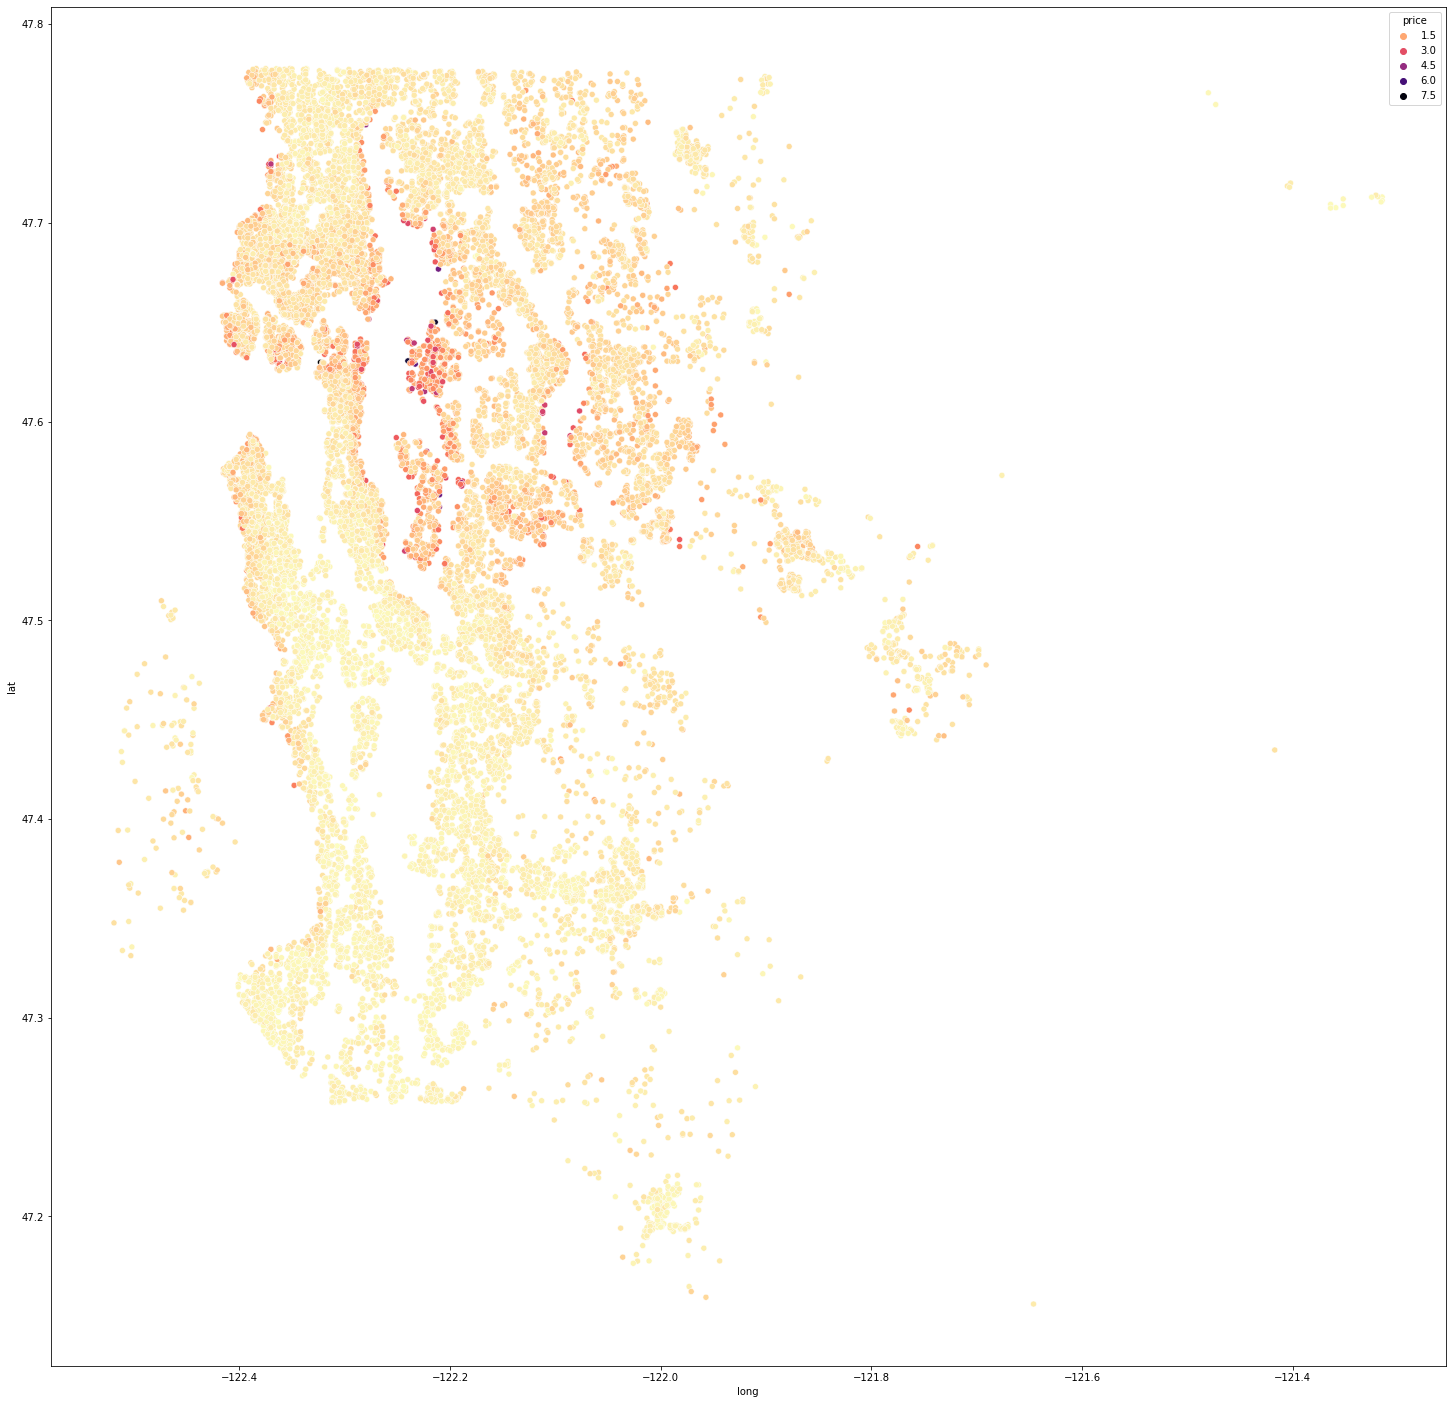

In [6]:
# plotting latitude and longitude as a visual scatter plot

plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="long", y="lat", hue="price", palette="magma_r");

Using latitude and longitude, we make a visual map of the King County area that lets us see the map outliers. We can see that there are a few sales in locations that are outliers in some way - still in King County but very far away from the metro area on which we are focusing. Sales that are too far outside of our comparison area geographically may add noise to our model. So I'm going to drop the longitude outliers as well. 

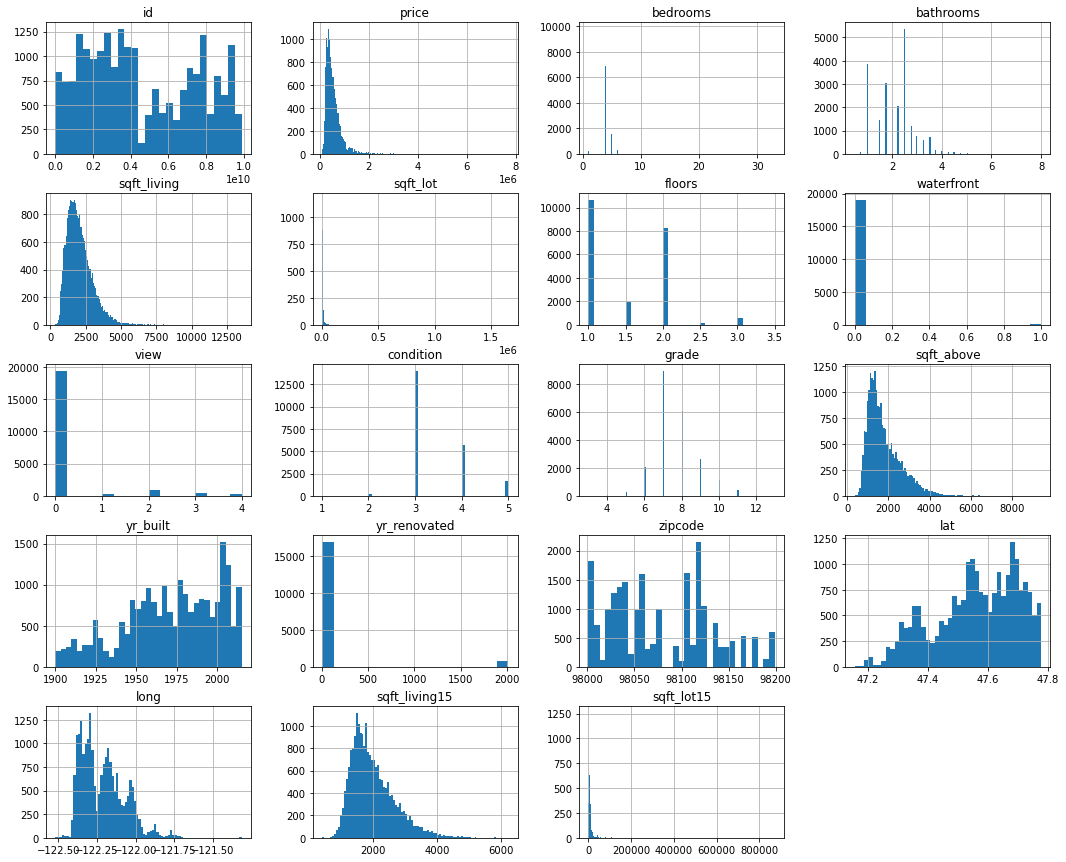

In [7]:
# check how our histograms are looking

df.hist(figsize=(18,15), bins='auto');


In [8]:
# A lot of our variables are not normally shaped, so we can't reliably remove outliers via standard deviation.
# We will use IQR to remove our outliers with the following function

def iqr_outliers(column):
    """return the lower range and upper range for the data based on IQR*1.75"""
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.75 * iqr)
    upper_range = Q3 + (1.75 * iqr)
    return lower_range,upper_range  

In [9]:
# determing our IQR for price, lot size, sq footage and longitude

pricelower,priceupper = iqr_outliers(df.price)
lotlower,lotupper = iqr_outliers(df.sqft_lot)
sqftlower, sqftupper = iqr_outliers(df.sqft_living)
longlower, longupper = iqr_outliers(df.long)


# dropping the things outside of our lower and upper range

df.drop(df[ (df.price > priceupper) | (df.price < pricelower) ].index , inplace=True)
df.drop(df[ (df.sqft_lot > lotupper) | (df.sqft_lot < lotlower) ].index , inplace=True)
df.drop(df[ (df.sqft_living > sqftupper) | (df.sqft_living < sqftlower) ].index , inplace=True)
df.drop(df[ (df.long > longupper) | (df.long < longlower) ].index , inplace=True)


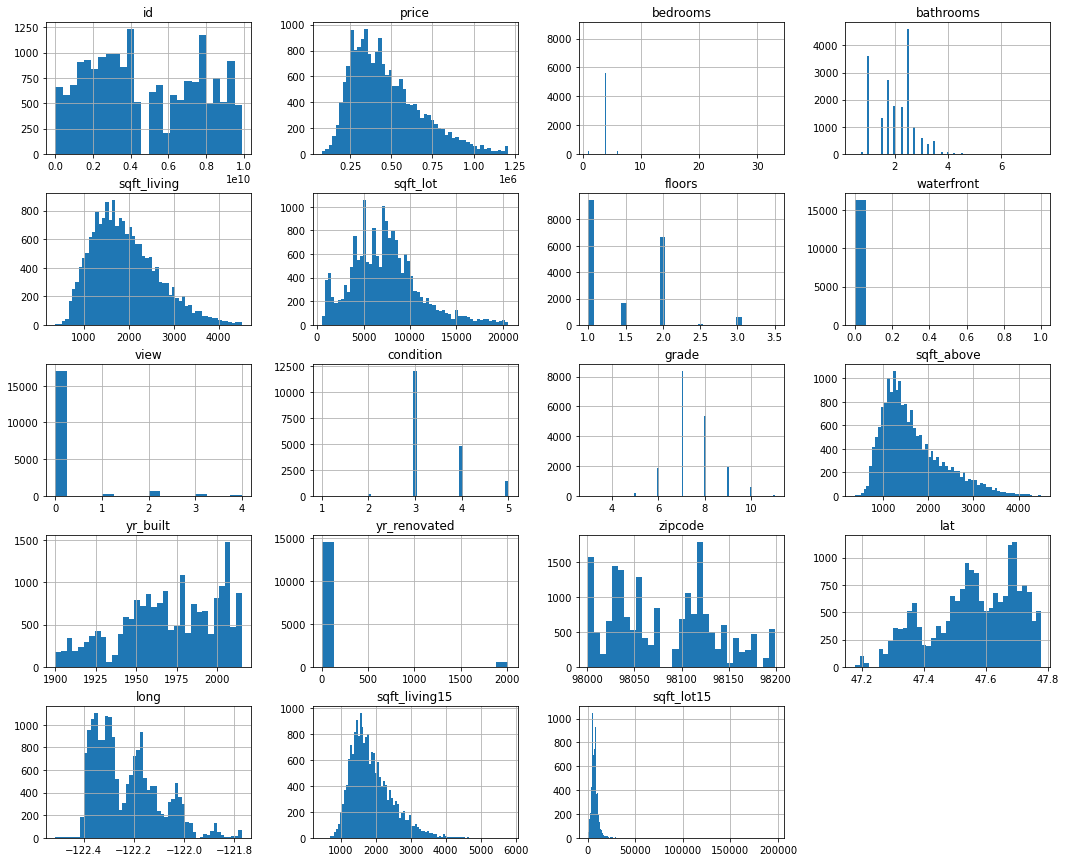

In [10]:
# checking our new histograms

df.hist(figsize=(18,15), bins='auto');

Our data is still largely not normally distributed, but using our IQR has gotten rid of some severely skewing outliers in the price, long and aqft_living categories and ESPECIALLY in the sqft_lot category.

In [11]:
# looking again at our percentile outliers

df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.848300e+04  1.848300e+04  18483.000000  18483.000000  18483.000000   
mean   4.734155e+09  4.724165e+05      3.320078      2.032611   1919.161662   
std    2.869353e+09  2.126032e+05      0.911470      0.704607    725.898952   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.301401e+09  3.100000e+05      3.000000      1.500000   1370.000000   
50%    4.047200e+09  4.299000e+05      3.000000      2.000000   1810.000000   
75%    7.504021e+09  5.940000e+05      4.000000      2.500000   2360.000000   
max    9.900000e+09  1.210000e+06     33.000000      7.500000   4510.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  18483.000000  18483.000000  16412.000000  18428.000000  18483.000000   
mean    7352.331007      1.476167      0.002133      0.161385      3.409890   
std     3682.621299      0.542793      0.046132      0.617224      0.649335   
min      520.000000      1.000000      0.000000      0.000000      1.000000   
25%     4840.000000      1.000000      0.000000      0.000000      3.000000   
50%     7200.000000      1.000000      0.000000      0.000000      3.000000   
75%     9334.500000      2.000000      0.000000      0.000000      4.000000   
max    20562.000000      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  18483.000000  18483.000000  18483.000000  15178.000000  18483.000000   
mean       7.483038   1654.478007   1970.094141     73.251680  98081.324677   
std        0.992272    683.208604     29.875933    375.325594     54.021460   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1150.000000   1950.000000      0.000000  98033.000000   
50%        7.000000   1480.000000   1972.000000      0.000000  98074.000000   
75%        8.000000   2010.000000   1997.000000      0.000000  98118.000000   
max       11.000000   4500.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  18483.000000  18483.000000   18483.000000   18483.000000  
mean      47.560542   -122.228775    1875.466916    7349.560190  
std        0.138038      0.129574     590.208228    4529.095591  
min       47.177500   -122.512000     460.000000     651.000000  
25%       47.474500   -122.336000    1450.000000    5000.000000  
50%       47.570400   -122.265000    1760.000000    7210.000000  
75%       47.680000   -122.150000    2200.000000    9000.000000  
max       47.777600   -121.770000    5790.000000  196591.000000

In [12]:
#check what is going on with the sqft_lot15 outliers by sorting descending

df.sort_values('sqft_lot15', ascending=False)

id        date     price  bedrooms  bathrooms  sqft_living  \
9436   3523029077   10/7/2014  297000.0         3       1.00         1340   
4607   3523029059   7/31/2014  181000.0         2       1.50         1560   
5386   1021079099   11/6/2014  345000.0         3       2.50         1990   
8112   1923039089   6/10/2014  285000.0         2       2.00         1651   
7086   8656800020   2/12/2015  309000.0         3       2.50         1450   
...           ...         ...       ...       ...        ...          ...   
20999  8562780530   3/28/2015  338500.0         2       2.25         1150   
20891  8562780540  12/22/2014  325000.0         2       2.25         1150   
513    2827100070   11/5/2014  290000.0         4       1.00         1330   
20733  2827100075   7/27/2014  286308.0         2       1.50         1220   
19653  7899800863   10/1/2014  299900.0         3       2.50         1210   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9436      18000     1.0         0.0   0.0          4      7        1340   
4607      10807     1.0         0.0   0.0          2      7        1560   
5386      20466     1.5         0.0   0.0          4      8        1410   
8112      18200     1.0         0.0   0.0          3      6        1651   
7086      11480     2.0         NaN   0.0          3      7        1450   
...         ...     ...         ...   ...        ...    ...         ...   
20999       711     2.0         0.0   0.0          3      7        1150   
20891       711     2.0         0.0   0.0          3      7        1150   
513        8184     1.5         0.0   0.0          3      7        1330   
20733      1036     3.0         0.0   0.0          3      7        1220   
19653      2046     2.0         0.0   0.0          3      9         920   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9436            0.0      1924           NaN    98070  47.4443 -122.509   
4607            0.0      1949           0.0    98070  47.4444 -122.509   
5386              ?      1987           0.0    98010  47.3259 -121.896   
8112            0.0      1946           0.0    98070  47.4621 -122.461   
7086            0.0      1990           0.0    98014  47.6720 -121.864   
...             ...       ...           ...      ...      ...      ...   
20999           0.0      2013           NaN    98027  47.5323 -122.071   
20891           0.0      2013           NaN    98027  47.5323 -122.070   
513             0.0      1949           0.0    98133  47.7343 -122.347   
20733           0.0      2006           0.0    98133  47.7348 -122.347   
19653         290.0      2008           NaN    98106  47.5212 -122.357   

       sqft_living15  sqft_lot15  
9436            1660      196591  
4607            1660      196591  
5386            1660       93393  
8112            1510       89595  
7086            2080       87991  
...              ...         ...  
20999           1150         748  
20891           1150         748  
513             1220         660  
20733           1210         659  
19653           1070         651  

[18483 rows x 21 columns]

In [13]:
# there is something off about these two large and nearly identical entries at the top of the list. We are going to drop these two rows.

df.drop(df[df['sqft_lot15'] == 196591].index, axis=0, inplace = True)

In [14]:
#check what is going on with the weird bedroom value by sorting descending

df.sort_values('bedrooms', ascending=False)

id        date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895   6/25/2014  640000.0        33       1.75         1620   
8748   1773100755   8/21/2014  520000.0        11       3.00         3000   
15147  5566100170  10/29/2014  650000.0        10       2.00         3610   
19239  8812401450  12/29/2014  660000.0        10       3.00         2920   
4092   1997200215    5/7/2014  599999.0         9       4.50         3830   
...           ...         ...       ...       ...        ...          ...   
16516  2114700500   4/18/2015   90000.0         1       1.00          560   
11493   985001275   6/20/2014  250000.0         1       1.00          800   
18582  3222049087   4/22/2015  570000.0         1       1.00          720   
8614   6303400395   1/30/2015  325000.0         1       0.75          410   
1732    913000340    1/2/2015  252000.0         1       1.00          680   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15856      6000     1.0         0.0   0.0          5      7        1040   
8748       4960     2.0         0.0   0.0          3      7        2400   
15147     11914     2.0         0.0   0.0          4      7        3010   
19239      3745     2.0         0.0   0.0          4      7        1860   
4092       6988     2.5         0.0   0.0          3      7        2450   
...         ...     ...         ...   ...        ...    ...         ...   
16516      4120     1.0         0.0   0.0          3      4         560   
11493     16306     1.0         NaN   0.0          2      6         680   
18582      7540     1.0         1.0   4.0          4      6         720   
8614       8636     1.0         0.0   0.0          2      4         410   
1732       1638     1.0         NaN   4.0          1      6         680   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15856         580.0      1947           0.0    98103  47.6878 -122.331   
8748          600.0      1918        1999.0    98106  47.5560 -122.363   
15147         600.0      1958           0.0    98006  47.5705 -122.175   
19239        1060.0      1913           0.0    98105  47.6635 -122.320   
4092         1380.0      1938           0.0    98103  47.6927 -122.338   
...             ...       ...           ...      ...      ...      ...   
16516           0.0      1947           0.0    98106  47.5335 -122.348   
11493         120.0      1931           0.0    98168  47.4916 -122.308   
18582           0.0      1905           0.0    98198  47.3509 -122.323   
8614            0.0      1953           0.0    98146  47.5077 -122.357   
1732            0.0      1910        1992.0    98116  47.5832 -122.399   

       sqft_living15  sqft_lot15  
15856           1330        4700  
8748            1420        4960  
15147           2040       11914  
19239           1810        3745  
4092            1460        6291  
...              ...         ...  
16516            980        4120  
11493           1270        8666  
18582           1120        9736  
8614            1190        8636  
1732            1010        3621  

[18481 rows x 21 columns]

In [15]:
# this value of 33 in 1620 square feet is obviously a mistake. We're going to impute the mean into this field.

# 11 bedrooms in 3000sf, 10 bedrooms in 2920sf, 10 bedrooms in 3610sf are also obviously mistakes
# We're going to impute the mean into the fields for 10 and 11 bedrooms as well.

bedroom_mean = round(df['bedrooms'].mean(), 0)
bedroom_mean
df.loc[df['bedrooms'] == 33.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 11.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 10.0, 'bedrooms'] = bedroom_mean

df.sort_values('bedrooms', ascending=False)

# fixed our bedroom outliers by imputing the mean
# I remain suspicious of these 9-bedroom entries, but we'll decline from manipulating them further

id        date     price  bedrooms  bathrooms  sqft_living  \
8537    424049043   8/11/2014  450000.0         9       7.50         4050   
4092   1997200215    5/7/2014  599999.0         9       4.50         3830   
4231   2902200015    1/6/2015  700000.0         9       3.00         3680   
18428  8823901445   3/13/2015  934000.0         9       3.00         2820   
15056  7418000130  12/11/2014  430000.0         8       3.25         4300   
...           ...         ...       ...       ...        ...          ...   
16516  2114700500   4/18/2015   90000.0         1       1.00          560   
11493   985001275   6/20/2014  250000.0         1       1.00          800   
18582  3222049087   4/22/2015  570000.0         1       1.00          720   
8614   6303400395   1/30/2015  325000.0         1       0.75          410   
1732    913000340    1/2/2015  252000.0         1       1.00          680   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8537       6504     2.0         0.0   0.0          3      7        4050   
4092       6988     2.5         0.0   0.0          3      7        2450   
4231       4400     2.0         0.0   0.0          3      7        2830   
18428      4480     2.0         0.0   0.0          3      7        1880   
15056     10441     2.0         0.0   0.0          4      8        2800   
...         ...     ...         ...   ...        ...    ...         ...   
16516      4120     1.0         0.0   0.0          3      4         560   
11493     16306     1.0         NaN   0.0          2      6         680   
18582      7540     1.0         1.0   4.0          4      6         720   
8614       8636     1.0         0.0   0.0          2      4         410   
1732       1638     1.0         NaN   4.0          1      6         680   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8537            0.0      1996           0.0    98144  47.5923 -122.301   
4092         1380.0      1938           0.0    98103  47.6927 -122.338   
4231          850.0      1908           0.0    98102  47.6374 -122.324   
18428         940.0      1918           0.0    98105  47.6654 -122.307   
15056        1500.0      1979           0.0    98059  47.4786 -122.131   
...             ...       ...           ...      ...      ...      ...   
16516           0.0      1947           0.0    98106  47.5335 -122.348   
11493         120.0      1931           0.0    98168  47.4916 -122.308   
18582           0.0      1905           0.0    98198  47.3509 -122.323   
8614            0.0      1953           0.0    98146  47.5077 -122.357   
1732            0.0      1910        1992.0    98116  47.5832 -122.399   

       sqft_living15  sqft_lot15  
8537            1448        3866  
4092            1460        6291  
4231            1960        2450  
18428           2460        4400  
15056           1780       10457  
...              ...         ...  
16516            980        4120  
11493           1270        8666  
18582           1120        9736  
8614            1190        8636  
1732            1010        3621  

[18481 rows x 21 columns]

In [16]:
df

# confirming we still have a lot of data to work with - over 18k entries

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[18481 rows x 21 columns]

In [17]:
# look for nulls

df.isna().sum()

# all of our null values are in columns that I want to be binary flags. So, will change all non-null values > 0 in those
# columns to 1, and all null values to 0.
# this will turn waterfront, view and renovated into dichotomous choice flags

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2071
view               55
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3304
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [18]:
# change all non-null values > 0 in those columns to 1

df.loc[df['waterfront'] > 0, 'waterfront'] = 1
df.loc[df['view'] > 0, 'view'] = 1
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

# now anything that is not a 1 becomes a 0

df.loc[df['waterfront']!= 1, 'waterfront'] = 0
df.loc[df['view'] != 1, 'view'] = 0
df.loc[df['yr_renovated'] != 1, 'yr_renovated'] = 0

# since we're making it a binary flag, we'll rename yr_renovated to renovated
df = df.rename(columns={'yr_renovated' : 'renovated'})

In [19]:
# we've removed the null values from our three binary columns

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
# check data types

df.dtypes

# date and sqft_basement need to be fixed. This explains why the basement variable didn't show
# up in our histogram

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
renovated        float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [21]:
#Checking all top occuring for each column to find weird entries

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000162
8820903380    0.000108
2206700215    0.000108
4305200070    0.000108
723049156     0.000108
Name: id, dtype: float64 


date 
 6/23/2014    0.006547
6/25/2014    0.006277
4/28/2015    0.005898
4/14/2015    0.005898
6/26/2014    0.005790
Name: date, dtype: float64 


price 
 350000.0    0.008495
450000.0    0.008279
325000.0    0.007521
425000.0    0.007467
550000.0    0.007413
Name: price, dtype: float64 


bedrooms 
 3    0.470646
4    0.304204
2    0.138629
5    0.064445
6    0.010822
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249986
1.00    0.196039
1.75    0.147503
2.00    0.095125
2.25    0.094421
Name: bathrooms, dtype: float64 


sqft_living 
 1400    0.007034
1300    0.006818
1660    0.006764
1440    0.006710
1010    0.006710
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.018505
6000    0.015042
4000    0.013095
7200    0.011201
4800    0.006277
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.513879
2.0    0.361236
1.5    

In [22]:
# basement has a weird entry of '?' which we will convert to a 0, and then
# converting our sqft_basement to a float,
# and our date to a proper date

df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float)
df['date'] = pd.to_datetime(df['date'])

# we're now going to extract just the month from our datetime, and store that in a new column
# we won't be using our entire date - we're interested in the month that houses are sold
df['month'] = pd.DatetimeIndex(df['date']).month

In [23]:
# data types are now fixed

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
renovated               float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month                     int64
dtype: object

In [24]:
# now that its data type is correct, we see that most properties don't have basements. Because of this,
# we will add basement to our binary flag group, and just list if it has a basement or not.

df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1
df.loc[df['sqft_basement'] != 1, 'sqft_basement'] = 0

# we'll also change the name of our column to basement
df = df.rename(columns={'sqft_basement' : 'basement'})

In [25]:
# We're trying out engineering a feature that penalizes or rewards being the smallest or biggest
# property in the neighborhood, as generally you don't want to be either. This is attempting 
# to impose a categorical relationship on how the property relates to its neighbors

df['comparative_sf'] = 0
df.loc[df['sqft_living'] <= (df['sqft_living15']*.75), 'comparative_sf'] = '1'
df.loc[(df['sqft_living'] > (df['sqft_living15']*.75)) | (df['sqft_living'] < (df['sqft_living15']*1.25)), 'comparative_sf'] = '2'
df.loc[df['sqft_living'] >= (df['sqft_living15']*1.25), 'comparative_sf'] = '3'

df['comparative_lot'] = 0
df.loc[df['sqft_lot'] <= (df['sqft_lot15']*.75), 'comparative_lot'] = '1'
df.loc[(df['sqft_lot'] > (df['sqft_lot15']*.75)) | (df['sqft_lot'] < (df['sqft_lot15']*1.25)), 'comparative_lot'] = '2'
df.loc[df['sqft_lot'] >= (df['sqft_lot15']*1.25), 'comparative_lot'] = '3'

In [26]:
df

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21592   263000018 2014-05-21  360000.0         3       2.50         1530   
21593  6600060120 2015-02-23  400000.0         4       2.50         2310   
21594  1523300141 2014-06-23  402101.0         2       0.75         1020   
21595   291310100 2015-01-16  400000.0         3       2.50         1600   
21596  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         0.0   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         0.0   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

       basement  yr_built  renovated  zipcode      lat     long  \
0           0.0      1955        0.0    98178  47.5112 -122.257   
1           1.0      1951        1.0    98125  47.7210 -122.319   
2           0.0      1933        0.0    98028  47.7379 -122.233   
3           1.0      1965        0.0    98136  47.5208 -122.393   
4           0.0      1987        0.0    98074  47.6168 -122.045   
...         ...       ...        ...      ...      ...      ...   
21592       0.0      2009        0.0    98103  47.6993 -122.346   
21593       0.0      2014        0.0    98146  47.5107 -122.362   
21594       0.0      2009        0.0    98144  47.5944 -122.299   
21595       0.0      2004        0.0    98027  47.5345 -122.069   
21596       0.0      2008        0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  month comparative_sf comparative_lot  
0               1340        5650     10              2               2  
1               1690        7639     12              3               2  
2               2720        8062      2              2               2  
3               1360        5000     12              3               2  
4               1800        7503      2              2               2  
...              ...         ...    ...            ...             ...  
21592           1530        1509      5              2               2  
21593           1830        7200      2              3               2  
21594           1020        2007      6              2               2  
21595           1410        1287      1              2               3  
21596           1020        1357     10              2               2  

[18481 rows x 24 columns]

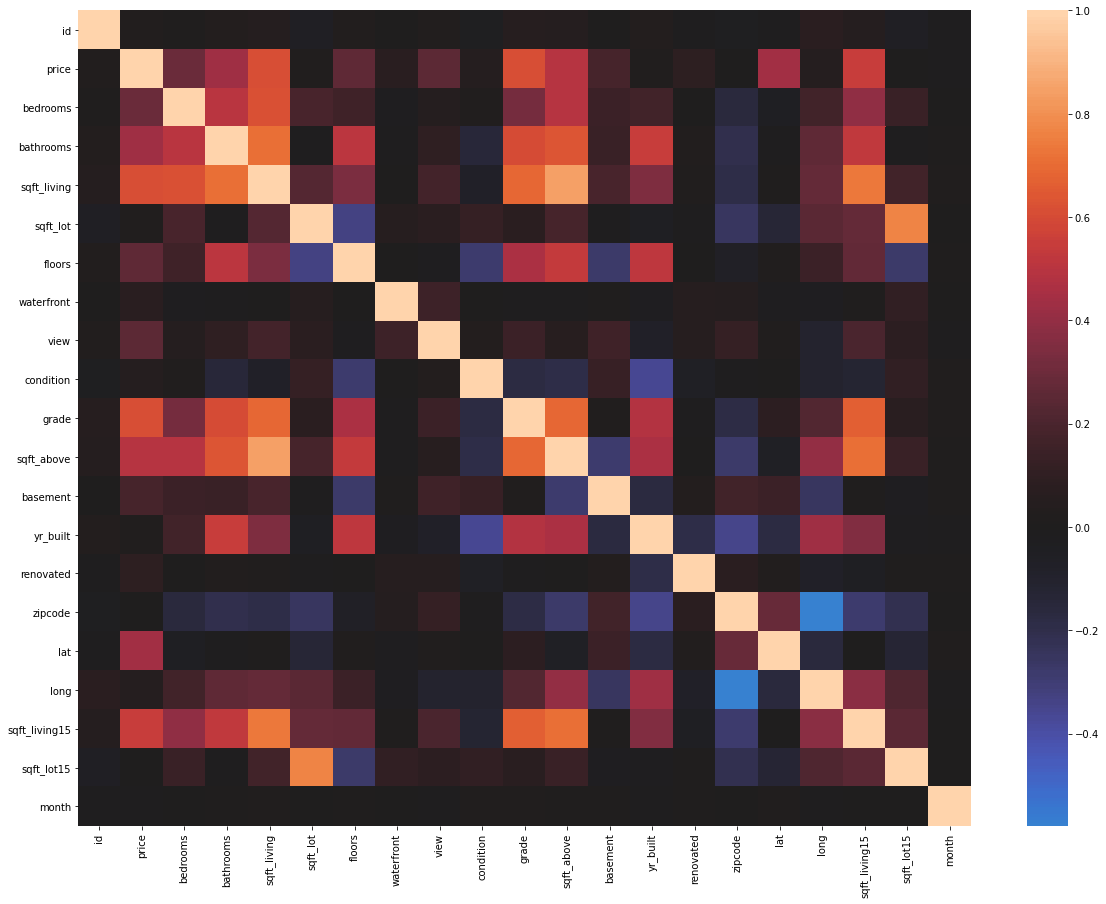

In [27]:
# look for multicollinearity of features
data_pred = df
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data_pred.corr(), center=0);

plt.show()

In [28]:
data_pred.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.030360  0.009872   0.035319     0.039209 -0.048327   
price          0.030360  1.000000  0.294723   0.433075     0.605824  0.013715   
bedrooms       0.009872  0.294723  1.000000   0.504906     0.622561  0.197287   
bathrooms      0.035319  0.433075  0.504906   1.000000     0.712548 -0.006651   
sqft_living    0.039209  0.605824  0.622561   0.712548     1.000000  0.229737   
sqft_lot      -0.048327  0.013715  0.197287  -0.006651     0.229737  1.000000   
floors         0.027960  0.262557  0.155696   0.512504     0.339802 -0.331839   
waterfront     0.005750  0.064240 -0.019943  -0.009529    -0.002554  0.054109   
view           0.029386  0.258528  0.049278   0.095739     0.176501  0.081171   
condition     -0.030614  0.048498  0.019476  -0.145101    -0.072893  0.119031   
grade          0.052103  0.615663  0.327519   0.603937     0.688047  0.079652   
sqft_above     0.044488  0.496288  0.492769   0.633153     0.842653  0.182759   
basement      -0.004359  0.185001  0.143910   0.135537     0.187590 -0.015508   
yr_built       0.037149  0.024349  0.168225   0.546134     0.344658 -0.039897   
renovated     -0.011511  0.093528  0.002960   0.026969     0.025576 -0.010433   
zipcode       -0.035115 -0.003398 -0.160376  -0.208441    -0.194451 -0.248642   
lat           -0.006294  0.442617 -0.042639  -0.013388     0.013145 -0.139585   
long           0.079448  0.041336  0.164793   0.260164     0.275506  0.243725   
sqft_living15  0.047799  0.543823  0.392119   0.527763     0.737890  0.273852   
sqft_lot15    -0.054170  0.001633  0.139506  -0.010426     0.170491  0.769190   
month         -0.015706 -0.011503 -0.001412   0.013388     0.015560 -0.004568   

                 floors  waterfront      view  condition     grade  \
id             0.027960    0.005750  0.029386  -0.030614  0.052103   
price          0.262557    0.064240  0.258528   0.048498  0.615663   
bedrooms       0.155696   -0.019943  0.049278   0.019476  0.327519   
bathrooms      0.512504   -0.009529  0.095739  -0.145101  0.603937   
sqft_living    0.339802   -0.002554  0.176501  -0.072893  0.688047   
sqft_lot      -0.331839    0.054109  0.081171   0.119031  0.079652   
floors         1.000000   -0.003824 -0.019802  -0.285488  0.464376   
waterfront    -0.003824    1.000000  0.154861   0.003167 -0.006156   
view          -0.019802    0.154861  1.000000   0.034384  0.145482   
condition     -0.285488    0.003167  0.034384   1.000000 -0.174100   
grade          0.464376   -0.006156  0.145482  -0.174100  1.000000   
sqft_above     0.537375   -0.013934  0.061601  -0.187414  0.689451   
basement      -0.273683    0.012143  0.160202   0.127878  0.017191   
yr_built       0.516436   -0.026305 -0.075716  -0.362029  0.486201   
renovated      0.002184    0.050556  0.056048  -0.054758 -0.006405   
zipcode       -0.065789    0.042610  0.120240  -0.005421 -0.182738   
lat            0.025244   -0.023187  0.018010  -0.001569  0.084512   
long           0.144501   -0.029359 -0.098759  -0.098802  0.226924   
sqft_living15  0.267203    0.012394  0.202632  -0.120832  0.663818   
sqft_lot15    -0.275559    0.104302  0.082073   0.109959  0.066796   
month          0.011440    0.003148 -0.007619   0.022663  0.014343   

               sqft_above  basement  yr_built  renovated   zipcode       lat  \
id               0.044488 -0.004359  0.037149  -0.011511 -0.035115 -0.006294   
price            0.496288  0.185001  0.024349   0.093528 -0.003398  0.442617   
bedrooms         0.492769  0.143910  0.168225   0.002960 -0.160376 -0.042639   
bathrooms        0.633153  0.135537  0.546134   0.026969 -0.208441 -0.013388   
sqft_living      0.842653  0.187590  0.344658   0.025576 -0.194451  0.013145   
sqft_lot         0.182759 -0.015508 -0.039897  -0.010433 -0.248642 -0.139585   
floors           0.537375 -0.273683  0.516436   0.002184 -0.065789  0.025244   
waterfront      -0.013934  0.012143 -0.026305   0.050556 

In [29]:
#Get our list of highly correlated feature pairs with following steps:

# save correlation matrix as a new data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_correlations = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations to get rid of self pairs
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation
df_correlations[df_correlations.correlation>.70]


level_0        level_1  correlation
pairs                                                                  
(sqft_above, sqft_living)        sqft_above    sqft_living     0.842653
(sqft_living, sqft_above)       sqft_living     sqft_above     0.842653
(sqft_lot15, sqft_lot)           sqft_lot15       sqft_lot     0.769190
(sqft_lot, sqft_lot15)             sqft_lot     sqft_lot15     0.769190
(sqft_living15, sqft_living)  sqft_living15    sqft_living     0.737890
(sqft_living, sqft_living15)    sqft_living  sqft_living15     0.737890
(sqft_living15, sqft_above)   sqft_living15     sqft_above     0.715454
(sqft_above, sqft_living15)      sqft_above  sqft_living15     0.715454
(sqft_living, bathrooms)        sqft_living      bathrooms     0.712548
(bathrooms, sqft_living)          bathrooms    sqft_living     0.712548

we're going to drop sqft_above and sqft_lot15 and just keep the base sqft_living and sqft_lot. We're also going to drop sqft_living15 which fell JUST under the threshold of collinearity, based on the fact that a realtor does not easily have that information available to use in our predictive model.


In [30]:
df.reset_index(drop=True, inplace=True)


In [31]:
# our final dataframe with the columns that we will use in our model

df_cleaned = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 
                'grade', 'basement', 'yr_built', 'renovated', 'zipcode', 'lat', 'month', 'comparative_sf','comparative_lot']]

df_cleaned

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
18476  360000.0         3       2.50         1530      1131     3.0   
18477  400000.0         4       2.50         2310      5813     2.0   
18478  402101.0         2       0.75         1020      1350     2.0   
18479  400000.0         3       2.50         1600      2388     2.0   
18480  325000.0         2       0.75         1020      1076     2.0   

       waterfront  condition  grade  basement  yr_built  renovated  zipcode  \
0             0.0          3      7       0.0      1955        0.0    98178   
1             0.0          3      7       1.0      1951        1.0    98125   
2             0.0          3      6       0.0      1933        0.0    98028   
3             0.0          5      7       1.0      1965        0.0    98136   
4             0.0          3      8       0.0      1987        0.0    98074   
...           ...        ...    ...       ...       ...        ...      ...   
18476         0.0          3      8       0.0      2009        0.0    98103   
18477         0.0          3      8       0.0      2014        0.0    98146   
18478         0.0          3      7       0.0      2009        0.0    98144   
18479         0.0          3      8       0.0      2004        0.0    98027   
18480         0.0          3      7       0.0      2008        0.0    98144   

           lat  month comparative_sf comparative_lot  
0      47.5112     10              2               2  
1      47.7210     12              3               2  
2      47.7379      2              2               2  
3      47.5208     12              3               2  
4      47.6168      2              2               2  
...        ...    ...            ...             ...  
18476  47.6993      5              2               2  
18477  47.5107      2              3               2  
18478  47.5944      6              2               2  
18479  47.5345      1              2               3  
18480  47.5941     10              2               2  

[18481 rows x 17 columns]

We dropped:
* ID - just a home id
* Date - we extracted Month for our use
* View - according to the file, just means the house was viewed
* sqft_above - correlated with sqft_living
* sqft_lot15 - correlated with sqft_lot
* sqft_living15 - correlated with sqft_living
* long - eliminated outliers with long, but no longer used

## Study of variables

In [32]:
# prepare our categories for data transformation by separating into our data types -
# our target dependent variable, categorical variables, and continuous/ordinal variables

target = ['price']
categoricals = ['price', 'yr_built', 'month', 'zipcode', 'waterfront', 'renovated','basement', 'comparative_sf', 'comparative_lot', 'lat']  
continuous = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms', 'condition', 'grade']

### Target Variable

#### TO DO - explain these visuals

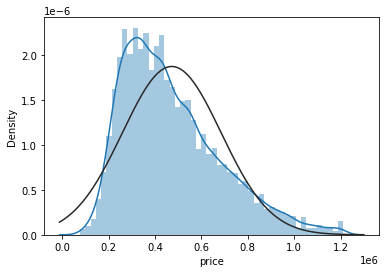

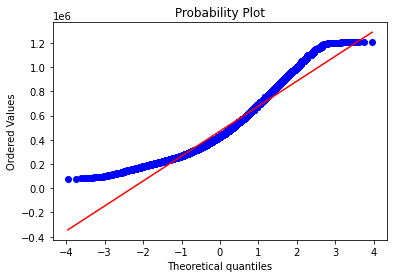

In [33]:
#histogram and normal probability plot
sns.distplot(df_cleaned['price'], fit=norm);
fig = plt.figure()

res = stats.probplot(df_cleaned['price'], plot=plt)

# our sales price histogram is positively skewed and has a high peak

In [34]:
#skewness and kurtosis
print("Skewness: %f" % df_cleaned['price'].skew())
print("Kurtosis: %f" % df_cleaned['price'].kurt())

# price is moderately skewed right, almost highly skewed
# some positive kurtosis, indicating more in the tails. We can see those tails in the right skew.

Skewness: 0.902840
Kurtosis: 0.471884


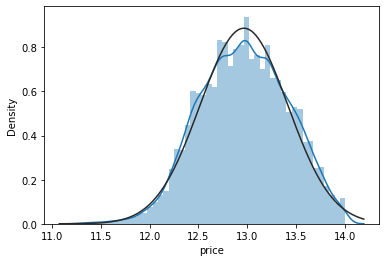

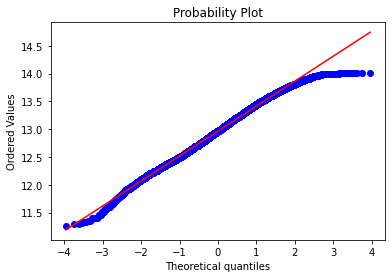

In [35]:
# log transform our target price to improve normality of distribution
df_target_log = np.log(df_cleaned['price'])

#histogram and normal probability plot
sns.distplot(df_target_log, fit=norm);
fig = plt.figure()
res = stats.probplot(df_target_log, plot=plt)

# Our target price is more normally distributed now

### Categoricals

In [36]:
df_categoricals = df_cleaned[categoricals]

df_categoricals

price  yr_built  month  zipcode  waterfront  renovated  basement  \
0      221900.0      1955     10    98178         0.0        0.0       0.0   
1      538000.0      1951     12    98125         0.0        1.0       1.0   
2      180000.0      1933      2    98028         0.0        0.0       0.0   
3      604000.0      1965     12    98136         0.0        0.0       1.0   
4      510000.0      1987      2    98074         0.0        0.0       0.0   
...         ...       ...    ...      ...         ...        ...       ...   
18476  360000.0      2009      5    98103         0.0        0.0       0.0   
18477  400000.0      2014      2    98146         0.0        0.0       0.0   
18478  402101.0      2009      6    98144         0.0        0.0       0.0   
18479  400000.0      2004      1    98027         0.0        0.0       0.0   
18480  325000.0      2008     10    98144         0.0        0.0       0.0   

      comparative_sf comparative_lot      lat  
0                  2               2  47.5112  
1                  3               2  47.7210  
2                  2               2  47.7379  
3                  3               2  47.5208  
4                  2               2  47.6168  
...              ...             ...      ...  
18476              2               2  47.6993  
18477              3               2  47.5107  
18478              2               2  47.5944  
18479              2               3  47.5345  
18480              2               2  47.5941  

[18481 rows x 10 columns]

Let's look at mean price by month and see if there are any better insights.

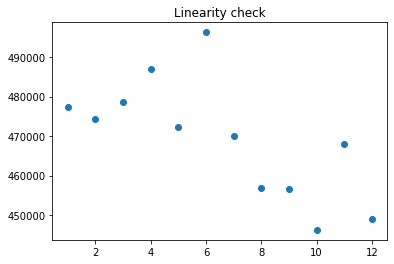

In [37]:
monthly_prices = df_categoricals.groupby('month')['price'].mean()
month = df_categoricals['month'].unique()

plt.scatter(month, monthly_prices)
plt.title("Linearity check")
plt.show()


Our average per month is all over. We are going to keep this as a categorical.

In [38]:
# binning our latitude into equally sized bins, where each bin has the same number of entries

df_categoricals["lat_block"], lat_bins = pd.qcut(df_categoricals['lat'], q=40, retbins=True)

In [39]:
# binning our year built into equally sized bins, where each bin has the same number of entries

df_categoricals["year_block"], year_bins = pd.qcut(df_categoricals['yr_built'], q=20, retbins=True)

In [40]:
# check out our current categorical additions

df_categoricals

price  yr_built  month  zipcode  waterfront  renovated  basement  \
0      221900.0      1955     10    98178         0.0        0.0       0.0   
1      538000.0      1951     12    98125         0.0        1.0       1.0   
2      180000.0      1933      2    98028         0.0        0.0       0.0   
3      604000.0      1965     12    98136         0.0        0.0       1.0   
4      510000.0      1987      2    98074         0.0        0.0       0.0   
...         ...       ...    ...      ...         ...        ...       ...   
18476  360000.0      2009      5    98103         0.0        0.0       0.0   
18477  400000.0      2014      2    98146         0.0        0.0       0.0   
18478  402101.0      2009      6    98144         0.0        0.0       0.0   
18479  400000.0      2004      1    98027         0.0        0.0       0.0   
18480  325000.0      2008     10    98144         0.0        0.0       0.0   

      comparative_sf comparative_lot      lat         lat_block  \
0                  2               2  47.5112    (47.5, 47.512]   
1                  3               2  47.7210  (47.717, 47.727]   
2                  2               2  47.7379  (47.736, 47.747]   
3                  3               2  47.5208  (47.512, 47.523]   
4                  2               2  47.6168   (47.606, 47.62]   
...              ...             ...      ...               ...   
18476              2               2  47.6993  (47.698, 47.707]   
18477              3               2  47.5107    (47.5, 47.512]   
18478              2               2  47.5944  (47.592, 47.606]   
18479              2               3  47.5345  (47.532, 47.539]   
18480              2               2  47.5941  (47.592, 47.606]   

             year_block  
0      (1954.0, 1959.0]  
1      (1950.0, 1954.0]  
2      (1925.0, 1939.0]  
3      (1963.0, 1967.0]  
4      (1981.0, 1987.0]  
...                 ...  
18476  (2007.0, 2011.0]  
18477  (2011.0, 2015.0]  
18478  (2007.0, 2011.0]  
18479  (2002.0, 2005.0]  
18480  (2007.0, 2011.0]  

[18481 rows x 12 columns]

In [41]:
# identifying our categorical columns to one-hot encode
categorical = ['zipcode', 'waterfront', 'renovated', 'basement', 'comparative_sf', 'comparative_lot', 'month', 'year_block', 'lat_block'] #

# prepare a new dataframe that has the correct categorical columns (we aren't dropping from our df_categoricals dataframe,
# because we will be using that later still)
df_categorical_preprocess = df_categoricals[categorical]

# telling Pandas that these columns are categoricals
for item in categorical:
    df_categorical_preprocess[item] = df_categorical_preprocess[item].astype('category')

# adding price to our dataframe so that we can do some visualizations    
df_categorical_preprocess['price'] = df_cleaned['price']

### TO DO - explain the code in this visual

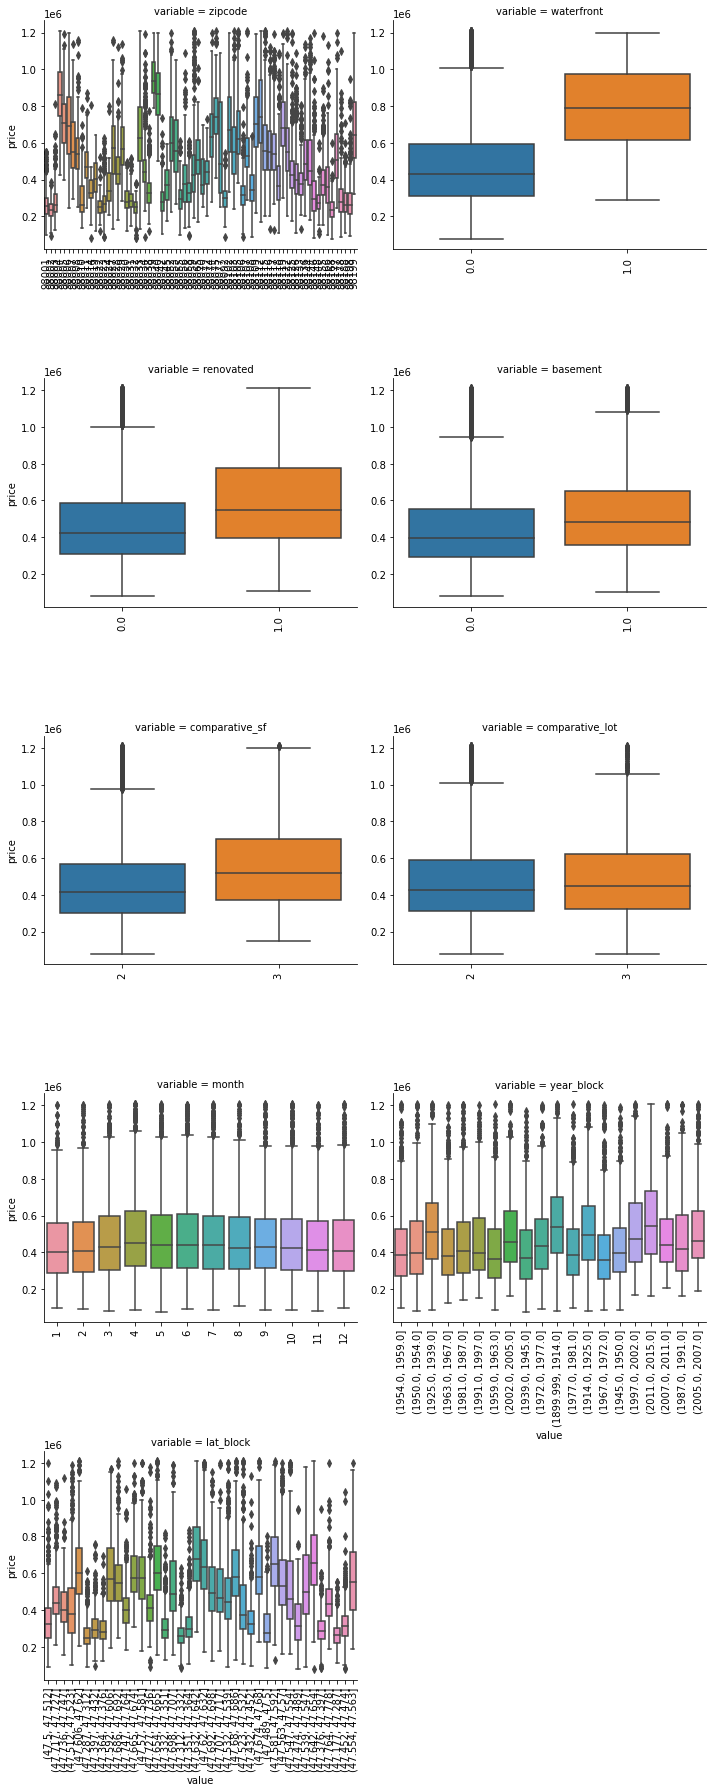

In [42]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_categorical_preprocess, id_vars=['price'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

Comparative_lot, which is a variable that we produced, does not look very important. But we'll save that for our model to determine. We can visually see the impact of several of our other categorical variables. Ultimately we can see with our own eyes why many of these categories work better as very large one-hot-encoded items rather than ordinal continuous variables, even with polynomial relationship.

In [43]:
# make a processed bins file for use with linear regression
df_categoricals_processed = pd.get_dummies(df_categorical_preprocess[categorical], prefix=categorical, drop_first=True)

In [44]:
df_categoricals_processed

zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98011  zipcode_98014  zipcode_98019  zipcode_98022  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98023  zipcode_98024  zipcode_98027  zipcode_98028  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              1   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              1              0   
18480              0              0              0              0   

       zipcode_98029  zipcode_98030  zipcode_98031  zipcode_98032  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
1

### Continuous/Ordinal

In [45]:
df_continuous = df_cleaned[continuous]

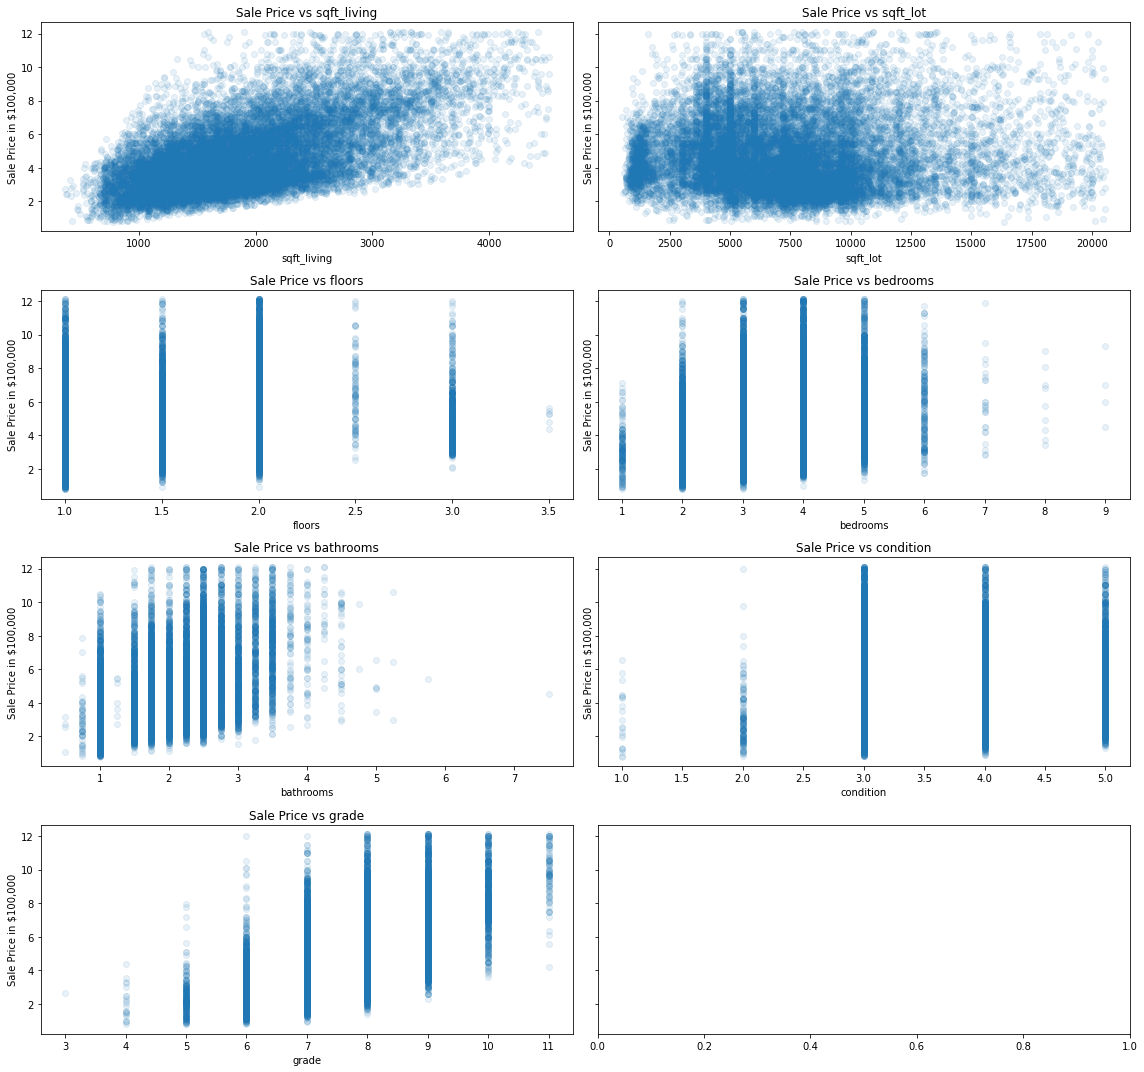

In [46]:
# check linearity

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df_continuous.columns):
    ax.scatter(df_continuous[column], df_cleaned['price']/100000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()


sqft_lot is tenuous on linearity. sqft_living has an obvious linear relationship. Bedrooms, condition, grade, and bathrooms relate linearly to price. Floor does not seem to relate very linearly.

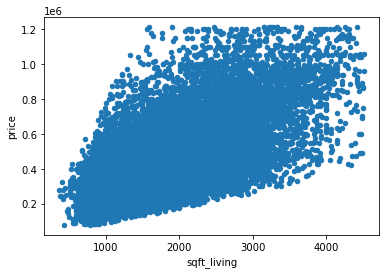

In [47]:
# sqft_living has the strongest and most obvious relationship to price thus far

data = pd.concat([df_cleaned['price'], df_continuous['sqft_living']], axis=1)
data.plot.scatter(x='sqft_living', y='price');


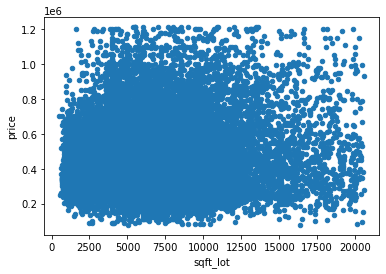

In [48]:
data = pd.concat([df_cleaned['price'], df_continuous['sqft_lot']], axis=1)
data.plot.scatter(x='sqft_lot', y='price');

# this variable does not appear to have a very linear relationship with the target variable.

Fun fact - "grade" was not well defined in the features list. I looked it up and found that grade is "	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value." So, it's the quality of building materials, and DEFINITELY worth keeping in our model.

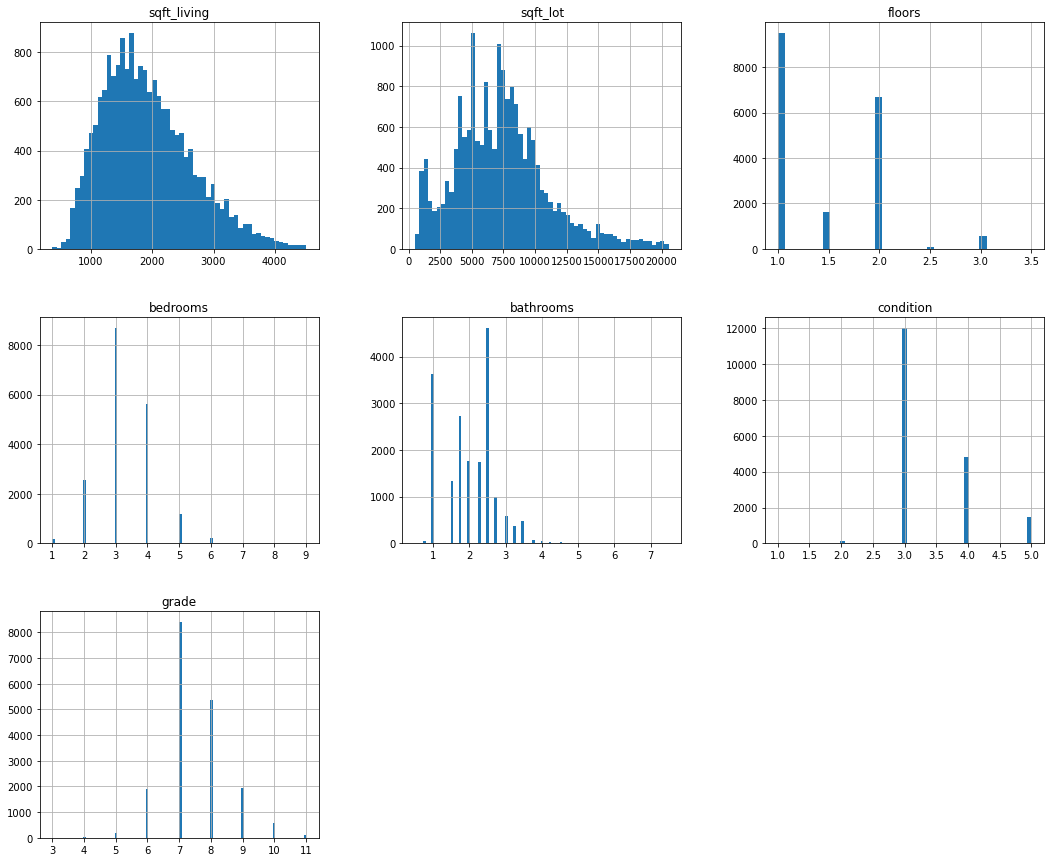

In [49]:
# check out our histograms

df_continuous.hist(figsize=(18,15), bins='auto');


In [50]:
# We're going to transform all of these.

# log features
log_names = [f'{column}' for column in df_continuous.columns]

df_continuous_log = np.log(df_continuous)
df_continuous_log.columns = log_names

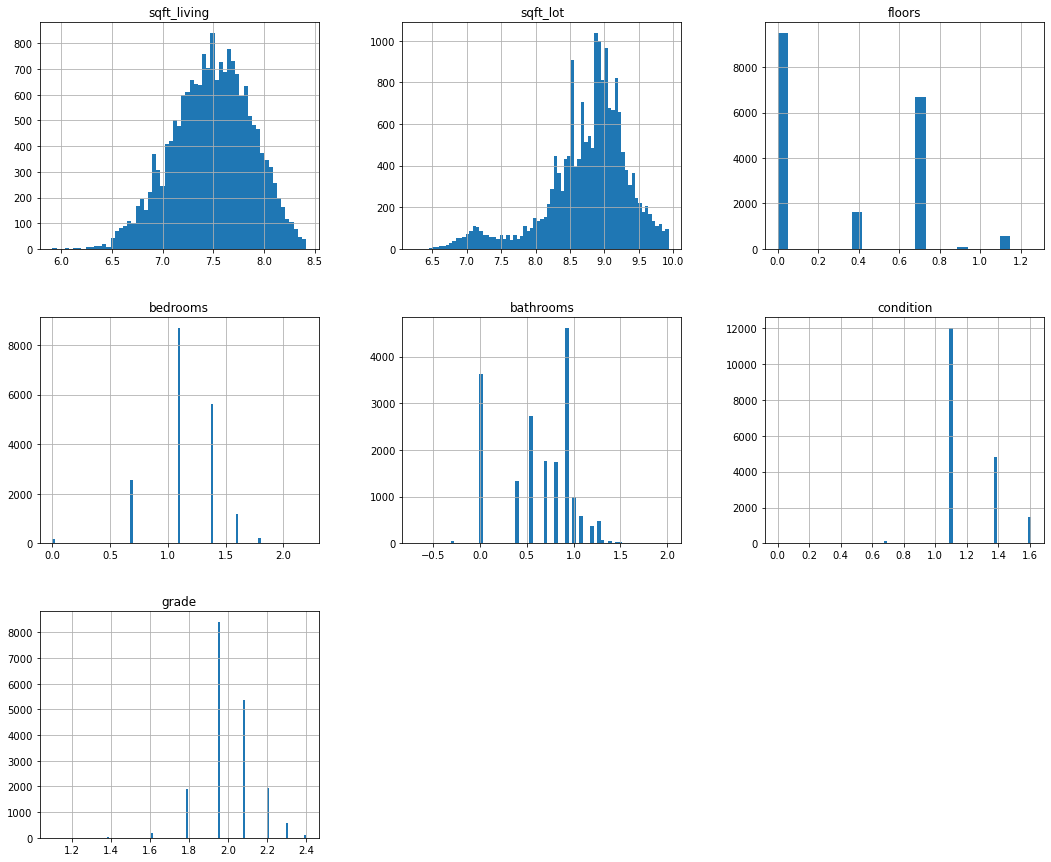

In [51]:
# check out our histograms for our transformed data

df_continuous_log.hist(figsize=(18,15), bins='auto');

# looks more normal

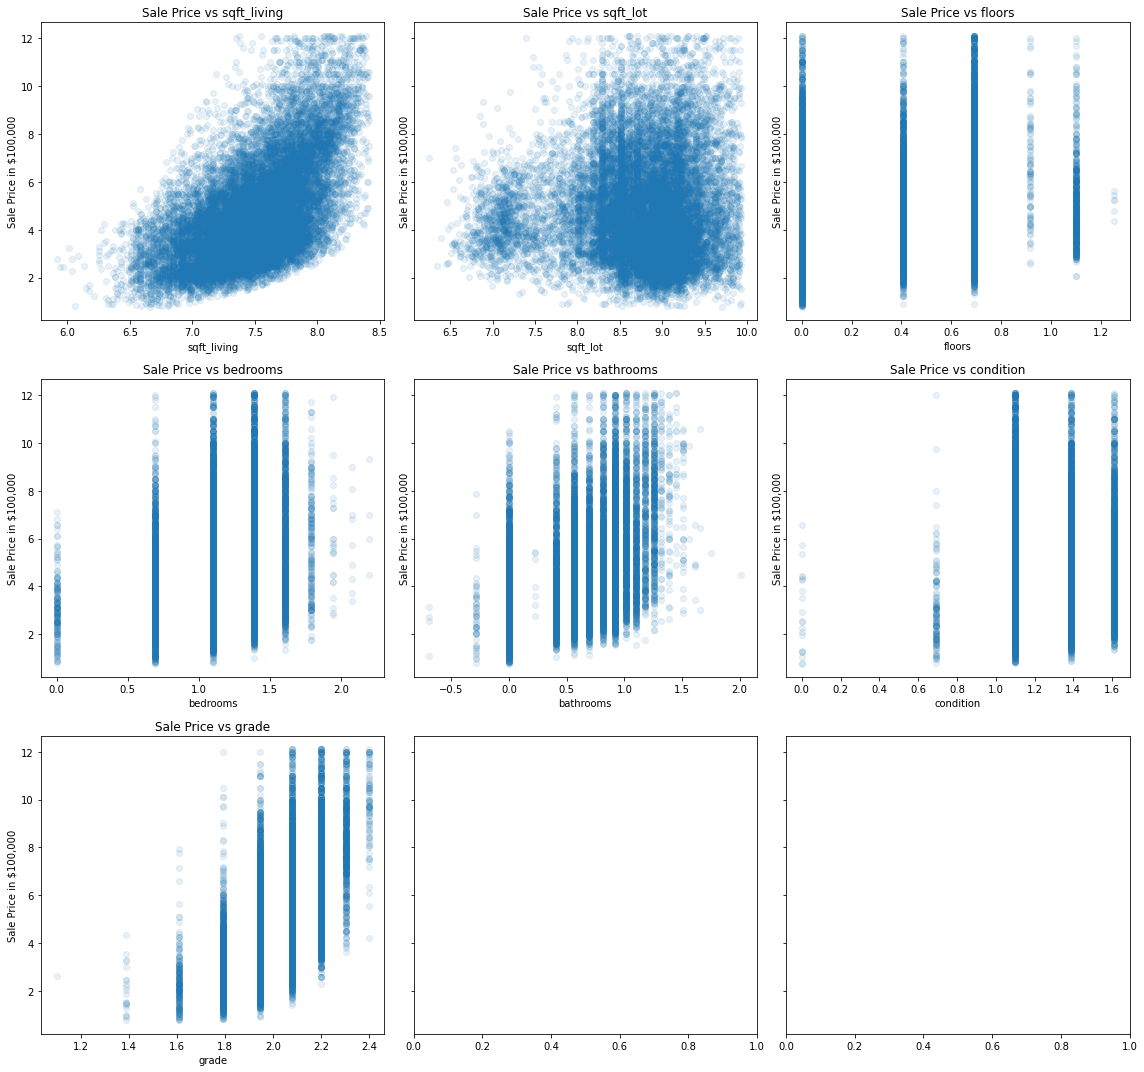

In [52]:
# check linearity

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df_continuous.columns):
    ax.scatter(df_continuous_log[column], df_cleaned['price']/100000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()


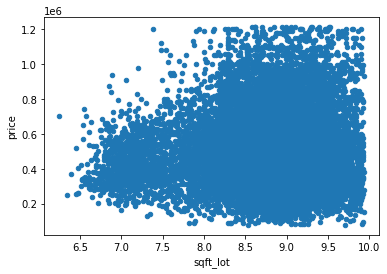

In [53]:
var = 'sqft_lot'
data = pd.concat([df_cleaned['price'], df_continuous_log[var]], axis=1)
data.plot.scatter(x=var, y='price');

# log transforming sqft_lot did not help much. This variable simply does not appear to have a great linear relationship with our target variable.

In [54]:
# standardize all of our values with scikit-learn StandardScaler

scaler = StandardScaler()

df_continuous_standardized = pd.DataFrame(scaler.fit_transform(df_continuous_log),columns = df_continuous.columns)

In [55]:
df_continuous_standardized

sqft_living  sqft_lot    floors  bedrooms  bathrooms  condition  \
0        -1.070155 -0.185078 -0.922552 -0.225776  -1.678014  -0.618473   
1         0.941946  0.225093  1.041728 -0.225776   0.442551  -0.618473   
2        -2.173615  0.758271 -0.922552 -1.670223  -1.678014  -0.618473   
3         0.241525 -0.387018 -0.922552  0.799076   1.194833   2.218223   
4        -0.156947  0.406011 -0.922552 -0.225776   0.134551  -0.618473   
...            ...       ...       ...       ...        ...        ...   
18476    -0.398706 -2.842895  2.190758 -0.225776   0.718067  -0.618473   
18477     0.666239 -0.138084  1.041728  0.799076   0.718067  -0.618473   
18478    -1.446812 -2.550433  1.041728 -1.670223  -2.430296  -0.618473   
18479    -0.283066 -1.608040  1.041728 -0.225776   0.718067  -0.618473   
18480    -1.446812 -2.925265  1.041728 -1.670223  -2.430296  -0.618473   

          grade  
0     -0.440909  
1     -0.440909  
2     -1.611484  
3     -0.440909  
4      0.573090  
...         ...  
18476  0.573090  
18477  0.573090  
18478 -0.440909  
18479  0.573090  
18480 -0.440909  

[18481 rows x 7 columns]

## Final Prep for Linear Regression

Our dataframes to combine:
* df_target_log - log transformed target variable (price)
* df_categoricals_processed - one-hot encoded categorical variables
* df__continuous_standardized - log transformed and standardized continuous variables

In [56]:
preprocessed_scaled = pd.concat([df_target_log, df_continuous_standardized, df_categoricals_processed], axis=1)

In [57]:
# preprocessed data ready for linear regression algorithm

preprocessed_scaled

price  sqft_living  sqft_lot    floors  bedrooms  bathrooms  \
0      12.309982    -1.070155 -0.185078 -0.922552 -0.225776  -1.678014   
1      13.195614     0.941946  0.225093  1.041728 -0.225776   0.442551   
2      12.100712    -2.173615  0.758271 -0.922552 -1.670223  -1.678014   
3      13.311329     0.241525 -0.387018 -0.922552  0.799076   1.194833   
4      13.142166    -0.156947  0.406011 -0.922552 -0.225776   0.134551   
...          ...          ...       ...       ...       ...        ...   
18476  12.793859    -0.398706 -2.842895  2.190758 -0.225776   0.718067   
18477  12.899220     0.666239 -0.138084  1.041728  0.799076   0.718067   
18478  12.904459    -1.446812 -2.550433  1.041728 -1.670223  -2.430296   
18479  12.899220    -0.283066 -1.608040  1.041728 -0.225776   0.718067   
18480  12.691580    -1.446812 -2.925265  1.041728 -1.670223  -2.430296   

       condition     grade  zipcode_98002  zipcode_98003  zipcode_98004  \
0      -0.618473 -0.440909              0              0              0   
1      -0.618473 -0.440909              0              0              0   
2      -0.618473 -1.611484              0              0              0   
3       2.218223 -0.440909              0              0              0   
4      -0.618473  0.573090              0              0              0   
...          ...       ...            ...            ...            ...   
18476  -0.618473  0.573090              0              0              0   
18477  -0.618473  0.573090              0              0              0   
18478  -0.618473 -0.440909              0              0              0   
18479  -0.618473  0.573090              0              0              0   
18480  -0.618473 -0.440909              0              0              0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477      

In [58]:
# set our random seed for the notebook. We could randomize this each time the notebook is run, or whatevever,
# but ultimately we want all of our train/test splits to use the same data
randomstate = 42

In [59]:
# prepare linear regression data set

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [60]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

# Visualizations with Geopandas

We're going to use the Geopandas library and publicly available GIS maps to visualize the importance of location as a feature.

In [61]:
# reading in our downloaded shape files for king county, downloaded from the king county public GIS site

# we're loading this in as a geopandas data frame, which will read similar to a pandas data frame, but is different!

king_county_surrounding = gpd.read_file('gis/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.shp')

In [62]:
# check out our data

king_county_surrounding

OBJECTID    ZIP ZIPCODE COUNTY  ZIP_TYPE     Shape_Leng    Shape_Area  \
0           1  98031   98031    033  Standard  117508.231410  2.280129e+08   
1           2  98032   98032    033  Standard  166737.665152  4.826754e+08   
2           3  98033   98033    033  Standard  101363.832386  2.566747e+08   
3           4  98034   98034    033  Standard   98550.460072  2.725072e+08   
4           5  98030   98030    033  Standard   94351.274949  2.000954e+08   
..        ...    ...     ...    ...       ...            ...           ...   
199       200  98402   98402    053  Standard   30734.175856  2.612224e+07   
200       201  98403   98403    053  Standard   23495.033353  2.890938e+07   
201       202  98404   98404    053  Standard   61572.153248  2.160645e+08   
202       203  98405   98405    053  Standard   50261.100128  1.193118e+08   
203       204  98406   98406    053  Standard   74118.971224  1.088373e+08   

                                              geometry  
0    POLYGON ((-122.21842 47.43750, -122.21935 47.4...  
1    MULTIPOLYGON (((-122.24187 47.44122, -122.2411...  
2    POLYGON ((-122.20571 47.65170, -122.20511 47.6...  
3    POLYGON ((-122.17551 47.73706, -122.17554 47.7...  
4    POLYGON ((-122.16746 47.38549, -122.16746 47.3...  
..                                                 ...  
199  POLYGON ((-122.44279 47.26479, -122.44272 47.2...  
200  POLYGON ((-122.44382 47.26617, -122.44434 47.2...  
201  POLYGON ((-122.38900 47.23495, -122.38932 47.2...  
202  POLYGON ((-122.44092 47.23639, -122.44944 47.2...  
203  MULTIPOLYGON (((-122.52125 47.27121, -122.5191...  

[204 rows x 8 columns]

In [63]:
# what type is all of this data?

king_county_surrounding.dtypes

# As a geopandas object, it has this data type "geometry" where it describes the shapes and coordinates

OBJECTID         int64
ZIP              int64
ZIPCODE         object
COUNTY          object
ZIP_TYPE        object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [64]:
# This particular GIS map is king county and surrounding, but we want ONLY king county, so we filter out the other counties

king_county = king_county_surrounding[(king_county_surrounding['COUNTY'] == '033')]

In [65]:
# Ready to work with this data frame

king_county

OBJECTID    ZIP ZIPCODE COUNTY  ZIP_TYPE     Shape_Leng    Shape_Area  \
0           1  98031   98031    033  Standard  117508.231410  2.280129e+08   
1           2  98032   98032    033  Standard  166737.665152  4.826754e+08   
2           3  98033   98033    033  Standard  101363.832386  2.566747e+08   
3           4  98034   98034    033  Standard   98550.460072  2.725072e+08   
4           5  98030   98030    033  Standard   94351.274949  2.000954e+08   
..        ...    ...     ...    ...       ...            ...           ...   
124       125  98288   98288    033    PO Box  484750.182616  8.748980e+09   
127       128  98188   98188    033  Standard   94574.310332  2.187023e+08   
128       129  98195   98195    033  Standard   23454.900804  2.170139e+07   
137       138  98354   98354    033  Standard   13089.520224  8.506824e+06   
187       188  98422   98422    033  Standard    9173.558049  1.574725e+06   

                                              geometry  
0    POLYGON ((-122.21842 47.43750, -122.21935 47.4...  
1    MULTIPOLYGON (((-122.24187 47.44122, -122.2411...  
2    POLYGON ((-122.20571 47.65170, -122.20511 47.6...  
3    POLYGON ((-122.17551 47.73706, -122.17554 47.7...  
4    POLYGON ((-122.16746 47.38549, -122.16746 47.3...  
..                                                 ...  
124  POLYGON ((-121.11918 47.77994, -121.11918 47.7...  
127  POLYGON ((-122.24187 47.44122, -122.24363 47.4...  
128  POLYGON ((-122.29028 47.65501, -122.29032 47.6...  
137  POLYGON ((-122.31230 47.26090, -122.31385 47.2...  
187  MULTIPOLYGON (((-122.33147 47.26071, -122.3304...  

[85 rows x 8 columns]

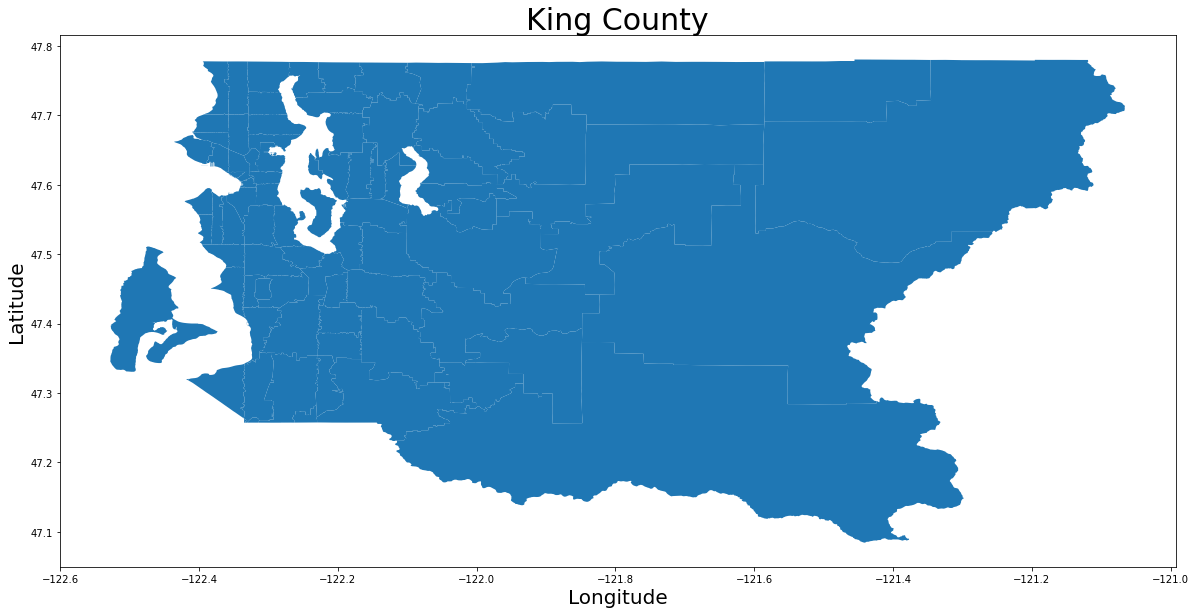

In [66]:
# the heart of a geopandas data frame is visualization, and it is perfectly integrated to do that in a few lines. Here is King County

fig, ax = plt.subplots(figsize = (20,40))
king_county.plot(ax=ax)
ax.set_title('King County',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20});

In [67]:
# Our map looks squat and ugly. We are going to figure out how to fix that. First let's check what kind of projection the data
# frame is using

king_county.crs

{'init': 'epsg:4326'}

In [68]:
# We are changing our data into a mercator projection which is the standard world map-style projection that elongates latitude
# and will make the map look more the way we are used to

# Project the data into Mercator Projection epsg=3395
king_county_projected = king_county.to_crs({'init': 'epsg:3395'})

# See the geometry column of the projected countries
king_county_projected['geometry'][:5] 

0    POLYGON ((-13605292.603 5982293.790, -13605395...
1    MULTIPOLYGON (((-13607902.666 5982902.872, -13...
2    POLYGON ((-13603877.542 6017509.230, -13603810...
3    POLYGON ((-13600515.564 6031584.218, -13600518...
4    POLYGON ((-13599619.856 5973763.925, -13599619...
Name: geometry, dtype: geometry

In [69]:
# We're making a new dataframe which is a groupby of our original data grouped by zipcode then sorted by median value
zipsorted = pd.DataFrame(df.groupby('zipcode')['price'].median().sort_values(ascending=True))

# renaming our price column to median
zipsorted.rename(columns={'price':'median'}, inplace=True)

In [70]:
# merging our median home value onto the king county geopandas data frame, on zip code
merged = king_county_projected.set_index('ZIP').join(zipsorted)
merged.head()

OBJECTID ZIPCODE COUNTY  ZIP_TYPE     Shape_Leng    Shape_Area  \
ZIP                                                                     
98031         1   98031    033  Standard  117508.231410  2.280129e+08   
98032         2   98032    033  Standard  166737.665152  4.826754e+08   
98033         3   98033    033  Standard  101363.832386  2.566747e+08   
98034         4   98034    033  Standard   98550.460072  2.725072e+08   
98030         5   98030    033  Standard   94351.274949  2.000954e+08   

                                                geometry    median  
ZIP                                                                 
98031  POLYGON ((-13605292.603 5982293.790, -13605395...  283000.0  
98032  MULTIPOLYGON (((-13607902.666 5982902.872, -13...  249000.0  
98033  POLYGON ((-13603877.542 6017509.230, -13603810...  627000.0  
98034  POLYGON ((-13600515.564 6031584.218, -13600518...  440000.0  
98030  POLYGON ((-13599619.856 5973763.925, -13599619...  280000.0

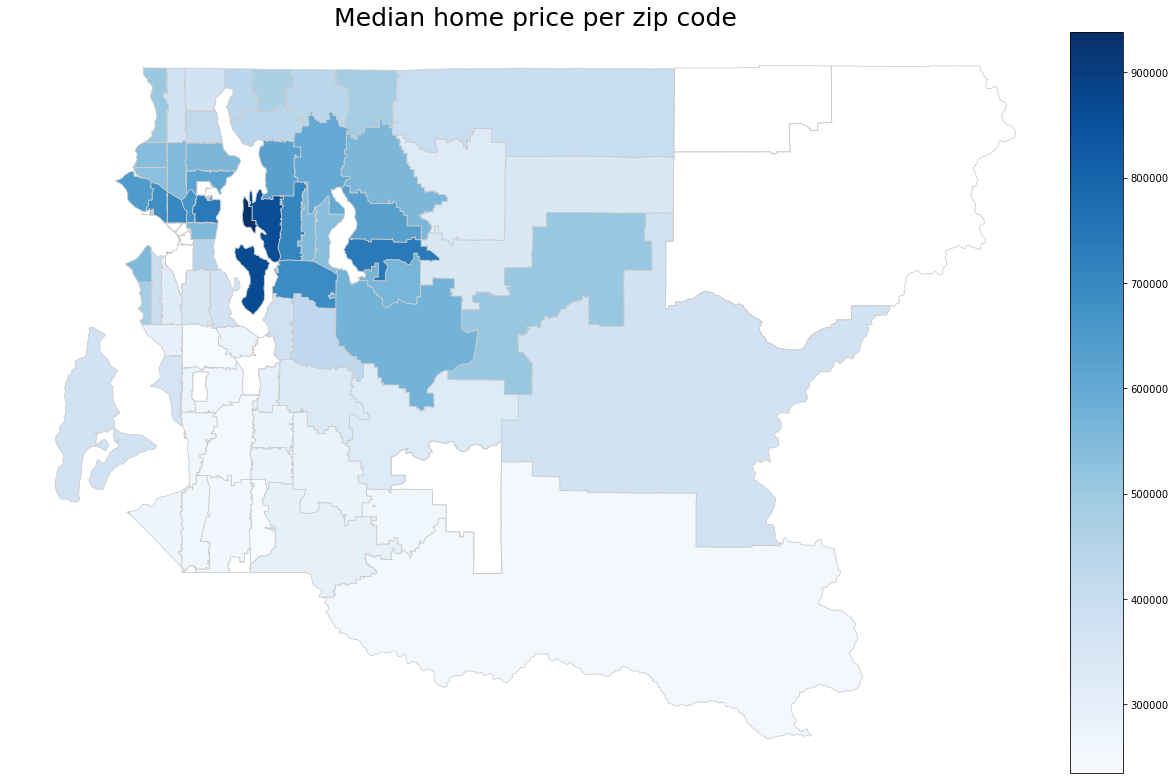

In [71]:
# Making a choropleth which is a geo heat map 

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(20,40))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax.set_axis_off()
ax.set_title('Median home price per zip code', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create map
merged.plot(column='median', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax);

Now we're going to build a different type of map, which will have all of our sales plotted in a scatter overlaid on our king county zip code map. We'll use the latitidue and longitude coordinates in our original data frame to do this.

In [72]:
crs = {'init': 'epsg:4326'} # initiating my coordinate system
geometry = [Point(x,y) 
           for x,y in zip(df.long,df.lat)] # creating points
geo_df = gpd.GeoDataFrame(df, # the dataframe
                          crs = crs, # coordinate system that the data is using - lat/long uses the crs we initiated
                          geometry = geometry) # geometric points

# Project the coordinates into Mercator Projection epsg=3395 which is what we made our King County map into (otherwise
# our data points would not line up with our map properly)
geo_df_p = geo_df.to_crs({'init': 'epsg:3395'})

In [73]:
# looking at our data to get our quantiles for price

geo_df_p.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.848100e+04  1.848100e+04  18481.000000  18481.000000  18481.000000   
mean   4.734286e+09  4.724418e+05      3.317353      2.032696   1919.212434   
std    2.869481e+09  2.126000e+05      0.880394      0.704593    725.920920   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.301401e+09  3.100000e+05      3.000000      1.500000   1370.000000   
50%    4.047200e+09  4.299000e+05      3.000000      2.000000   1810.000000   
75%    7.504021e+09  5.940000e+05      4.000000      2.500000   2360.000000   
max    9.900000e+09  1.210000e+06      9.000000      7.500000   4510.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  18481.000000  18481.000000  18481.000000  18481.000000  18481.000000   
mean    7351.567935      1.476219      0.001894      0.073319      3.409935   
std     3681.899788      0.542800      0.043478      0.260666      0.649273   
min      520.000000      1.000000      0.000000      0.000000      1.000000   
25%     4840.000000      1.000000      0.000000      0.000000      3.000000   
50%     7200.000000      1.000000      0.000000      0.000000      3.000000   
75%     9334.000000      2.000000      0.000000      0.000000      4.000000   
max    20562.000000      3.500000      1.000000      1.000000      5.000000   

              grade    sqft_above      basement      yr_built     renovated  \
count  18481.000000  18481.000000  18481.000000  18481.000000  18481.000000   
mean       7.483091   1654.500135      0.379038   1970.097776      0.030139   
std        0.992313    683.241303      0.485161     29.875222      0.170975   
min        3.000000    370.000000      0.000000   1900.000000      0.000000   
25%        7.000000   1150.000000      0.000000   1950.000000      0.000000   
50%        7.000000   1480.000000      0.000000   1972.000000      0.000000   
75%        8.000000   2010.000000      1.000000   1997.000000      0.000000   
max       11.000000   4500.000000      1.000000   2015.000000      1.000000   

            zipcode           lat          long  sqft_living15    sqft_lot15  \
count  18481.000000  18481.000000  18481.000000   18481.000000  18481.000000   
mean   98081.325902     47.560555   -122.228745    1875.490233   7329.080623   
std       54.024255      0.138040      0.129548     590.235908   4079.058096   
min    98001.000000     47.177500   -122.512000     460.000000    651.000000   
25%    98033.000000     47.474500   -122.336000    1450.000000   5000.000000   
50%    98074.000000     47.570500   -122.265000    1760.000000   7210.000000   
75%    98118.000000     47.680000   -122.150000    2200.000000   9000.000000   
max    98199.000000     47.777600   -121.770000    5790.000000  93393.000000   

              month  
count  18481.000000  
mean       6.574536  
std        3.119721  
min        1.000000  
25%        4.000000  
50%        6.000000  
75%        9.000000  
max       12.000000

In [74]:
# dividing our data into four quantiles

first = geo_df_p[geo_df_p['price'] < 194000]

second = geo_df_p[(geo_df_p['price'] >= 194000) & (geo_df['price'] < 310000)]

third = geo_df_p[(geo_df_p['price'] >= 310000) & (geo_df['price'] < 369950)]

fourth = geo_df_p[(geo_df_p['price'] >= 369950) & (geo_df['price'] < 429900)]

fifth = geo_df_p[(geo_df_p['price'] >= 429900) & (geo_df['price'] < 511950)]

sixth = geo_df_p[(geo_df_p['price'] >= 511950) & (geo_df['price'] < 594000)]

seventh = geo_df_p[(geo_df_p['price'] >= 594000) & (geo_df['price'] < 902000)]

eighth = geo_df_p[geo_df_p['price'] >= 902000]

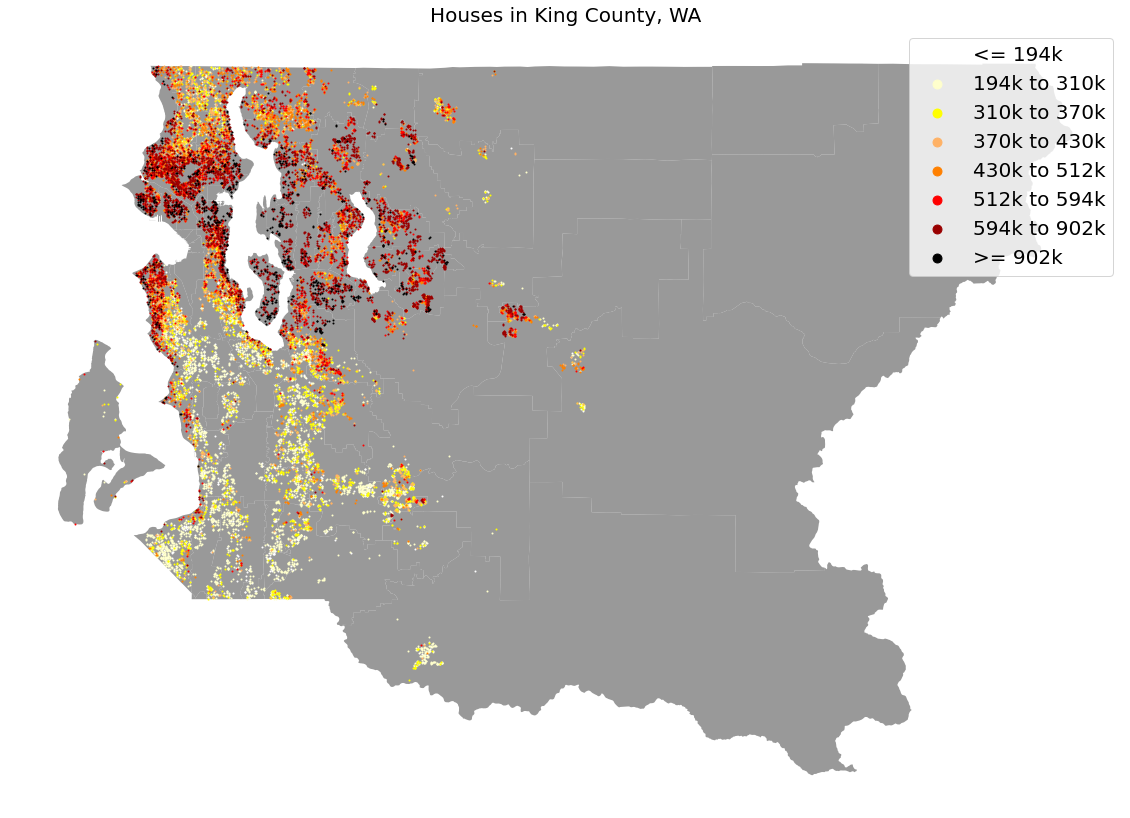

In [75]:
# plotting our quantiles on our map with increasing color depth for price

fig, ax = plt.subplots(figsize = (20,40))
ax.set_aspect(2)
king_county_projected.plot(ax=ax, alpha = 0.8, color = 'grey')

first.plot(ax = ax , markersize = 1, color = '#FFFFFF',marker = 'o',label = '<= 194k')
second.plot(ax = ax , markersize = 1, color = '#FFFFCC',marker = 'o',label = '194k to 310k')
third.plot(ax = ax , markersize = 1, color = '#FFFF00',marker = 'o',label = '310k to 370k')
fourth.plot(ax = ax , markersize = 1, color = '#FFB266',marker = 'o',label = '370k to 430k')
fifth.plot(ax = ax , markersize = 1, color = '#FF8000',marker = 'o',label = '430k to 512k')
sixth.plot(ax = ax , markersize = 1, color = '#FF0000',marker = 'o',label = '512k to 594k')
seventh.plot(ax = ax , markersize = 1, color = '#990000',marker = 'o',label = '594k to 902k')
eighth.plot(ax = ax , markersize = 1, color = '#000000',marker = 'o',label = '>= 902k')


plt.legend(prop = {'size':20} )


lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=20)
for handle in lgnd.legendHandles:
    handle.set_sizes([80.0])

ax.set_title('Houses in King County, WA', fontdict = {'fontsize':
                20})

ax.set_axis_off()

After seeing this particular visualization, we went back and included latitude as a predictor in our model, independent of zip code.

# Model Explorations

We're going to evaluate a few different variations of our linear regression model, as well as a few more complex model types. In order to keep track of our results, we'll be making a dictionary to store our model accuracy results.

In [76]:
models = {}
models['Models'] = []
models['r2'] = []
models['mae'] = []
models['rmse'] = []

## Base Linear Regression Model

Run a base model with no cross-validation or specific feature selection to see our base model scores.

In [77]:
predictors_train = sm.add_constant(X_train_val)
model = sm.OLS(y_train_val, predictors_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     642.5
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:37:09   Log-Likelihood:                 5800.4
No. Observations:               14784   AIC:                        -1.130e+04
Df Residuals:                   14633   BIC:                        -1.015e+04
Df Model:                         150                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.4700      0.017    731.634      0.000      12.437      12.503
sqft_living                     0.1811      0.003     55.837      0.000       0.175       0.187
sqft_lot                        0.0783      0.003     28.759      0.000       0.073       0.084
floors                         -0.0066      0.002     -2.651      0.008      -0.011      -0.002
bedrooms                       -0.0118      0.002     -6.141      0.000      -0.016      -0.008
bathrooms                       0.0169      0.003      6.742      0.000       0.012       0.022
condition                       0.0356      0.002     22.592      0.000       0.032       0.039
grade                           0.0903      0.002     38.212      0.000       0.086       0.095
zipcode_98002                   0.0178      0.017      1.047      0.295      -0.016       0.051
zipcode_98003                   0.0516      0.015      3.327      0.001       0.021       0.082
zipcode_98004                   0.5870      0.041     14.305      0.000       0.507       0.667
zipcode_98005                   0.3069      0.042      7.371      0.000       0.225       0.388
zipcode_98006                   0.2804      0.036      7.832      0.000       0.210       0.351
zipcode_98007                   0.1943      0.042      4.658      0.000       0.113       0.276
zipcode_98008                   0.2082      0.040      5.183      0.000       0.129       0.287
zipcode_98010                   0.2177      0.027      8.023      0.000       0.165       0.271
zipcode_98011                   0.2250      0.047      4.760      0.000       0.132       0.318
zipcode_98014                  -0.1222      0.050     -2.444      0.015      -0.220      -0.024
zipcode_98019                   0.0301      0.047      0.636      0.525      -0.063       0.123
zipcode_98022                   0.0564      0.021      2.745      0.006       0.016       0.097
zipcode_98023                   0.0355      0.015      2.381      0.017       0.006       0.065
zipcode_98024                  -0.0125      0.051     -0.247      0.805      -0.112       0.087
zipcode_98027                   0.3190      0.036      8.905      0.000       0.249       0.389
zipcode_98028                   0.1765      0.047      3.794      0.000       0.085       0.268
zipcode_98029                   0.2484      0.036      6.867      0.000       0.178       0.319
zipcode_98030                   0.0330      0.020      1.625      0.104      -0.007       0.073
zipcode_98031                   0.0673      0.024      2.839      0.005       0.021       0.114
zipcode_98032                  -0.0051      0.025     -0.207      0.836      -0.053       0.043
zipcode_98033                   0.3377      0.043      7.777      0.000       0.253       0.423
zipcode_980

Perform cross-validation with our base model over 5 splits and get our mean R^2.

In [78]:
model = LinearRegression()
model.fit(X_train_val, y_train_val)
cv_5 = cross_val_score(model, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8646589275574644

In [79]:
# How many predictors are in our base model?
print("{} predictors used for this model".format(X.shape[1]))

150 predictors used for this model


In [80]:
# apply our model to our test set and get predicted values
test_predictions = model.predict(X_test)

# reverse log transform our predicted values
test_predictions_unscaled = np.exp(test_predictions)

# compare our predicted values to the actual values
predicted_prices_basiclr = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_unscaled.astype(int)})
predicted_prices_basiclr

Actual  Predicted
3652   402500     358907
9425   339499     294837
1157   282000     348183
17936  757499     924869
6228   445499     479758
...       ...        ...
15940  324999     309646
10782  686500     693529
17047  399440     353052
1092   269999     263616
10911  144999     333566

[3697 rows x 2 columns]

<AxesSubplot:xlabel='Actual', ylabel='residuals'>

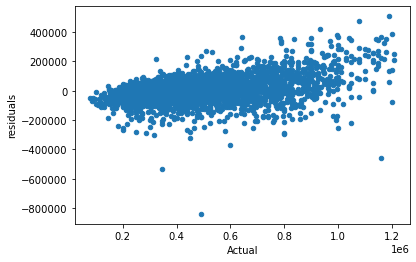

In [81]:
predicted_prices_basiclr["residuals"] = predicted_prices_basiclr["Actual"] - predicted_prices_basiclr["Predicted"]
predicted_prices_basiclr.plot(x = "Actual", y = "residuals",kind = "scatter")

# our residuals show some heteroskedasticity

In [82]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, test_predictions_unscaled), 2)
mae

53892.71

In [83]:
rmse = round(np.sqrt(mean_squared_error(test_actual, test_predictions_unscaled)), 2)
rmse

80135.75

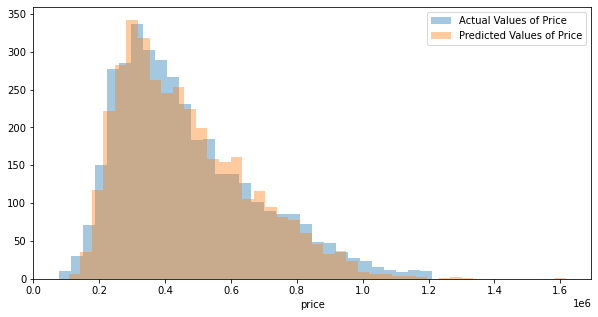

In [84]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(test_predictions_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [85]:
models['Models'].append('Basic LR')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Study Residuals

In [86]:
# We need our statsmodels model again to plot residuals
predictors_train = sm.add_constant(X_train_val)
model = sm.OLS(y_train_val, predictors_train).fit()

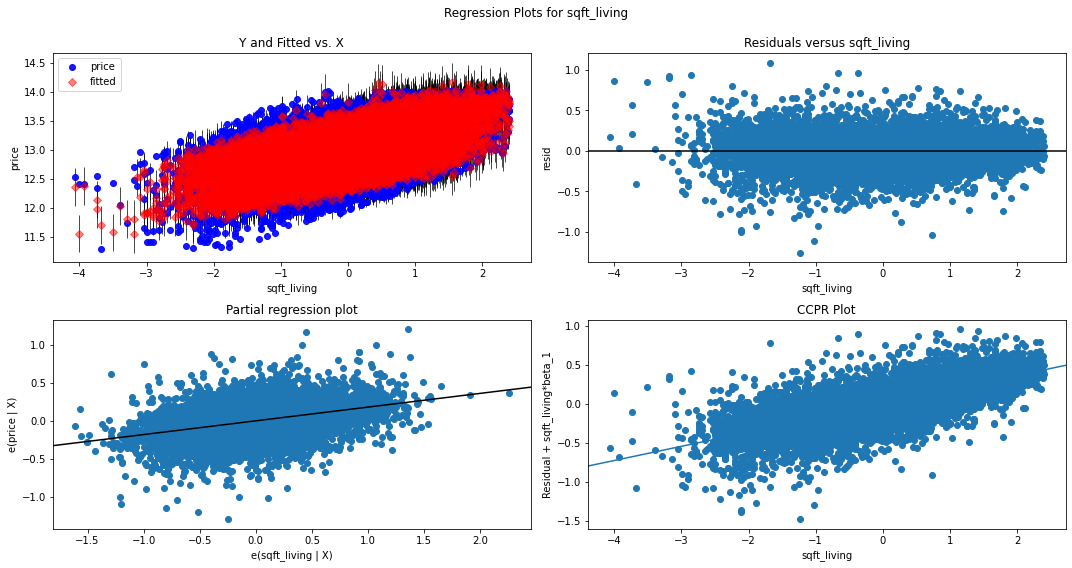

In [87]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

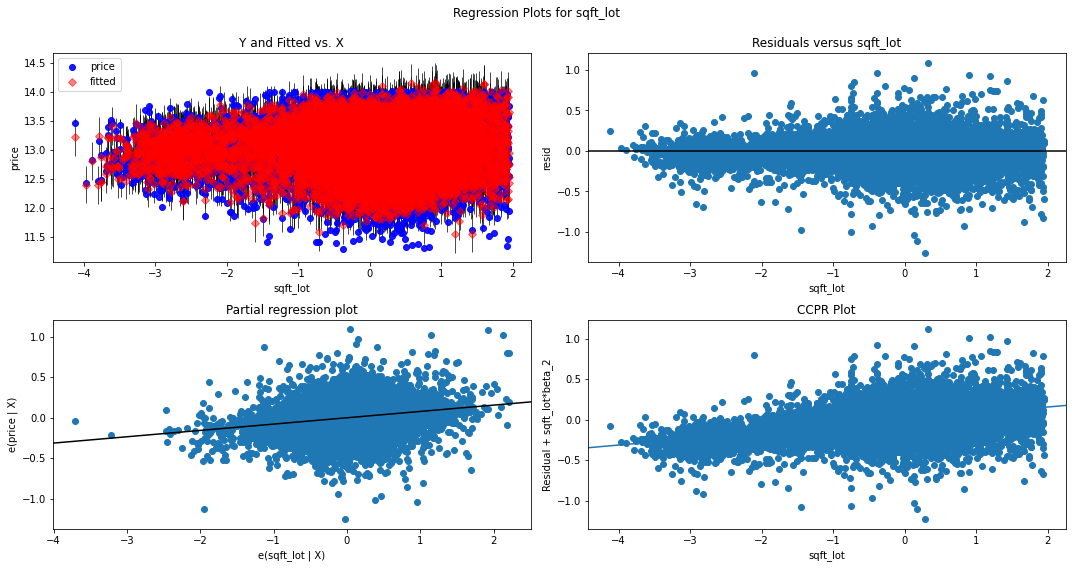

In [88]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

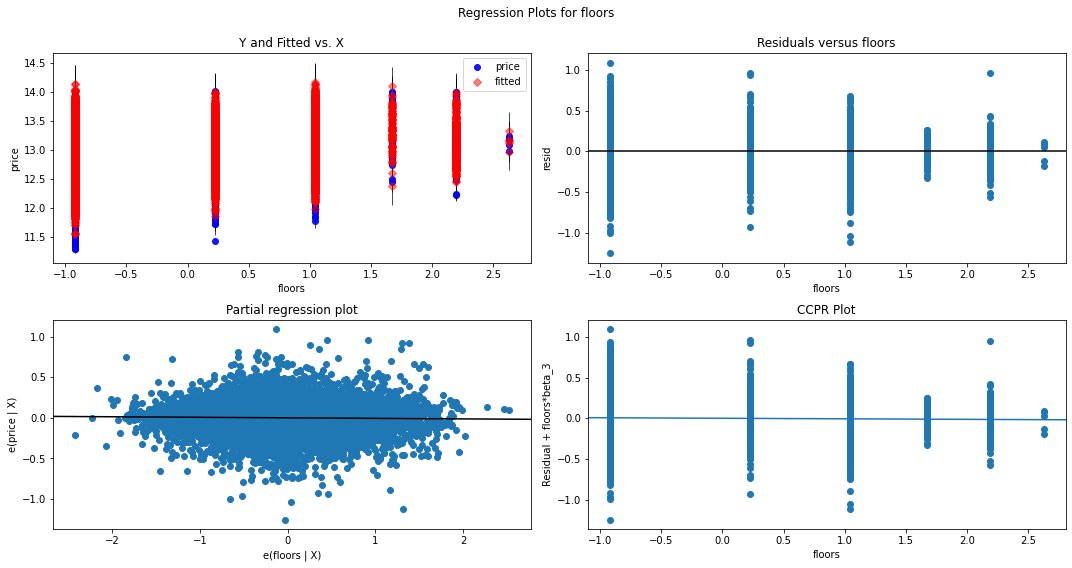

In [89]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "floors", fig=fig)
plt.show()

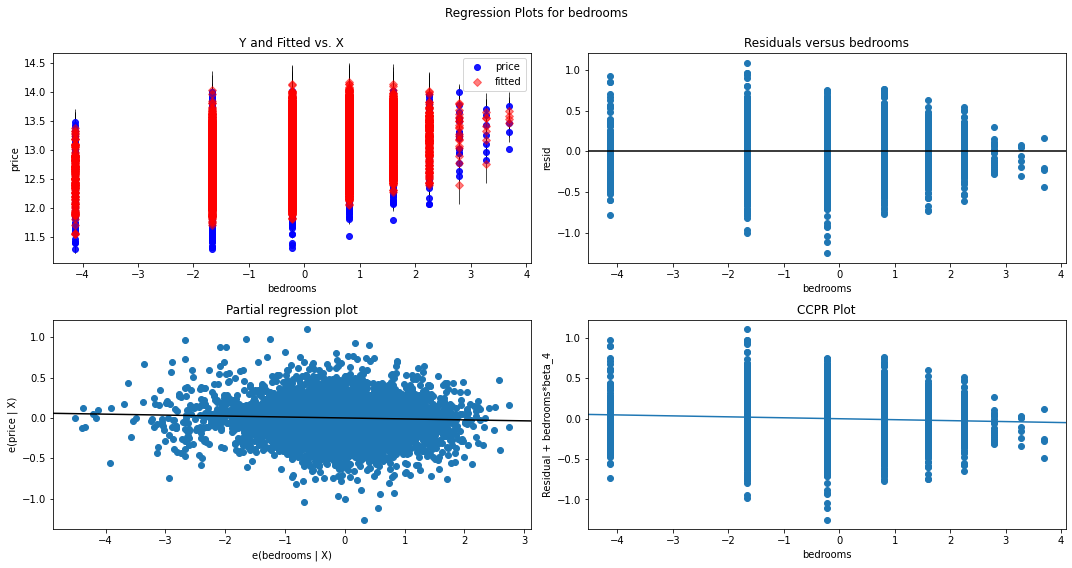

In [90]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

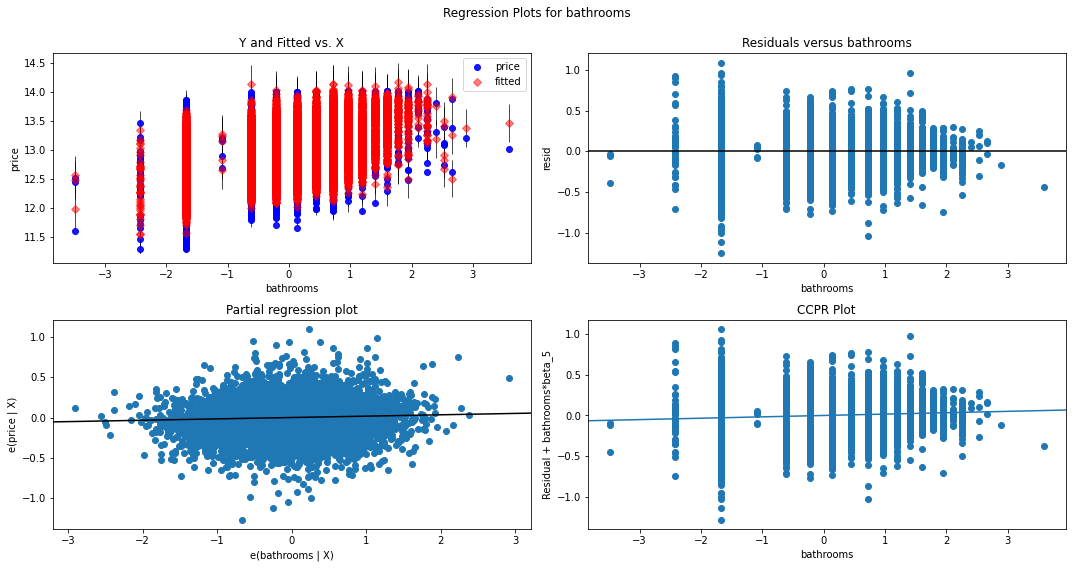

In [91]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

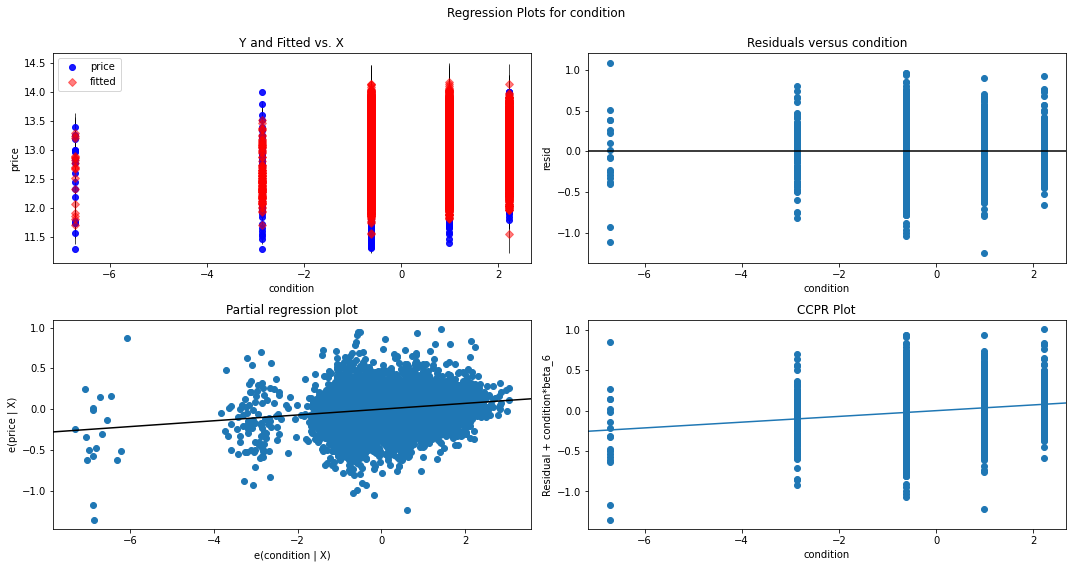

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

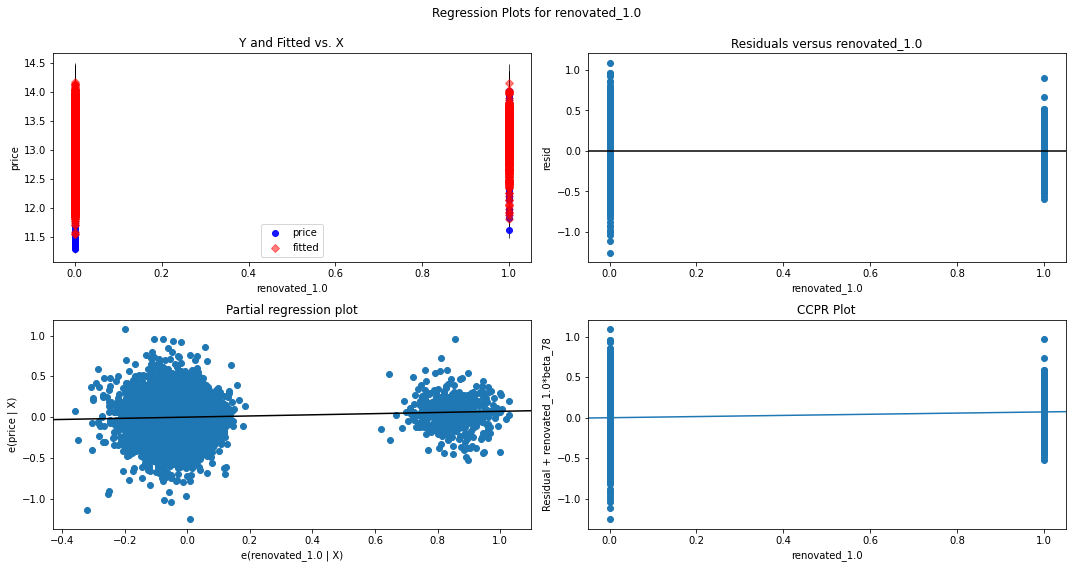

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "renovated_1.0", fig=fig)
plt.show()

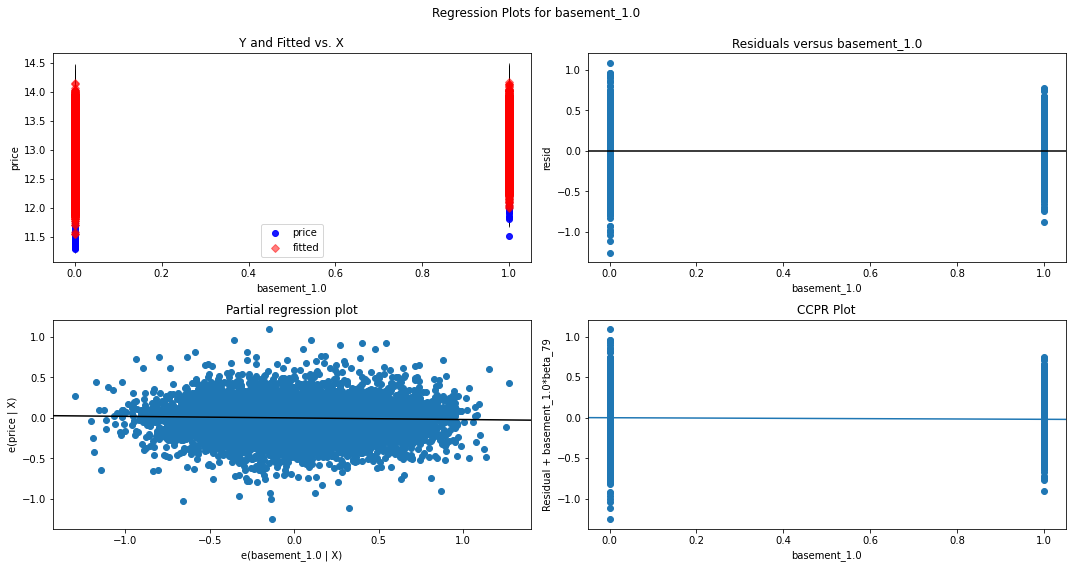

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "basement_1.0", fig=fig)
plt.show()

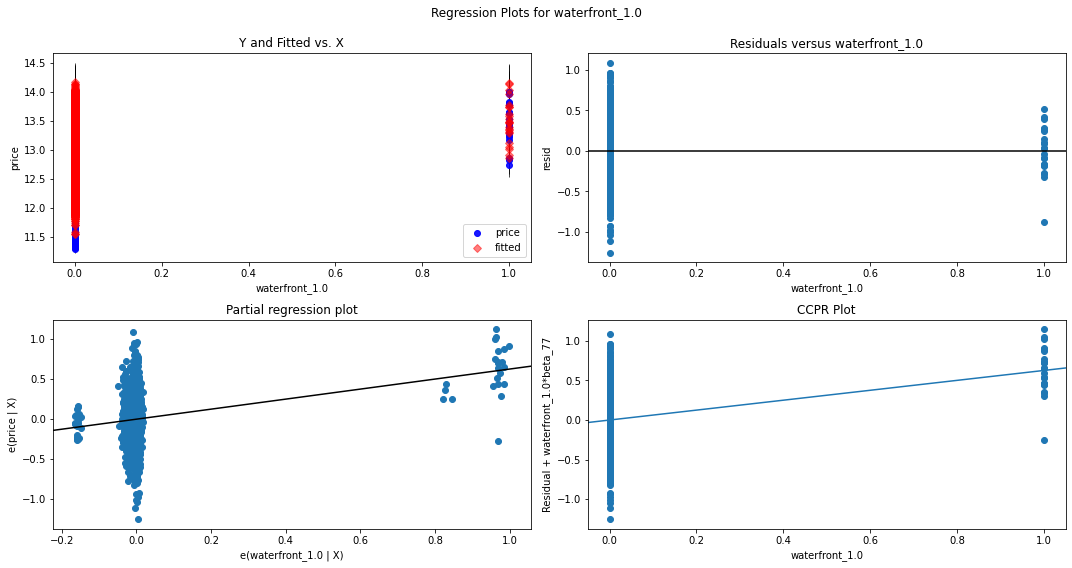

In [95]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "waterfront_1.0", fig=fig)
plt.show()

### Find/Add Interactions

I wrote a function which finds all of the feature combinations possible in our dataset. Then for each combination, the function runs a linear regression with cross validation on 5 folds and gets the r^2 score for the regression including that feature combination. All scores are recorded and r^2 score improvement is assessed, with the resulting table giving the increase in model improvement from a feature combo. 

In [96]:
def test_feature_combinations(price, variables):
    
    """Function takes in target price and a dataframe of independent variables, and 
    tests model improvement for each combination of variables"""
    
    # select our estimator and our cross validation plan
    regression = LinearRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    
    # prepare our scoring dataframe
    scoring_df = pd.DataFrame()
    
    # prepare our lists to store our features and scores as we iterate
    scores = []
    feature1 = []
    feature2 = []
    
    # Get a list of all of our features, and remove our target variable 'price' from the list
    features = list(variables.columns)

    # make a list of all of our possible feature combinations
    feature_combos = itertools.combinations(features, 2)
    feature_combos = list(feature_combos)
    
    # set our y-value as our target variable
    y = price
    
    # prepare our x-value with our independent variables. We do an initial split here in order to run a 
    # linear regression to get a base r^2 on our basic model without interactions
    X = variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)
    base_score = round(np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv)), 4)   
    print("Model base score is ",base_score)
    
    # now we run the regression on each feature combo
    for feature in feature_combos:
        feat1, feat2 = feature[0], feature[1]
        
        # create the test interaction on our data set
        variables['test_interaction'] = variables[feat1] * variables[feat2]
        # create a new X which includes the test interaction and drops our target value
        X = variables
        # make a new split so that our x-splits include the test interaction
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)
        
        # Run a linear regression with cross-val just like our base model, and append the score to our scores list
        new_score = round(np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv)), 4)
        scores.append(new_score)
        # put feature 1 on a list
        feature1.append(feat1)
        # put feature 2 on a list
        feature2.append(feat2)
        print(feat1, feat2, new_score)
    
    # load all of our lists into the scoring dataframe
    scoring_df['feature1'] = feature1
    scoring_df['feature2'] = feature2
    scoring_df['scores'] = scores
    scoring_df['improvement'] = scoring_df['scores'] - base_score
    
    # return our scoring dataframe to the function
    return scoring_df

In [97]:
# running our function on our continuous variables to look for improvement
# our R2 is much lower for model base score because we aren't including our categorical variables in this improvement assessment

scoring_df = test_feature_combinations(df_target_log, df_continuous_standardized)

Model base score is  0.4693
sqft_living sqft_lot 0.4694
sqft_living floors 0.4729
sqft_living bedrooms 0.4746
sqft_living bathrooms 0.4766
sqft_living condition 0.4708
sqft_living grade 0.4769
sqft_lot floors 0.474
sqft_lot bedrooms 0.4698
sqft_lot bathrooms 0.4735
sqft_lot condition 0.4727
sqft_lot grade 0.4715
floors bedrooms 0.4738
floors bathrooms 0.4693
floors condition 0.476
floors grade 0.4706
bedrooms bathrooms 0.4746
bedrooms condition 0.4696
bedrooms grade 0.4756
bathrooms condition 0.4729
bathrooms grade 0.4737
condition grade 0.4709


In [98]:
# showing our improvement scores for our interactions

scoring_df.sort_values('improvement', ascending=False)

feature1   feature2  scores  improvement
5   sqft_living      grade  0.4769       0.0076
3   sqft_living  bathrooms  0.4766       0.0073
13       floors  condition  0.4760       0.0067
17     bedrooms      grade  0.4756       0.0063
15     bedrooms  bathrooms  0.4746       0.0053
2   sqft_living   bedrooms  0.4746       0.0053
6      sqft_lot     floors  0.4740       0.0047
11       floors   bedrooms  0.4738       0.0045
19    bathrooms      grade  0.4737       0.0044
8      sqft_lot  bathrooms  0.4735       0.0042
18    bathrooms  condition  0.4729       0.0036
1   sqft_living     floors  0.4729       0.0036
9      sqft_lot  condition  0.4727       0.0034
10     sqft_lot      grade  0.4715       0.0022
20    condition      grade  0.4709       0.0016
4   sqft_living  condition  0.4708       0.0015
14       floors      grade  0.4706       0.0013
7      sqft_lot   bedrooms  0.4698       0.0005
16     bedrooms  condition  0.4696       0.0003
0   sqft_living   sqft_lot  0.4694       0.0001
12       floors  bathrooms  0.4693       0.0000

We won't add any interactions. None of these improvements were significant enough.

## Linear Regression - Feature Selectors

### Forward-Backward Selector

First we'll try a simple forward-backward feature selection model based on p-value, using a statsmodel OLS linear regression model.

This model gives us a list of the important features based on their p-value.

This model takes quite some time to run, so is commented out with the results replicated in markdown following.

In [99]:
'''
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(X_train_val, y_train_val, verbose=True)

print('resulting features:', result)
'''

result = ['sqft_living', 'grade', 'lat_block_(47.452, 47.474]', 'lat_block_(47.474, 47.489]', 'lat_block_(47.489, 47.5]', 'condition', 'zipcode_98004', 'zipcode_98106', 'year_block_(1914.0, 1925.0]', 'year_block_(1925.0, 1939.0]', 'lat_block_(47.654, 47.665]', 'lat_block_(47.632, 47.642]', 'lat_block_(47.674, 47.68]', 'lat_block_(47.665, 47.674]', 'lat_block_(47.642, 47.654]', 'lat_block_(47.68, 47.686]', 'zipcode_98040', 'waterfront_1.0', 'lat_block_(47.312, 47.332]', 'lat_block_(47.287, 47.312]', 'zipcode_98112', 'lat_block_(47.686, 47.692]', 'zipcode_98122', 'zipcode_98116', 'zipcode_98108', 'month_4', 'zipcode_98133', 'zipcode_98168', 'zipcode_98019', 'zipcode_98014', 'sqft_lot', 'year_block_(2011.0, 2015.0]', 'zipcode_98166', 'zipcode_98136', 'zipcode_98119', 'zipcode_98102', 'zipcode_98109', 'lat_block_(47.692, 47.698]', 'lat_block_(47.698, 47.707]', 'comparative_sf_3', 'zipcode_98006', 'zipcode_98144', 'zipcode_98005', 'lat_block_(47.62, 47.632]', 'zipcode_98059', 'renovated_1.0', 'lat_block_(47.707, 47.717]', 'zipcode_98029', 'lat_block_(47.606, 47.62]', 'zipcode_98027', 'zipcode_98126', 'zipcode_98039', 'lat_block_(47.717, 47.727]', 'lat_block_(47.592, 47.606]', 'lat_block_(47.581, 47.592]', 'zipcode_98074', 'lat_block_(47.554, 47.563]', 'lat_block_(47.563, 47.57]', 'lat_block_(47.57, 47.581]', 'bedrooms', 'lat_block_(47.727, 47.736]', 'month_3', 'zipcode_98038', 'lat_block_(47.547, 47.554]', 'zipcode_98177', 'lat_block_(47.539, 47.547]', 'year_block_(1939.0, 1945.0]', 'basement_1.0', 'lat_block_(47.736, 47.747]', 'lat_block_(47.532, 47.539]', 'lat_block_(47.747, 47.764]', 'lat_block_(47.764, 47.778]', 'lat_block_(47.523, 47.532]', 'lat_block_(47.512, 47.523]', 'lat_block_(47.5, 47.512]', 'zipcode_98045', 'zipcode_98070', 'zipcode_98010', 'lat_block_(47.432, 47.452]', 'lat_block_(47.397, 47.432]', 'bathrooms', 'zipcode_98199', 'zipcode_98103', 'zipcode_98105', 'zipcode_98117', 'zipcode_98115', 'zipcode_98107', 'zipcode_98033', 'year_block_(2007.0, 2011.0]', 'year_block_(2002.0, 2005.0]', 'year_block_(1997.0, 2002.0]', 'year_block_(2005.0, 2007.0]', 'comparative_lot_3', 'zipcode_98024', 'year_block_(1959.0, 1963.0]', 'month_5', 'year_block_(1977.0, 1981.0]', 'year_block_(1963.0, 1967.0]', 'year_block_(1954.0, 1959.0]', 'year_block_(1972.0, 1977.0]', 'year_block_(1967.0, 1972.0]', 'zipcode_98178', 'month_2', 'zipcode_98188', 'zipcode_98075', 'zipcode_98198', 'lat_block_(47.332, 47.351]', 'floors', 'zipcode_98042']

Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  zipcode_98023                  with p-value 3.2049e-185
Add  lat_block_(47.376, 47.397]     with p-value 2.99701e-137
Add  lat_block_(47.364, 47.376]     with p-value 2.15026e-142
Add  lat_block_(47.332, 47.351]     with p-value 4.17638e-141
Add  lat_block_(47.351, 47.364]     with p-value 1.29125e-149
Add  lat_block_(47.397, 47.432]     with p-value 1.96213e-142
Add  zipcode_98092                  with p-value 1.34972e-126
Add  lat_block_(47.432, 47.452]     with p-value 2.70853e-123
Add  lat_block_(47.452, 47.474]     with p-value 4.64337e-125
Add  lat_block_(47.474, 47.489]     with p-value 1.6337e-118
Add  lat_block_(47.489, 47.5]       with p-value 1.4555e-124
Add  zipcode_98002                  with p-value 1.30332e-117
Add  lat_block_(47.5, 47.512]       with p-value 9.21194e-124
Add  zipcode_98003                  with p-value 4.25485e-125
Add  condition                      with p-value 2.51467e-122
Add  zipcode_98022                  with p-value 1.01321e-133
Add  zipcode_98004                  with p-value 2.4218e-102
Add  zipcode_98106                  with p-value 1.17924e-78
Add  year_block_(1914.0, 1925.0]    with p-value 7.57843e-81
Add  year_block_(1925.0, 1939.0]    with p-value 7.59823e-70
Add  lat_block_(47.654, 47.665]     with p-value 8.13991e-63
Add  lat_block_(47.632, 47.642]     with p-value 2.13063e-60
Add  lat_block_(47.674, 47.68]      with p-value 3.16602e-66
Add  lat_block_(47.665, 47.674]     with p-value 2.93075e-65
Add  lat_block_(47.642, 47.654]     with p-value 7.25673e-73
Add  lat_block_(47.68, 47.686]      with p-value 5.1953e-74
Add  zipcode_98040                  with p-value 1.16168e-69
Add  waterfront_1.0                 with p-value 1.10992e-50
Add  lat_block_(47.312, 47.332]     with p-value 4.55596e-51
Add  lat_block_(47.287, 47.312]     with p-value 2.22468e-103
Add  zipcode_98112                  with p-value 1.04823e-47
Add  lat_block_(47.686, 47.692]     with p-value 1.67351e-48
Add  zipcode_98122                  with p-value 3.45553e-51
Add  zipcode_98116                  with p-value 2.86718e-55
Add  lat_block_(47.512, 47.523]     with p-value 1.6273e-34
Add  zipcode_98108                  with p-value 1.01916e-34
Add  month_4                        with p-value 1.82463e-32
Add  zipcode_98133                  with p-value 1.75958e-28
Add  zipcode_98155                  with p-value 2.23329e-28
Add  zipcode_98168                  with p-value 2.38299e-28
Add  zipcode_98019                  with p-value 3.95074e-28
Add  zipcode_98028                  with p-value 3.52882e-26
Add  zipcode_98118                  with p-value 1.89657e-27
Add  zipcode_98014                  with p-value 7.64195e-26
Add  sqft_lot                       with p-value 6.27091e-26
Add  year_block_(2011.0, 2015.0]    with p-value 3.30098e-24
Add  zipcode_98166                  with p-value 4.47658e-22
Add  zipcode_98136                  with p-value 7.28166e-22
Add  zipcode_98119                  with p-value 3.39709e-22
Add  zipcode_98102                  with p-value 4.62704e-26
Add  zipcode_98109                  with p-value 3.56281e-28
Add  lat_block_(47.692, 47.698]     with p-value 9.84386e-25
Add  lat_block_(47.698, 47.707]     with p-value 1.32403e-24
Add  zipcode_98052                  with p-value 8.45549e-24
Add  comparative_sf_3               with p-value 5.45992e-22
Add  zipcode_98006                  with p-value 1.15439e-19
Add  zipcode_98144                  with p-value 4.53746e-21
Add  zipcode_98005                  with p-value 2.5382e-21
Add  lat_block_(47.62, 47.632]      with p-value 1.76761e-19
Add  zipcode_98059                  with p-value 3.88859e-18
Add  renovated_1.0                  with p-value 4.8929e-18
Add  lat_block_(47.707, 47.717]     with p-value 2.14474e-17
Add  zipcode_98029                  with p-value 1.92441e-18
Add  lat_block_(47.606, 47.62]      with p-value 6.34772e-19
Drop zipcode_98118                  with p-value 0.138967
Add  zipcode_98027                  with p-value 3.33003e-20
Add  zipcode_98075                  with p-value 1.9001e-23
Add  zipcode_98126                  with p-value 1.34958e-18
Add  zipcode_98039                  with p-value 6.33781e-17
Add  lat_block_(47.717, 47.727]     with p-value 8.16498e-16
Add  lat_block_(47.592, 47.606]     with p-value 8.95502e-17
Add  lat_block_(47.581, 47.592]     with p-value 8.39794e-23
Add  zipcode_98074                  with p-value 3.33954e-24
Add  lat_block_(47.554, 47.563]     with p-value 4.87159e-18
Drop zipcode_98155                  with p-value 0.0993951
Add  lat_block_(47.563, 47.57]      with p-value 3.62204e-18
Drop zipcode_98028                  with p-value 0.116832
Add  lat_block_(47.57, 47.581]      with p-value 2.58852e-19
Drop zipcode_98075                  with p-value 0.943702
Add  bedrooms                       with p-value 3.24379e-17
Add  lat_block_(47.727, 47.736]     with p-value 4.55674e-17
Add  month_3                        with p-value 1.94387e-17
Add  zipcode_98038                  with p-value 9.31725e-17
Add  lat_block_(47.547, 47.554]     with p-value 4.09645e-16
Add  zipcode_98177                  with p-value 3.11334e-12
Add  lat_block_(47.539, 47.547]     with p-value 5.25864e-12
Add  year_block_(1939.0, 1945.0]    with p-value 4.27333e-12
Add  basement_1.0                   with p-value 1.66411e-11
Add  lat_block_(47.736, 47.747]     with p-value 3.52088e-11
Add  lat_block_(47.532, 47.539]     with p-value 4.69639e-15
Drop lat_block_(47.512, 47.523]     with p-value 0.494763
Add  lat_block_(47.747, 47.764]     with p-value 2.77231e-15
Add  lat_block_(47.764, 47.778]     with p-value 2.12126e-27
Add  lat_block_(47.523, 47.532]     with p-value 1.21615e-44
Drop lat_block_(47.5, 47.512]       with p-value 0.401966
Add  lat_block_(47.512, 47.523]     with p-value 1.64034e-66
Drop lat_block_(47.432, 47.452]     with p-value 0.785708
Add  lat_block_(47.5, 47.512]       with p-value 1.12516e-26
Drop lat_block_(47.397, 47.432]     with p-value 0.757546
Add  zipcode_98045                  with p-value 2.41007e-13
Drop lat_block_(47.332, 47.351]     with p-value 0.100413
Add  zipcode_98070                  with p-value 8.27183e-11
Add  zipcode_98010                  with p-value 4.52119e-11
Add  lat_block_(47.432, 47.452]     with p-value 3.0279e-12
Drop lat_block_(47.351, 47.364]     with p-value 0.0694768
Add  lat_block_(47.397, 47.432]     with p-value 9.40899e-12
Drop zipcode_98003                  with p-value 0.992002
Add  bathrooms                      with p-value 4.84787e-11
Drop lat_block_(47.376, 47.397]     with p-value 0.960847
Add  zipcode_98199                  with p-value 9.6487e-09
Drop lat_block_(47.364, 47.376]     with p-value 0.602073
Add  zipcode_98103                  with p-value 8.87439e-10
Drop zipcode_98023                  with p-value 0.403337
Add  zipcode_98105                  with p-value 3.09643e-09
Drop zipcode_98022                  with p-value 0.387906
Add  zipcode_98117                  with p-value 1.1208e-08
Drop zipcode_98002                  with p-value 0.317262
Add  zipcode_98115                  with p-value 4.75409e-20
Drop zipcode_98092                  with p-value 0.192669
Add  zipcode_98107                  with p-value 4.17604e-19
Add  zipcode_98033                  with p-value 1.48225e-17
Drop zipcode_98052                  with p-value 0.391751
Add  year_block_(2007.0, 2011.0]    with p-value 1.55865e-10
Add  year_block_(2002.0, 2005.0]    with p-value 4.74427e-09
Add  year_block_(1997.0, 2002.0]    with p-value 1.34289e-09
Add  year_block_(2005.0, 2007.0]    with p-value 8.92903e-11
Add  comparative_lot_3              with p-value 1.61455e-07
Add  zipcode_98024                  with p-value 2.88635e-06
Add  year_block_(1959.0, 1963.0]    with p-value 2.99423e-06
Add  month_5                        with p-value 8.81047e-06
Add  year_block_(1977.0, 1981.0]    with p-value 2.70447e-05
Add  year_block_(1963.0, 1967.0]    with p-value 6.12218e-06
Add  year_block_(1954.0, 1959.0]    with p-value 3.61686e-06
Add  year_block_(1972.0, 1977.0]    with p-value 7.09669e-08
Add  year_block_(1967.0, 1972.0]    with p-value 5.57376e-10
Add  zipcode_98178                  with p-value 3.34058e-05
Add  month_2                        with p-value 4.28942e-05
Add  zipcode_98188                  with p-value 6.52307e-05
Add  zipcode_98075                  with p-value 0.000142499
Add  zipcode_98198                  with p-value 0.000305708
Add  lat_block_(47.332, 47.351]     with p-value 0.00350399
Add  floors                         with p-value 0.0068305
Add  zipcode_98042                  with p-value 0.00883729
resulting features: ['sqft_living', 'grade', 'lat_block_(47.452, 47.474]', 'lat_block_(47.474, 47.489]', 'lat_block_(47.489, 47.5]', 'condition', 'zipcode_98004', 'zipcode_98106', 'year_block_(1914.0, 1925.0]', 'year_block_(1925.0, 1939.0]', 'lat_block_(47.654, 47.665]', 'lat_block_(47.632, 47.642]', 'lat_block_(47.674, 47.68]', 'lat_block_(47.665, 47.674]', 'lat_block_(47.642, 47.654]', 'lat_block_(47.68, 47.686]', 'zipcode_98040', 'waterfront_1.0', 'lat_block_(47.312, 47.332]', 'lat_block_(47.287, 47.312]', 'zipcode_98112', 'lat_block_(47.686, 47.692]', 'zipcode_98122', 'zipcode_98116', 'zipcode_98108', 'month_4', 'zipcode_98133', 'zipcode_98168', 'zipcode_98019', 'zipcode_98014', 'sqft_lot', 'year_block_(2011.0, 2015.0]', 'zipcode_98166', 'zipcode_98136', 'zipcode_98119', 'zipcode_98102', 'zipcode_98109', 'lat_block_(47.692, 47.698]', 'lat_block_(47.698, 47.707]', 'comparative_sf_3', 'zipcode_98006', 'zipcode_98144', 'zipcode_98005', 'lat_block_(47.62, 47.632]', 'zipcode_98059', 'renovated_1.0', 'lat_block_(47.707, 47.717]', 'zipcode_98029', 'lat_block_(47.606, 47.62]', 'zipcode_98027', 'zipcode_98126', 'zipcode_98039', 'lat_block_(47.717, 47.727]', 'lat_block_(47.592, 47.606]', 'lat_block_(47.581, 47.592]', 'zipcode_98074', 'lat_block_(47.554, 47.563]', 'lat_block_(47.563, 47.57]', 'lat_block_(47.57, 47.581]', 'bedrooms', 'lat_block_(47.727, 47.736]', 'month_3', 'zipcode_98038', 'lat_block_(47.547, 47.554]', 'zipcode_98177', 'lat_block_(47.539, 47.547]', 'year_block_(1939.0, 1945.0]', 'basement_1.0', 'lat_block_(47.736, 47.747]', 'lat_block_(47.532, 47.539]', 'lat_block_(47.747, 47.764]', 'lat_block_(47.764, 47.778]', 'lat_block_(47.523, 47.532]', 'lat_block_(47.512, 47.523]', 'lat_block_(47.5, 47.512]', 'zipcode_98045', 'zipcode_98070', 'zipcode_98010', 'lat_block_(47.432, 47.452]', 'lat_block_(47.397, 47.432]', 'bathrooms', 'zipcode_98199', 'zipcode_98103', 'zipcode_98105', 'zipcode_98117', 'zipcode_98115', 'zipcode_98107', 'zipcode_98033', 'year_block_(2007.0, 2011.0]', 'year_block_(2002.0, 2005.0]', 'year_block_(1997.0, 2002.0]', 'year_block_(2005.0, 2007.0]', 'comparative_lot_3', 'zipcode_98024', 'year_block_(1959.0, 1963.0]', 'month_5', 'year_block_(1977.0, 1981.0]', 'year_block_(1963.0, 1967.0]', 'year_block_(1954.0, 1959.0]', 'year_block_(1972.0, 1977.0]', 'year_block_(1967.0, 1972.0]', 'zipcode_98178', 'month_2', 'zipcode_98188', 'zipcode_98075', 'zipcode_98198', 'lat_block_(47.332, 47.351]', 'floors', 'zipcode_98042']

In [100]:
# Run our linear regression again, using only the features recommended by our feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

predictors_int = sm.add_constant(X_train_refined)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     874.1
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:37:21   Log-Likelihood:                 5709.3
No. Observations:               14784   AIC:                        -1.120e+04
Df Residuals:                   14674   BIC:                        -1.036e+04
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.4782      0.006   1977.180      0.000      12.466      12.491
sqft_living                     0.1834      0.003     57.558      0.000       0.177       0.190
grade                           0.0887      0.002     39.264      0.000       0.084       0.093
lat_block_(47.452, 47.474]      0.1431      0.011     12.689      0.000       0.121       0.165
lat_block_(47.474, 47.489]      0.1709      0.012     14.402      0.000       0.148       0.194
lat_block_(47.489, 47.5]        0.2136      0.012     18.039      0.000       0.190       0.237
condition                       0.0367      0.002     24.191      0.000       0.034       0.040
zipcode_98004                   0.3837      0.016     23.937      0.000       0.352       0.415
zipcode_98106                  -0.1011      0.012     -8.560      0.000      -0.124      -0.078
year_block_(1914.0, 1925.0]     0.0490      0.007      7.167      0.000       0.036       0.062
year_block_(1925.0, 1939.0]     0.0488      0.007      7.037      0.000       0.035       0.062
lat_block_(47.654, 47.665]      0.7284      0.012     58.712      0.000       0.704       0.753
lat_block_(47.632, 47.642]      0.7104      0.013     55.918      0.000       0.686       0.735
lat_block_(47.674, 47.68]       0.7105      0.013     56.538      0.000       0.686       0.735
lat_block_(47.665, 47.674]      0.6993      0.014     49.668      0.000       0.672       0.727
lat_block_(47.642, 47.654]      0.6928      0.014     51.040      0.000       0.666       0.719
lat_block_(47.68, 47.686]       0.6924      0.013     55.110      0.000       0.668       0.717
zipcode_98040                   0.3374      0.016     20.997      0.000       0.306       0.369
waterfront_1.0                  0.6346      0.035     17.972      0.000       0.565       0.704
lat_block_(47.312, 47.332]     -0.0229      0.010     -2.191      0.028      -0.043      -0.002
lat_block_(47.287, 47.312]     -0.0383      0.010     -3.759      0.000      -0.058      -0.018
zipcode_98112                   0.3291      0.016     20.014      0.000       0.297       0.361
lat_block_(47.686, 47.692]      0.6170      0.012     49.660      0.000       0.593       0.641
zipcode_98122                   0.1911      0.015     12.689      0.000       0.162       0.221
zipcode_98116                   0.2168      0.013     16.092      0.000       0.190       0.243
zipcode_98108                  -0.1576      0.015    -10.507      0.000      -0.187      -0.128
month_4                         0.0806      0.005     17.628      0.000       0.072       0.090
zipcode_98133                  -0.0322      0.009     -3.393      0.001      -0.051      -0.014
zipcode_98168                  -0.1508      0.014    -11.082      0.000      -0.177      -0.124
zipcode_980

In [101]:
print("{} predictors used".format(len(result)))

109 predictors used


In [102]:
model = LinearRegression()
model.fit(X_train_refined, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=cv)
r2 = cv_5.mean()
r2

0.8639561503040036

In [103]:
# apply our model to our test set and get predicted values
test_predictions_refined = model.predict(X_test_refined)

# reverse log transform our predicted values
test_predictions_refined_unscaled = np.exp(test_predictions_refined)
test_predictions_refined_unscaled

predicted_prices_forwardstep = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": test_predictions_refined_unscaled.astype(int)})
predicted_prices_forwardstep

Actual  Predicted
3652   402500     361693
9425   339499     296736
1157   282000     350729
17936  757499     927135
6228   445499     473186
...       ...        ...
15940  324999     308129
10782  686500     695426
17047  399440     352969
1092   269999     264266
10911  144999     335518

[3697 rows x 2 columns]

In [104]:
mae = round(mean_absolute_error(test_actual, test_predictions_refined_unscaled), 2)
mae

54272.33

In [105]:
rmse = round(np.sqrt(mean_squared_error(test_actual, test_predictions_refined_unscaled)), 2)
rmse

80392.88

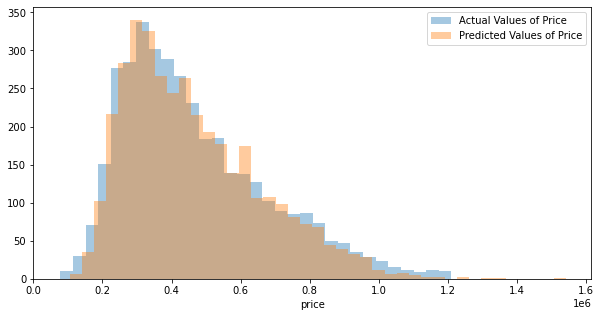

In [106]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(test_predictions_refined_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [107]:
models['Models'].append('Forw-Back Selector')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Permutation Importance

Next we will study feature selection via permutation importance, using a sklearn LinearRegression model and the library eli5. For permutation importance, each column is individually scrambled, and the resulting error informs the feature weight. If the scramble causes high error in the results, the feature is considered important. If the scramble causes low error, the feature is considered unimportant.

This model gives us a list of important features based on how much error scrambling their columns produces.

In [108]:
import eli5
from eli5.sklearn import PermutationImportance

regressor = LinearRegression()
regressor.fit(X_train_val, y_train_val)

perm = PermutationImportance(regressor, random_state=1).fit(X_train_val, y_train_val)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [109]:
# sorted list of relative feature importance via permutation importance - bottom 30 features

eli = pd.DataFrame(zip(X.columns.tolist(), perm.feature_importances_))
eli.sort_values(1, ascending=False, inplace=True)
eli.reset_index(inplace=True)
eli.drop('index', axis=1, inplace=True)
eli.tail(30)


0             1
120   lat_block_(47.364, 47.376]  3.871150e-04
121                zipcode_98003  3.727574e-04
122   lat_block_(47.452, 47.474]  3.653708e-04
123                zipcode_98023  2.987991e-04
124                zipcode_98022  2.583172e-04
125                     month_10  1.946099e-04
126                      month_5  1.908618e-04
127  year_block_(1939.0, 1945.0]  1.891298e-04
128                      month_2  1.702090e-04
129                zipcode_98030  1.700533e-04
130  year_block_(1914.0, 1925.0]  1.442410e-04
131                      month_8  1.286948e-04
132                zipcode_98168  1.285224e-04
133                      month_9  9.735579e-05
134                zipcode_98019  8.050096e-05
135  year_block_(1925.0, 1939.0]  6.423591e-05
136                      month_7  6.336240e-05
137                zipcode_98092  5.701033e-05
138   lat_block_(47.312, 47.332]  4.297440e-05
139                zipcode_98002  4.123375e-05
140  year_block_(2002.0, 2005.0]  3.353363e-05
141                     month_11  3.191560e-05
142                zipcode_98108  1.130562e-05
143  year_block_(2005.0, 2007.0]  8.490759e-06
144                zipcode_98024  6.386884e-06
145                     month_12  5.897890e-06
146                zipcode_98032  2.593667e-06
147  year_block_(1997.0, 2002.0]  1.226954e-06
148   lat_block_(47.287, 47.312] -7.019612e-07
149                      month_6 -1.262014e-06

One thing that permutation importance does NOT do is help us pick how many features we should use. So we will just use 109, like our forward-backward selector.

In [110]:
result_eli5 = list(eli[:109][0])

In [111]:
# Run our linear regression again, using the features recommended by our feature selector

X_eli5 = X_train_val[result_eli5]

predictors_int = sm.add_constant(X_eli5)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     867.7
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:37:26   Log-Likelihood:                 5661.7
No. Observations:               14784   AIC:                        -1.110e+04
Df Residuals:                   14674   BIC:                        -1.027e+04
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.5232      0.005   2680.051      0.000      12.514      12.532
sqft_living                     0.1816      0.003     57.748      0.000       0.175       0.188
lat_block_(47.654, 47.665]      0.5034      0.017     29.108      0.000       0.469       0.537
lat_block_(47.632, 47.642]      0.4960      0.017     28.698      0.000       0.462       0.530
grade                           0.0910      0.002     40.936      0.000       0.087       0.095
lat_block_(47.674, 47.68]       0.4836      0.018     27.204      0.000       0.449       0.518
lat_block_(47.606, 47.62]       0.4858      0.019     26.226      0.000       0.449       0.522
lat_block_(47.642, 47.654]      0.4692      0.017     27.396      0.000       0.436       0.503
lat_block_(47.62, 47.632]       0.4757      0.018     26.720      0.000       0.441       0.511
lat_block_(47.665, 47.674]      0.4729      0.019     25.179      0.000       0.436       0.510
lat_block_(47.68, 47.686]       0.4681      0.018     26.229      0.000       0.433       0.503
lat_block_(47.581, 47.592]      0.4545      0.016     27.920      0.000       0.423       0.486
lat_block_(47.592, 47.606]      0.4500      0.017     25.998      0.000       0.416       0.484
sqft_lot                        0.0715      0.002     34.037      0.000       0.067       0.076
lat_block_(47.554, 47.563]      0.4337      0.013     33.682      0.000       0.408       0.459
lat_block_(47.563, 47.57]       0.4298      0.013     33.337      0.000       0.404       0.455
zipcode_98103                   0.4220      0.017     25.190      0.000       0.389       0.455
lat_block_(47.686, 47.692]      0.3926      0.018     22.416      0.000       0.358       0.427
lat_block_(47.57, 47.581]       0.4084      0.015     27.668      0.000       0.379       0.437
zipcode_98115                   0.4043      0.017     23.483      0.000       0.371       0.438
zipcode_98117                   0.4084      0.017     23.468      0.000       0.374       0.442
lat_block_(47.698, 47.707]      0.3701      0.016     22.667      0.000       0.338       0.402
lat_block_(47.707, 47.717]      0.3748      0.017     22.396      0.000       0.342       0.408
lat_block_(47.547, 47.554]      0.3678      0.013     27.844      0.000       0.342       0.394
lat_block_(47.692, 47.698]      0.3296      0.017     18.901      0.000       0.295       0.364
lat_block_(47.539, 47.547]      0.3209      0.013     24.599      0.000       0.295       0.346
lat_block_(47.717, 47.727]      0.3184      0.017     19.204      0.000       0.286       0.351
zipcode_98004                   0.5933      0.020     29.118      0.000       0.553       0.633
lat_block_(47.532, 47.539]      0.2956      0.013     22.287      0.000       0.270       0.322
lat_block_(

In [112]:
model = LinearRegression()
model.fit(X_eli5, y_train_val)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_eli5, y_train_val, cv=cv)
r2 = cv_5.mean()
r2

0.8631291914582452

In [113]:
X_test_eli5 = X_test[result_eli5]

eli5_predictions = model.predict(X_test_eli5)

eli5_predictions_unscaled = np.exp(eli5_predictions)
eli5_predictions_unscaled

predicted_prices_eli5 = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": eli5_predictions_unscaled.astype(int)})
predicted_prices_eli5

Actual  Predicted
3652   402500     354030
9425   339499     296343
1157   282000     357407
17936  757499     896109
6228   445499     494966
...       ...        ...
15940  324999     312293
10782  686500     666051
17047  399440     362325
1092   269999     258567
10911  144999     334175

[3697 rows x 2 columns]

In [114]:
mae = round(mean_absolute_error(test_actual, eli5_predictions_unscaled), 2)
mae

54653.41

In [115]:
rmse = round(np.sqrt(mean_squared_error(test_actual, eli5_predictions_unscaled)), 2)
rmse

80581.27

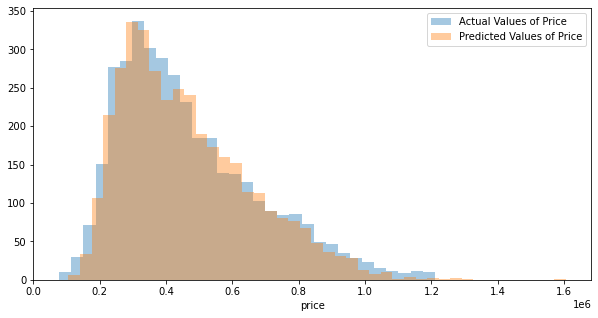

In [116]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(eli5_predictions_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

This also did not improve on our basic linear regression using all features.

In [117]:
models['Models'].append('Permutation Importance')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Recursive Feature Elimination with Cross Validation - Linear Regression

RFECV uses the model's scores to determine how many and which features should be included in the model. It also has integrated cross-validation, so it's a great one-step tool. RFECV is not a model itself! It takes an estimator as a parameter to use in its testing.

In [118]:
# Using sklearn RFECV to perform integrated CV while picking the number of features
# picks the number of features itself

model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_root_mean_squared_error')

rfecv.fit(X_train_val, y_train_val)

RFECV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
      estimator=LinearRegression(), scoring='neg_root_mean_squared_error')

In [119]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 147


In [120]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['used'] = rfecv.support_

# The fearures that RFECV did not use
dset[dset['used']==False]

attr   used
85                       month_6  False
106  year_block_(1997.0, 2002.0]  False
111   lat_block_(47.287, 47.312]  False

In [121]:
# make a list of the features used in the rfecv
rfecv_result = list(dset[(dset['used'] == True)]['attr'])

In [122]:
# Run our linear regression again in statsmodels, using the features recommended by our feature selector

X_train_rfecv = X_train_val[rfecv_result]
X_test_rfecv = X_test[rfecv_result]

predictors_int = sm.add_constant(X_train_rfecv)
model = sm.OLS(y_train_val, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     655.7
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:37:48   Log-Likelihood:                 5800.4
No. Observations:               14784   AIC:                        -1.130e+04
Df Residuals:                   14636   BIC:                        -1.018e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          12.4706      0.013    943.922      0.000      12.445      12.496
sqft_living                     0.1811      0.003     55.946      0.000       0.175       0.187
sqft_lot                        0.0782      0.003     29.370      0.000       0.073       0.083
floors                         -0.0065      0.002     -2.658      0.008      -0.011      -0.002
bedrooms                       -0.0118      0.002     -6.154      0.000      -0.016      -0.008
bathrooms                       0.0170      0.002      6.962      0.000       0.012       0.022
condition                       0.0355      0.002     23.179      0.000       0.033       0.039
grade                           0.0903      0.002     39.161      0.000       0.086       0.095
zipcode_98002                   0.0175      0.017      1.041      0.298      -0.015       0.050
zipcode_98003                   0.0516      0.015      3.337      0.001       0.021       0.082
zipcode_98004                   0.5869      0.041     14.306      0.000       0.506       0.667
zipcode_98005                   0.3068      0.042      7.372      0.000       0.225       0.388
zipcode_98006                   0.2804      0.036      7.833      0.000       0.210       0.351
zipcode_98007                   0.1942      0.042      4.658      0.000       0.112       0.276
zipcode_98008                   0.2082      0.040      5.183      0.000       0.129       0.287
zipcode_98010                   0.2174      0.027      8.056      0.000       0.165       0.270
zipcode_98011                   0.2249      0.047      4.759      0.000       0.132       0.317
zipcode_98014                  -0.1222      0.050     -2.444      0.015      -0.220      -0.024
zipcode_98019                   0.0301      0.047      0.637      0.524      -0.063       0.123
zipcode_98022                   0.0571      0.019      2.931      0.003       0.019       0.095
zipcode_98023                   0.0349      0.014      2.475      0.013       0.007       0.063
zipcode_98024                  -0.0126      0.051     -0.249      0.803      -0.112       0.087
zipcode_98027                   0.3188      0.036      8.904      0.000       0.249       0.389
zipcode_98028                   0.1764      0.047      3.792      0.000       0.085       0.268
zipcode_98029                   0.2483      0.036      6.867      0.000       0.177       0.319
zipcode_98030                   0.0329      0.020      1.621      0.105      -0.007       0.073
zipcode_98031                   0.0672      0.024      2.836      0.005       0.021       0.114
zipcode_98032                  -0.0052      0.024     -0.213      0.831      -0.053       0.043
zipcode_98033                   0.3377      0.043      7.777      0.000       0.253       0.423
zipcode_980

In [123]:
# getting the r2 score of our best feature set
r2 = model.rsquared
r2

0.8681794248956338

RFECV still includes features with a p-value over .05. Overall though, accuracy is just about the same as the other feature selection methods that we have tried.

We can plot the change in our R^2 score as we add features to the model. We can see that around 110 features, there isn't a lot of improvement to the model.

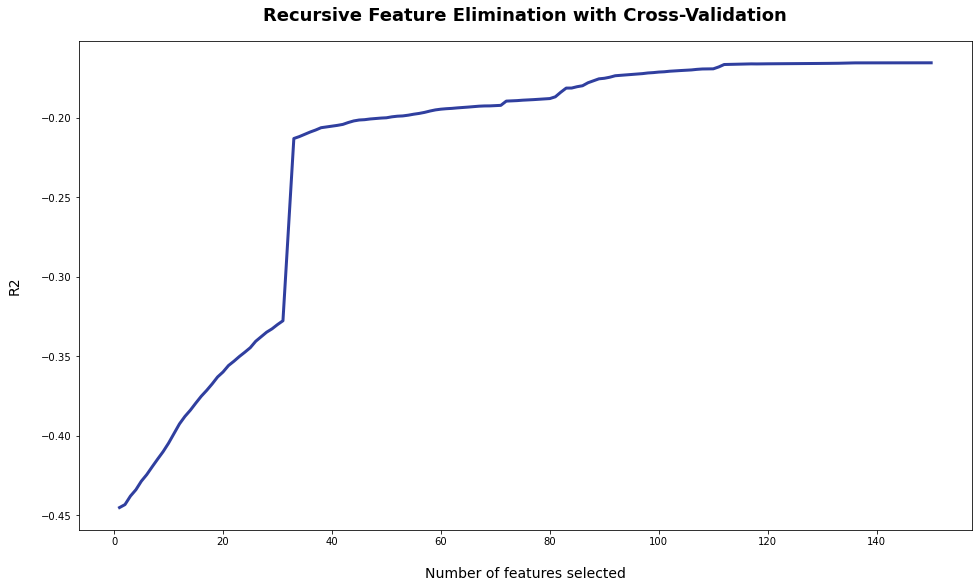

In [124]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('R2', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [125]:
rfecv_predictions = rfecv.predict(X_test)

rfecv_predictions_unscaled = np.exp(rfecv_predictions)
rfecv_predictions_unscaled

predicted_prices_rfecv = pd.DataFrame({"price": test_actual.astype(int), "lr_predicted": rfecv_predictions_unscaled.astype(int)})

predicted_prices_rfecv

price  lr_predicted
3652   402500        358911
9425   339499        294855
1157   282000        348209
17936  757499        924806
6228   445499        479749
...       ...           ...
15940  324999        309644
10782  686500        693516
17047  399440        353191
1092   269999        263575
10911  144999        333520

[3697 rows x 2 columns]

In [126]:
mae = round(mean_absolute_error(test_actual, rfecv_predictions_unscaled), 2)
mae

53895.25

In [127]:
rmse = round(np.sqrt(mean_squared_error(test_actual, rfecv_predictions_unscaled)), 2)
rmse

80137.27

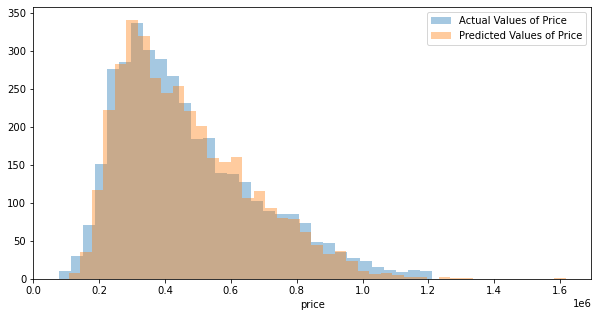

In [128]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(rfecv_predictions_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [129]:
models['Models'].append('RFECV')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Visualizing R2 at different features selected (OLS LR)

In [130]:
'''
# explore the number of selected features for RFE

# get a list of these_models to evaluate
def get_models():
    these_models = dict()
    for i in range(70, 151):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        these_models[str(i)] = rfe
    return these_models

# evaluate a given model using cross-validation and return r2 score for model
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='r2', cv=5, n_jobs=-1, error_score='raise')
    return scores

these_models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in these_models.items():
    scores = evaluate_model(model, X_train_val, y_train_val)
    results.append(scores)
    names.append(name)
    print('>%s features: %.3f R^squared' % (name, mean(scores)))

'''

"\n# explore the number of selected features for RFE\n\n# get a list of these_models to evaluate\ndef get_models():\n    these_models = dict()\n    for i in range(70, 151):\n        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)\n        these_models[str(i)] = rfe\n    return these_models\n\n# evaluate a given model using cross-validation and return r2 score for model\ndef evaluate_model(model, X, y):\n    scores = cross_val_score(model, X, y, scoring='r2', cv=5, n_jobs=-1, error_score='raise')\n    return scores\n\nthese_models = get_models()\n\n# evaluate the models and store results\nresults, names = list(), list()\nfor name, model in these_models.items():\n    scores = evaluate_model(model, X_train_val, y_train_val)\n    results.append(scores)\n    names.append(name)\n    print('>%s features: %.3f R^squared' % (name, mean(scores)))\n\n"

There isn't really improvement past 134 features.

In [131]:
# plot model performance for comparison

#fig = plt.figure(figsize=(20,10))
#plt.boxplot(results, labels=names, showmeans=True)
#plt.show()

## Custom LAD Regression Model

Least Absolute Deviations model (uses MAE to optimize model)

Written by Robert Kubler: https://towardsdatascience.com/build-your-own-custom-scikit-learn-regression-5d0d718f289

In [132]:
# Prepare our custom LAD regression, using the features recommended by our forward-backward feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

In [133]:
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class LADRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        d = X.shape[1]
        mae_loss = lambda coefs: np.mean(np.abs(y - X@coefs[:-1] - coefs[-1]))
        *self.coef_, self.intercept_ = minimize(mae_loss, x0=np.array((d+1)*[0.])).x # the heavy lifting
        
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return X@self.coef_ + self.intercept_

In [134]:
model = LADRegression()

model.fit(X_train_refined, y_train_val)

LADRegression()

In [135]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train_val, cv=cv)
r2 = cv_5.mean()
r2

0.8626568228615568

In [136]:
predictions_LAD = model.predict(X_test_refined)
predictions_LAD_unscaled = np.exp(predictions_LAD)

In [137]:
mae = round(mean_absolute_error(test_actual, predictions_LAD_unscaled), 2)
mae

54095.85

In [138]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_LAD_unscaled)), 2)
rmse

80646.91

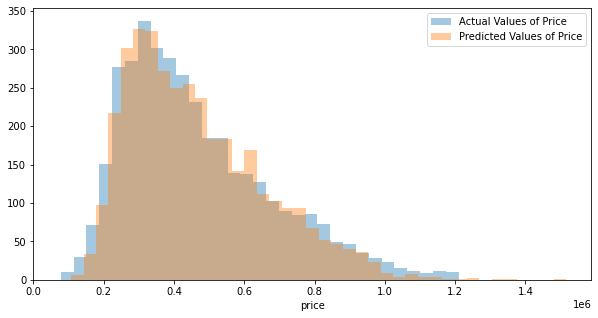

In [139]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_LAD_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [140]:
models['Models'].append('LAD Regression')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Regularization models

### Lasso Regression

Lasso is a regularized model. These models try to simplify the model, in order to prevent overfitting, make the model more interpretable, and simplify feature selection. Lasso will try to solve the regression using fewer features in the final model, and therefore minimizing complexity. 

Lasso assigns penalties to strong coefficients that the model may overemphasize. Some coefficients therefore end up being reduced to 0, and removed from the model.

In [141]:
parameters = {'alpha':[1, 0.1, 0.001, 0.0005]}
lasso = Lasso()
grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0005]},
             scoring='neg_mean_squared_error')

In [142]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'alpha': 0.0005}

Grid scores on train set:

-0.203 (+/-0.008) for {'alpha': 1}
-0.129 (+/-0.004) for {'alpha': 0.1}
-0.036 (+/-0.002) for {'alpha': 0.001}
-0.032 (+/-0.002) for {'alpha': 0.0005}


In [143]:
lasso = Lasso(alpha = [0.0005])
lasso.fit(X_train_val, y_train_val)
cv_5 = cross_val_score(lasso, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8429360951324532

In [144]:
coef = pd.Series(lasso.coef_, index = X_train_val.columns)

In [145]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 119 variables and eliminated the other 31 variables


In [146]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

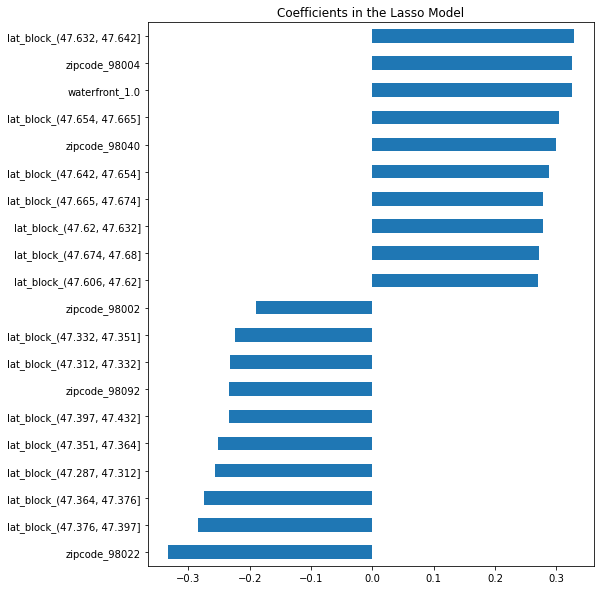

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model");

In [148]:
predictions_lasso = lasso.predict(X_test)
predictions_lasso_unscaled = np.exp(predictions_lasso)

In [149]:
mae = round(mean_absolute_error(test_actual, predictions_lasso_unscaled), 2)
mae

58805.39

In [150]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_lasso_unscaled)), 2)
rmse

85832.98

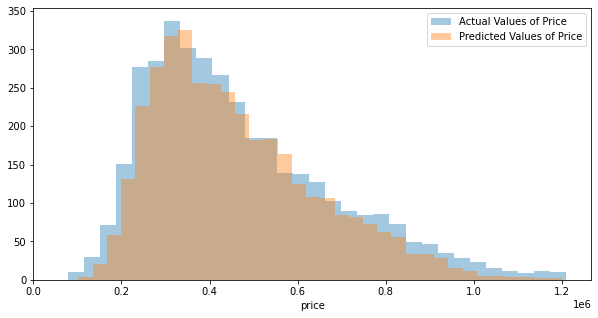

In [151]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_lasso_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [152]:
models['Models'].append('Lasso')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Ridge Regression

Unlike Lasso,  Ridge does not seek to reduce coefficients. Like Lasso, it will penalize coefficients that the model overemphasizes.

In [153]:
parameters = {'alpha':[1, 0.1, 0.001, 0.0005]}
ridge = Ridge()
grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0005]},
             scoring='neg_mean_squared_error')

In [154]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'alpha': 0.1}

Grid scores on train set:

-0.028 (+/-0.002) for {'alpha': 1}
-0.027 (+/-0.002) for {'alpha': 0.1}
-0.027 (+/-0.002) for {'alpha': 0.001}
-0.027 (+/-0.002) for {'alpha': 0.0005}


In [155]:
ridge = Ridge(alpha = [0.1])
ridge.fit(X_train_val, y_train_val)
cv_5 = cross_val_score(ridge, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8637565013538551

In [156]:
predictions_ridge = ridge.predict(X_test)
predictions_ridge_unscaled = np.exp(predictions_ridge)

In [157]:
coef = pd.Series(ridge.coef_, index = X_train_val.columns)

In [158]:
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 150 variables and eliminated the other 0 variables


In [159]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

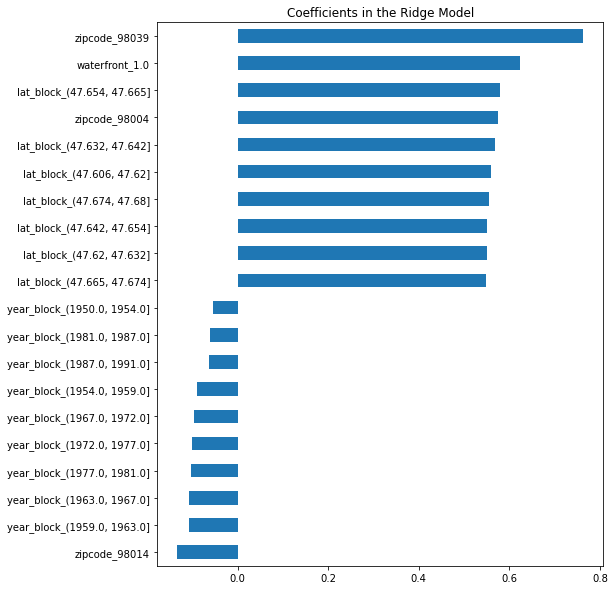

In [160]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model");

In [161]:
mae = round(mean_absolute_error(test_actual, predictions_ridge_unscaled), 2)
mae

53887.28

In [162]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_ridge_unscaled)), 2)
rmse

80111.89

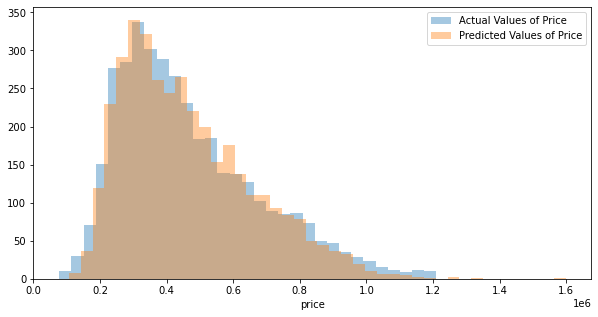

In [163]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_ridge_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [164]:
models['Models'].append('Ridge')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Elastic Net Regression

Elastic Net is another regularlized model that uses elements of Lasso in penalizing over-emphasized coefficients, without eliminating any (is actually a combo of Lasso and Ridge, the latter of which penalizes coefficients in a different way from Lasso, but doesn't eliminate coefficients).

In [165]:
parameters = {'alpha':[1, 0.1, 0.001, 0.0005]}
elasticnet = ElasticNet()
grid = GridSearchCV(elasticnet, parameters, scoring='neg_mean_squared_error',cv=5)
grid.fit(X_train_val, y_train_val)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0005]},
             scoring='neg_mean_squared_error')

In [166]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'alpha': 0.0005}

Grid scores on train set:

-0.203 (+/-0.008) for {'alpha': 1}
-0.121 (+/-0.003) for {'alpha': 0.1}
-0.032 (+/-0.002) for {'alpha': 0.001}
-0.030 (+/-0.002) for {'alpha': 0.0005}


In [167]:
elasticnet = ElasticNet(alpha = [0.0005])
elasticnet.fit(X_train_val, y_train_val)
cv_5 = cross_val_score(elasticnet, X_train_refined, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8520582160033747

In [168]:
predictions_elastic = elasticnet.predict(X_test)
predictions_elastic_unscaled = np.exp(predictions_elastic)

In [169]:
coef = pd.Series(elasticnet.coef_, index = X_train_val.columns)

In [170]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 134 variables and eliminated the other 16 variables


In [171]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

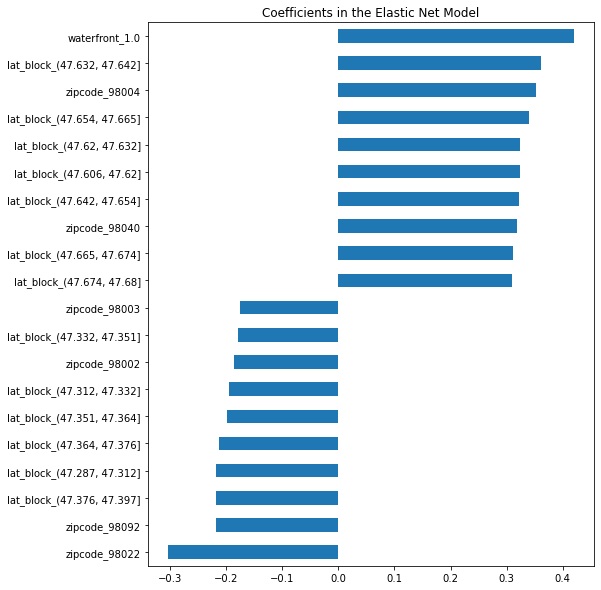

In [172]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model");

In [173]:
mae = round(mean_absolute_error(test_actual, predictions_elastic_unscaled), 2)
mae

56615.44

In [174]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_elastic_unscaled)), 2)
rmse

83143.97

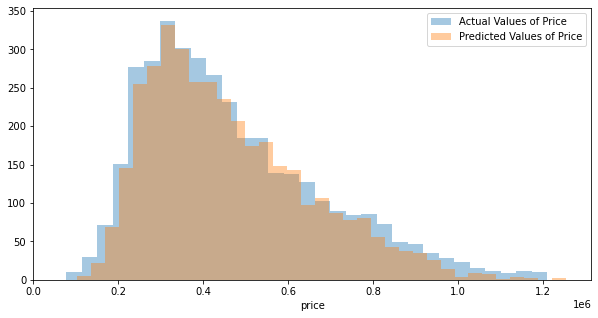

In [175]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_elastic_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [176]:
models['Models'].append('Elastic Net')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## K-Nearest Neighbors Model

K-Nearest Neighbors is more commonly used for classification. Its basic premise is to determine "what is this like" in making a prediction, by looking at other things that are close in value/type. We can pick how many neighbors it assesses to make a classification. As we will see, it doesn't work very well for this type of application (or, I've not tuned the hyperparameters properly and/or don't know how to use it well).

In [177]:
rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    
    # set up the KNN regressor
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_val, y_train_val)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test,pred) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.08202307379474166
RMSE value for k=  2 is: 0.05972834544663734
RMSE value for k=  3 is: 0.05364369338162072
RMSE value for k=  4 is: 0.051820009701038165
RMSE value for k=  5 is: 0.05075807673766343
RMSE value for k=  6 is: 0.05060077003199448
RMSE value for k=  7 is: 0.050106616679174244
RMSE value for k=  8 is: 0.05058895231014206
RMSE value for k=  9 is: 0.05055887068827219
RMSE value for k=  10 is: 0.050727980349240545
RMSE value for k=  11 is: 0.05104875193936708
RMSE value for k=  12 is: 0.05083423015550823
RMSE value for k=  13 is: 0.050771388601246324
RMSE value for k=  14 is: 0.050857407751726244
RMSE value for k=  15 is: 0.05111757068342872
RMSE value for k=  16 is: 0.051356563864923814
RMSE value for k=  17 is: 0.051833392728022155
RMSE value for k=  18 is: 0.052477480683425864
RMSE value for k=  19 is: 0.05256138306460329
RMSE value for k=  20 is: 0.052875829771707586


In [178]:
index_min = np.argmin(rmse_val) + 1

In [179]:
model = neighbors.KNeighborsRegressor(n_neighbors = index_min)
model.fit(X_train_val, y_train_val)  #fit the model
pred_knn = model.predict(X_test) #make prediction on test set
pred_knn = np.exp(pred_knn)

In [180]:
scores = cross_val_score(model, X_train_val, y_train_val, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
r2 = np.mean(scores)
r2

0.7394176794907559

In [181]:
mae = round(mean_absolute_error(test_actual, pred_knn), 2)
mae

73295.98

In [182]:
rmse = round(np.sqrt(mean_squared_error(test_actual, pred_knn)), 2)
rmse

109741.45

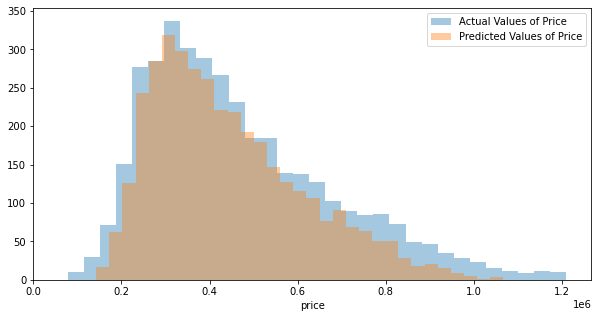

In [183]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(pred_knn, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [184]:
models['Models'].append('KNN')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Support Vector Regression

Support vector regression is a form of regression that allows us to define the acceptable error in our model and then finds the line that best fits that data, according to our specifications. This is really useful with something like housing price predictions, where we are ok with our prediction being within a certain dollar amount. SVR will attempt to get all of the predictions within that dollar amount when possible. This will result in a fit line that is different than a linear regression would have produced, but should result in a lower absolute error, which is a reasonable scoring metric for housing price predictions.

We're going to use sklearn's GridSearchCV to find the optimal hyperparameters to use with our SVM! Here are the parameters we are trying out:

* kernel: linear is parametric, and rbf is non-parametric. One of these should perform better. Our data is not totally normal, so it might be rbf.
* epsilon: This value is how much error we're ok with accepting without assigning a penalty to the model
* C: The error that we will accept from a point outside our epsilon

Our C and epsilon need to be in scale with our output variable, which is our log-transformed price.


In [185]:
param_grid = [
    {'kernel' : ['linear', 'rbf'], 'C' : [.1, .5, 1, 3, 5], 'epsilon' : [.1, .5, 1, 3, 5]} ]

Running this GridSearch took about 30 minutes, so we commented it out after running the first time

In [186]:
#svr = SVR()
#grid = GridSearchCV(svr, param_grid, scoring='neg_mean_absolute_error', cv=5)
#grid.fit(X_train_val, y_train_val)

The following cannot produce results with the above commented out, but results have been replicated in the markdown following.

In [187]:
#print("Best parameters set found on train set: \n")
#print(grid.best_params_)
#print("\nGrid scores on train set:\n")
#means = grid.cv_results_['mean_test_score']
#stds = grid.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, grid.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r"
#              % (mean, std * 2, params))
#y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'C': 3, 'epsilon': 0.1, 'kernel': 'linear'}

Grid scores on train set:

    *-0.120 (+/-0.003) for {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
    *-0.130 (+/-0.004) for {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}
    *-0.156 (+/-0.006) for {'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}
    *-0.217 (+/-0.003) for {'C': 0.1, 'epsilon': 0.5, 'kernel': 'rbf'}
    *-0.288 (+/-0.016) for {'C': 0.1, 'epsilon': 1, 'kernel': 'linear'}
    *-0.334 (+/-0.008) for {'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 0.1, 'epsilon': 3, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 0.1, 'epsilon': 3, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 0.1, 'epsilon': 5, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 0.1, 'epsilon': 5, 'kernel': 'rbf'}
    *-0.119 (+/-0.003) for {'C': 0.5, 'epsilon': 0.1, 'kernel': 'linear'}
    *-0.121 (+/-0.005) for {'C': 0.5, 'epsilon': 0.1, 'kernel': 'rbf'}
    *-0.160 (+/-0.009) for {'C': 0.5, 'epsilon': 0.5, 'kernel': 'linear'}
    *-0.195 (+/-0.004) for {'C': 0.5, 'epsilon': 0.5, 'kernel': 'rbf'}
    *-0.288 (+/-0.016) for {'C': 0.5, 'epsilon': 1, 'kernel': 'linear'}
    *-0.333 (+/-0.008) for {'C': 0.5, 'epsilon': 1, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 0.5, 'epsilon': 3, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 0.5, 'epsilon': 3, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 0.5, 'epsilon': 5, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 0.5, 'epsilon': 5, 'kernel': 'rbf'}
    *-0.119 (+/-0.003) for {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
    *-0.122 (+/-0.005) for {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
    *-0.163 (+/-0.008) for {'C': 1, 'epsilon': 0.5, 'kernel': 'linear'}
    *-0.193 (+/-0.004) for {'C': 1, 'epsilon': 0.5, 'kernel': 'rbf'}
    *-0.288 (+/-0.016) for {'C': 1, 'epsilon': 1, 'kernel': 'linear'}
    *-0.333 (+/-0.008) for {'C': 1, 'epsilon': 1, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 1, 'epsilon': 3, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 1, 'epsilon': 3, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 1, 'epsilon': 5, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 1, 'epsilon': 5, 'kernel': 'rbf'}
    *-0.119 (+/-0.003) for {'C': 3, 'epsilon': 0.1, 'kernel': 'linear'}
    *-0.126 (+/-0.004) for {'C': 3, 'epsilon': 0.1, 'kernel': 'rbf'}
    *-0.165 (+/-0.006) for {'C': 3, 'epsilon': 0.5, 'kernel': 'linear'}
    *-0.193 (+/-0.004) for {'C': 3, 'epsilon': 0.5, 'kernel': 'rbf'}
    *-0.288 (+/-0.016) for {'C': 3, 'epsilon': 1, 'kernel': 'linear'}
    *-0.333 (+/-0.008) for {'C': 3, 'epsilon': 1, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 3, 'epsilon': 3, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 3, 'epsilon': 3, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 3, 'epsilon': 5, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 3, 'epsilon': 5, 'kernel': 'rbf'}
    *-0.119 (+/-0.003) for {'C': 5, 'epsilon': 0.1, 'kernel': 'linear'}
    *-0.128 (+/-0.004) for {'C': 5, 'epsilon': 0.1, 'kernel': 'rbf'}
    *-0.166 (+/-0.005) for {'C': 5, 'epsilon': 0.5, 'kernel': 'linear'}
    *-0.193 (+/-0.004) for {'C': 5, 'epsilon': 0.5, 'kernel': 'rbf'}
    *-0.288 (+/-0.016) for {'C': 5, 'epsilon': 1, 'kernel': 'linear'}
    *-0.333 (+/-0.008) for {'C': 5, 'epsilon': 1, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 5, 'epsilon': 3, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 5, 'epsilon': 3, 'kernel': 'rbf'}
    *-0.450 (+/-0.011) for {'C': 5, 'epsilon': 5, 'kernel': 'linear'}
    *-0.450 (+/-0.011) for {'C': 5, 'epsilon': 5, 'kernel': 'rbf'}

In [188]:
params = {'kernel' : 'linear', 'C' : 3, 'epsilon' : .1}
svr = SVR(**params)

svr.fit(X_train_val, y_train_val)

#cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# commented out because it takes forever to run and doing a simple cv-5

cv_5 = cross_val_score(svr, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8647660250897824

In [189]:
predictions_SVR = svr.predict(X_test)
predictions_SVR_unscaled = np.exp(predictions_SVR)

In [190]:
mae = round(mean_absolute_error(test_actual, predictions_SVR_unscaled), 2)
mae

53928.97

In [191]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_SVR_unscaled)), 2)
rmse

80207.03

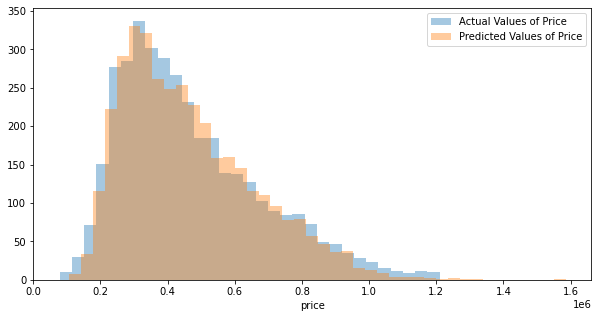

In [192]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_SVR_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [193]:
models['Models'].append('SVR')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Gradient Boosting Regressor

This model is entirely different than linear regression. Gradient boosting uses decision trees to learn about outcomes, with trees being added to the model one at a time and existing trees in the model are not changed. Each successive tree tries to improve upon the predictions of the first one, with the weights of the various decision points being updated each time. Gradient boosting uses the residuals to improve its next tree prediction. Overall much more opaque of a process than linear regression.

To work with a boosted regressor, we're going to roll back some of our one-hot encoding and bring those elements back to categories. Gradient boosting does not benefit from one-hot encoding. It DOES require our categoricals to be numerical, so we will ensure that they are not strings. We also don't need to standardize our continuous features with this model. Let's check out what we need to roll back.

In [194]:
# a reminder of our prepared data frame for linear regression
preprocessed_scaled

price  sqft_living  sqft_lot    floors  bedrooms  bathrooms  \
0      12.309982    -1.070155 -0.185078 -0.922552 -0.225776  -1.678014   
1      13.195614     0.941946  0.225093  1.041728 -0.225776   0.442551   
2      12.100712    -2.173615  0.758271 -0.922552 -1.670223  -1.678014   
3      13.311329     0.241525 -0.387018 -0.922552  0.799076   1.194833   
4      13.142166    -0.156947  0.406011 -0.922552 -0.225776   0.134551   
...          ...          ...       ...       ...       ...        ...   
18476  12.793859    -0.398706 -2.842895  2.190758 -0.225776   0.718067   
18477  12.899220     0.666239 -0.138084  1.041728  0.799076   0.718067   
18478  12.904459    -1.446812 -2.550433  1.041728 -1.670223  -2.430296   
18479  12.899220    -0.283066 -1.608040  1.041728 -0.225776   0.718067   
18480  12.691580    -1.446812 -2.925265  1.041728 -1.670223  -2.430296   

       condition     grade  zipcode_98002  zipcode_98003  zipcode_98004  \
0      -0.618473 -0.440909              0              0              0   
1      -0.618473 -0.440909              0              0              0   
2      -0.618473 -1.611484              0              0              0   
3       2.218223 -0.440909              0              0              0   
4      -0.618473  0.573090              0              0              0   
...          ...       ...            ...            ...            ...   
18476  -0.618473  0.573090              0              0              0   
18477  -0.618473  0.573090              0              0              0   
18478  -0.618473 -0.440909              0              0              0   
18479  -0.618473  0.573090              0              0              0   
18480  -0.618473 -0.440909              0              0              0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98010  zipcode_98011  zipcode_98014  zipcode_98019  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477              0              0              0              0   
18478              0              0              0              0   
18479              0              0              0              0   
18480              0              0              0              0   

       zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
18476              0              0              0              0   
18477      

We're going to roll back zipcode into a single column categorical. We'll use age blocks still, but in-column. We're still going to use month as a categorical.

In [195]:
# we're going back and getting our categoricals data frame to re-configure these categorials for gradient boosting
df_boost = df_categoricals[categoricals]

In [196]:
df_boost

price  yr_built  month  zipcode  waterfront  renovated  basement  \
0      221900.0      1955     10    98178         0.0        0.0       0.0   
1      538000.0      1951     12    98125         0.0        1.0       1.0   
2      180000.0      1933      2    98028         0.0        0.0       0.0   
3      604000.0      1965     12    98136         0.0        0.0       1.0   
4      510000.0      1987      2    98074         0.0        0.0       0.0   
...         ...       ...    ...      ...         ...        ...       ...   
18476  360000.0      2009      5    98103         0.0        0.0       0.0   
18477  400000.0      2014      2    98146         0.0        0.0       0.0   
18478  402101.0      2009      6    98144         0.0        0.0       0.0   
18479  400000.0      2004      1    98027         0.0        0.0       0.0   
18480  325000.0      2008     10    98144         0.0        0.0       0.0   

      comparative_sf comparative_lot      lat  
0                  2               2  47.5112  
1                  3               2  47.7210  
2                  2               2  47.7379  
3                  3               2  47.5208  
4                  2               2  47.6168  
...              ...             ...      ...  
18476              2               2  47.6993  
18477              3               2  47.5107  
18478              2               2  47.5944  
18479              2               3  47.5345  
18480              2               2  47.5941  

[18481 rows x 10 columns]

In [197]:
# reducing the granularity of our age group. We want whole numbers here so round to nearest whole number, always up.
df_boost['age_group'] = np.ceil((2015 - df_boost['yr_built'])/4)

In [198]:
# reducing the granularity of our latitude category by rounding to the nearest .1
df_boost['lat_round'] = round(df_boost['lat'], 1)

In [199]:
df_boost

price  yr_built  month  zipcode  waterfront  renovated  basement  \
0      221900.0      1955     10    98178         0.0        0.0       0.0   
1      538000.0      1951     12    98125         0.0        1.0       1.0   
2      180000.0      1933      2    98028         0.0        0.0       0.0   
3      604000.0      1965     12    98136         0.0        0.0       1.0   
4      510000.0      1987      2    98074         0.0        0.0       0.0   
...         ...       ...    ...      ...         ...        ...       ...   
18476  360000.0      2009      5    98103         0.0        0.0       0.0   
18477  400000.0      2014      2    98146         0.0        0.0       0.0   
18478  402101.0      2009      6    98144         0.0        0.0       0.0   
18479  400000.0      2004      1    98027         0.0        0.0       0.0   
18480  325000.0      2008     10    98144         0.0        0.0       0.0   

      comparative_sf comparative_lot      lat  age_group  lat_round  
0                  2               2  47.5112       15.0       47.5  
1                  3               2  47.7210       16.0       47.7  
2                  2               2  47.7379       21.0       47.7  
3                  3               2  47.5208       13.0       47.5  
4                  2               2  47.6168        7.0       47.6  
...              ...             ...      ...        ...        ...  
18476              2               2  47.6993        2.0       47.7  
18477              3               2  47.5107        1.0       47.5  
18478              2               2  47.5944        2.0       47.6  
18479              2               3  47.5345        3.0       47.5  
18480              2               2  47.5941        2.0       47.6  

[18481 rows x 12 columns]

In [200]:
categorical = ['zipcode', 'waterfront', 'renovated', 'basement', 'comparative_sf', 'comparative_lot', 'month', 'age_group', 'lat_round']

# making our boost-ready categorical data frame using the columns we need
df_boost_processed = df_boost[categorical]

# tagging all of these things as categoricals so they are considered properly instead of ordinal/numerical
for item in categorical:
    df_boost_processed[item] = df_boost_processed[item].astype('category')


In [201]:
df_boost_processed

zipcode waterfront renovated basement comparative_sf comparative_lot  \
0       98178        0.0       0.0      0.0              2               2   
1       98125        0.0       1.0      1.0              3               2   
2       98028        0.0       0.0      0.0              2               2   
3       98136        0.0       0.0      1.0              3               2   
4       98074        0.0       0.0      0.0              2               2   
...       ...        ...       ...      ...            ...             ...   
18476   98103        0.0       0.0      0.0              2               2   
18477   98146        0.0       0.0      0.0              3               2   
18478   98144        0.0       0.0      0.0              2               2   
18479   98027        0.0       0.0      0.0              2               3   
18480   98144        0.0       0.0      0.0              2               2   

      month age_group lat_round  
0        10      15.0      47.5  
1        12      16.0      47.7  
2         2      21.0      47.7  
3        12      13.0      47.5  
4         2       7.0      47.6  
...     ...       ...       ...  
18476     5       2.0      47.7  
18477     2       1.0      47.5  
18478     6       2.0      47.6  
18479     1       3.0      47.5  
18480    10       2.0      47.6  

[18481 rows x 9 columns]

In [202]:
# making our final boost_processed ready data frame by concatenating our target price, continuous variables, and boost-ready
# categorical variables
boost_processed = pd.concat([df_cleaned[target], df_continuous, df_boost_processed], axis=1)

In [203]:
# our gradient boosting ready data frame

boost_processed

price  sqft_living  sqft_lot  floors  bedrooms  bathrooms  \
0      221900.0         1180      5650     1.0         3       1.00   
1      538000.0         2570      7242     2.0         3       2.25   
2      180000.0          770     10000     1.0         2       1.00   
3      604000.0         1960      5000     1.0         4       3.00   
4      510000.0         1680      8080     1.0         3       2.00   
...         ...          ...       ...     ...       ...        ...   
18476  360000.0         1530      1131     3.0         3       2.50   
18477  400000.0         2310      5813     2.0         4       2.50   
18478  402101.0         1020      1350     2.0         2       0.75   
18479  400000.0         1600      2388     2.0         3       2.50   
18480  325000.0         1020      1076     2.0         2       0.75   

       condition  grade zipcode waterfront renovated basement comparative_sf  \
0              3      7   98178        0.0       0.0      0.0              2   
1              3      7   98125        0.0       1.0      1.0              3   
2              3      6   98028        0.0       0.0      0.0              2   
3              5      7   98136        0.0       0.0      1.0              3   
4              3      8   98074        0.0       0.0      0.0              2   
...          ...    ...     ...        ...       ...      ...            ...   
18476          3      8   98103        0.0       0.0      0.0              2   
18477          3      8   98146        0.0       0.0      0.0              3   
18478          3      7   98144        0.0       0.0      0.0              2   
18479          3      8   98027        0.0       0.0      0.0              2   
18480          3      7   98144        0.0       0.0      0.0              2   

      comparative_lot month age_group lat_round  
0                   2    10      15.0      47.5  
1                   2    12      16.0      47.7  
2                   2     2      21.0      47.7  
3                   2    12      13.0      47.5  
4                   2     2       7.0      47.6  
...               ...   ...       ...       ...  
18476               2     5       2.0      47.7  
18477               2     2       1.0      47.5  
18478               2     6       2.0      47.6  
18479               3     1       3.0      47.5  
18480               2    10       2.0      47.6  

[18481 rows x 17 columns]

In [204]:
# last check that our data types are correct - all should be numerical or categories, and even the categories should be in
# numerical format
boost_processed.dtypes

price               float64
sqft_living           int64
sqft_lot              int64
floors              float64
bedrooms              int64
bathrooms           float64
condition             int64
grade                 int64
zipcode            category
waterfront         category
renovated          category
basement           category
comparative_sf     category
comparative_lot    category
month              category
age_group          category
lat_round          category
dtype: object

In [205]:
# prepare boost regression data set, same as preparing for other regression styles

X = boost_processed.drop('price', axis=1)
y = boost_processed['price']

In [206]:
# creating our train/validation sets and our test sets, same as always

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)

# get our actual prices reverse log transformed
test_actual = y_test

Gradient Boosting performs best with optimal parameter tuning. We're going to use sklearn's GridSearchCV to find the optimal hyperparameters to use with our gradient booster! Here are the parameters we are trying out:

* Loss: Loss function to be optimized. We are using lad for all of these, which is least absolute deviation
* n_estimators: Number of boosts to perform. Gradient boosting is, according to sklearn, pretty robust to over-fitting so more is usually better
* max_depth: This determines how many tree nodes the estimator looks at before making a prediction. We don't know what is best here, but I read with high-cardinality variables that 4-8 is usually good, so we are trying everything from 3-8 to see what works the best
* learning_rate: Tuning this setting alters how much the model corrects after it runs a boost. .1 is a common rate and we will test a lower and higher rate as well.

In [207]:
param_grid = [
    {'loss': ['lad'], 'n_estimators' : [250, 500],'max_depth' : [3, 4, 5, 6, 7, 8], 'learning_rate': [.05, .1, .3]}] # 

Running this GridSearch took about 90 minutes, so we commented it out

In [208]:
#model = GradientBoostingRegressor()
#grid = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=5)
#grid.fit(X_train_val, y_train_val)

The following cannot produce results with the above commented out, but results have been replicated in the markdown following.

In [209]:
#print("Best parameters set found on train set: \n")
#print(grid.best_params_)
#print("\nGrid scores on train set:\n")
#means = grid.cv_results_['mean_test_score']
#stds = grid.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, grid.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r"
#              % (mean, std * 2, params))
#y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 500}

Grid scores on train set:

    *-66840.120 (+/-1619.859) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 250}
    *-62664.947 (+/-2133.751) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 500}
    *-62374.456 (+/-1229.272) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 250}
    *-59640.226 (+/-1162.829) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 500}
    *-59865.205 (+/-970.467) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 250}
    *-57976.535 (+/-700.847) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 500}
    *-58247.526 (+/-1246.676) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 250}
    *-57503.606 (+/-1123.625) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 500}
    *-57789.270 (+/-2015.145) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 250}
    *-57059.973 (+/-1836.378) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 500}
    *-57376.748 (+/-1550.273) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 250}
    *-56932.683 (+/-1813.476) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 500}
    *-62553.238 (+/-1591.178) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 250}
    *-59918.017 (+/-1060.959) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 500}
    *-59436.297 (+/-885.120) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 250}
    *-58370.928 (+/-1248.473) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 500}
    *-58107.360 (+/-1576.668) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 250}
    *-57537.077 (+/-1074.531) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 500}
    *-57761.874 (+/-1123.443) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 250}
    *-57482.741 (+/-1816.020) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 500}
    *-57442.457 (+/-1966.396) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 250}
    *-57167.007 (+/-1483.537) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 500}
    *-57684.695 (+/-1458.799) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 250}
    *-57257.558 (+/-1229.135) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 500}
    *-59406.260 (+/-200.394) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 250}
    *-59317.330 (+/-1132.891) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 500}
    *-58407.874 (+/-1212.328) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 250}
    *-58532.393 (+/-1337.937) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 4, 'n_estimators': 500}
    *-58209.084 (+/-478.089) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 250}
    *-58261.074 (+/-576.375) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 500}
    *-57762.180 (+/-1812.929) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 250}
    *-57889.671 (+/-1840.939) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 6, 'n_estimators': 500}
    *-58400.892 (+/-2428.807) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 250}
    *-58574.829 (+/-1144.900) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 500}
    *-59126.455 (+/-2238.013) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 250}
    *-58816.255 (+/-1367.941) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 8, 'n_estimators': 500}

Having found the optimal n_estimators, max_depth and learning_rate with our GridSearchCV, we run our regressor on the train_val set with the chosen options.

In [210]:
params = {'loss': 'lad', 'n_estimators': 500, 'max_depth': 8, 'learning_rate': .05}  
model = GradientBoostingRegressor(**params)

model.fit(X_train_val, y_train_val)

cv_5 = cross_val_score(model, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8429037081045795

In [211]:
# apply our model to our test set and get predicted values
gradient_boosted_preds = model.predict(X_test)

# compare our predicted values to the actual values
predicted_prices_gradientboost = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": gradient_boosted_preds.astype(int)})
predicted_prices_gradientboost

Actual  Predicted
3652   402500     323422
9425   339500     313086
1157   282000     347231
17936  757500     863662
6228   445500     431714
...       ...        ...
15940  325000     280156
10782  686500     651111
17047  399440     380531
1092   270000     278309
10911  145000     357108

[3697 rows x 2 columns]

In [212]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, gradient_boosted_preds), 2)
mae

56220.24

In [213]:
rmse = round(np.sqrt(mean_squared_error(test_actual, gradient_boosted_preds)), 2)
rmse

83016.16

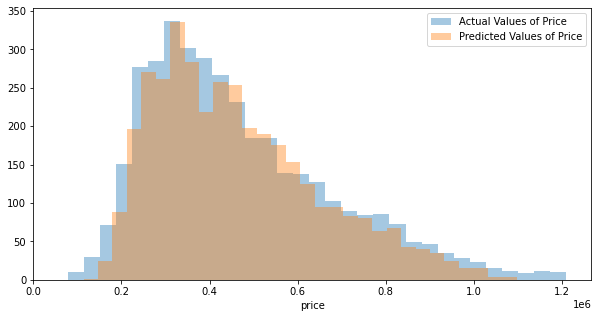

In [214]:
plt.figure(figsize=(10,5))
sns.distplot(y_test, hist=True, kde=False)
sns.distplot(gradient_boosted_preds, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [215]:
models['Models'].append('Gradient Boosting')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Random Forest Regressor

In [216]:
param_grid = [
    {'bootstrap': [True, False], 'n_estimators' : [100, 250, 500],'max_depth' : [5, 10, 20, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}] # 

Grid Search for optimal parameters. Took several hours to run, so commented out after storing results.

In [217]:
'''
model = RandomForestRegressor()
grid = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train_val, y_train_val)

'''

"\nmodel = RandomForestRegressor()\ngrid = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error', cv=5)\ngrid.fit(X_train_val, y_train_val)\n\n"

In [218]:
'''
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))
'''

'\nprint("Best parameters set found on train set: \n")\nprint(grid.best_params_)\nprint("\nGrid scores on train set:\n")\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, grid.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r"\n              % (mean, std * 2, params))\ny_true, y_pred = test_actual, np.exp(grid.predict(X_test))\n'

Best parameters set found on train set: 

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}

Grid scores on train set:

-111270.360 (+/-2943.016) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
-111289.131 (+/-2556.734) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
-111224.722 (+/-2679.890) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
-111283.816 (+/-2866.479) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
-111349.179 (+/-2658.378) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
-111175.618 (+/-2881.753) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
-111230.092 (+/-2986.651) for {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
......
-91654.274 (+/-2019.948) for {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
-91407.873 (+/-2143.925) for {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 250}
-91354.544 (+/-2304.075) for {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}

In [219]:
params = {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}  
model = RandomForestRegressor(**params)

model.fit(X_train_val, y_train_val)

cv_5 = cross_val_score(model, X_train_val, y_train_val, cv=5)
r2 = cv_5.mean()
r2

0.8245806930959484

In [220]:
# apply our model to our test set and get predicted values
forest_predictions = model.predict(X_test)

# compare our predicted values to the actual values
predicted_prices_gradientboost = pd.DataFrame({"Actual": test_actual.astype(int), "Predicted": forest_predictions.astype(int)})
predicted_prices_gradientboost

Actual  Predicted
3652   402500     301902
9425   339500     309115
1157   282000     313007
17936  757500     815487
6228   445500     464248
...       ...        ...
15940  325000     253843
10782  686500     605436
17047  399440     384354
1092   270000     282114
10911  145000     335032

[3697 rows x 2 columns]

In [221]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, forest_predictions), 2)
mae

60034.19

In [222]:
rmse = round(np.sqrt(mean_squared_error(test_actual, forest_predictions)), 2)
rmse

87928.88

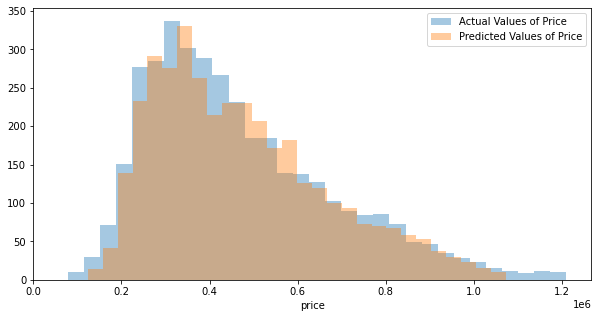

In [223]:
plt.figure(figsize=(10,5))
sns.distplot(y_test, hist=True, kde=False)
sns.distplot(forest_predictions, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [224]:
models['Models'].append('Random Forest')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

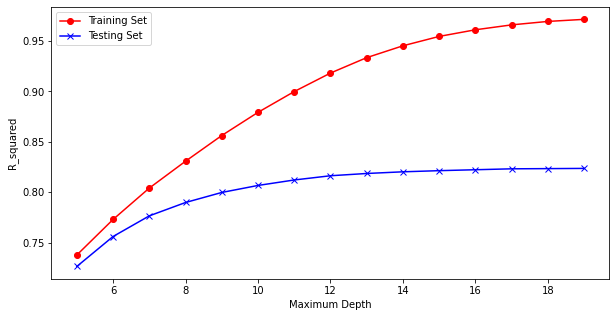

In [225]:
from sklearn.model_selection import validation_curve
def ValidationCurve(estimator, predictors, target, param_name, hyperparam):
    
    train_score, test_score = validation_curve(estimator, predictors, target, param_name, np.arange(5,20), cv=5, scoring='r2')
    Rsqaured_train = train_score.mean(axis=1)
    Rsquared_test= test_score.mean(axis=1)
    
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(5,20), Rsqaured_train, color='r', linestyle='-', marker='o', label='Training Set')
    plt.plot(np.arange(5,20), Rsquared_test, color='b', linestyle='-', marker='x', label='Testing Set')
    plt.legend(labels=['Training Set', 'Testing Set'])
    plt.xlabel(hyperparam)
    plt.ylabel('R_squared')
    
ValidationCurve(RandomForestRegressor(), X_train_val, y_train_val, 'max_depth', 'Maximum Depth')

# Comps "Model"

Realtors have, traditionally, used a more grassroots method for predicting sales prices - the comps model. "Comps" are comparative properties, which are located in a nearby geographical area and have similar feature stats. With comps, a realtor looks for other similar houses in the area of the house being listed, and selects a price appropriately. It's a very literal application of K-nearest neighbors where the 2-dimensional grid is the latitude and longitude, and a neighbor is defined as the points having the closest physical feature similarities. We are going to build a comps "model" and see how our regression model compares. I use "model" in quotes because this isn't a model in machine learning terms. It requires the entire dataset to produce an answer, rather than a regression model which is a mathematical expression that we can save and utilize independently. It is essentially a "realtor simulator" which simulates the behavior of a realtor looking for comps. However for the purposes of our research, this is a Comps Model.

## Data Prep

In [226]:
# our data set for a comps model looks a lot simpler, and requires no feature scaling

df_comps = df[['lat', 'long', 'price', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition', 'grade']]
df_comps

lat     long     price  sqft_living  sqft_lot  bedrooms  condition  \
0      47.5112 -122.257  221900.0         1180      5650         3          3   
1      47.7210 -122.319  538000.0         2570      7242         3          3   
2      47.7379 -122.233  180000.0          770     10000         2          3   
3      47.5208 -122.393  604000.0         1960      5000         4          5   
4      47.6168 -122.045  510000.0         1680      8080         3          3   
...        ...      ...       ...          ...       ...       ...        ...   
18476  47.6993 -122.346  360000.0         1530      1131         3          3   
18477  47.5107 -122.362  400000.0         2310      5813         4          3   
18478  47.5944 -122.299  402101.0         1020      1350         2          3   
18479  47.5345 -122.069  400000.0         1600      2388         3          3   
18480  47.5941 -122.299  325000.0         1020      1076         2          3   

       grade  
0          7  
1          7  
2          6  
3          7  
4          8  
...      ...  
18476      8  
18477      8  
18478      7  
18479      8  
18480      7  

[18481 rows x 8 columns]

In [227]:
# our descriptors can help us figure out the appropriate range to use when seeking a comp for each of these features

df_comps.describe()

lat          long         price   sqft_living      sqft_lot  \
count  18481.000000  18481.000000  1.848100e+04  18481.000000  18481.000000   
mean      47.560555   -122.228745  4.724418e+05   1919.212434   7351.567935   
std        0.138040      0.129548  2.126000e+05    725.920920   3681.899788   
min       47.177500   -122.512000  7.800000e+04    370.000000    520.000000   
25%       47.474500   -122.336000  3.100000e+05   1370.000000   4840.000000   
50%       47.570500   -122.265000  4.299000e+05   1810.000000   7200.000000   
75%       47.680000   -122.150000  5.940000e+05   2360.000000   9334.000000   
max       47.777600   -121.770000  1.210000e+06   4510.000000  20562.000000   

           bedrooms     condition         grade  
count  18481.000000  18481.000000  18481.000000  
mean       3.317353      3.409935      7.483091  
std        0.880394      0.649273      0.992313  
min        1.000000      1.000000      3.000000  
25%        3.000000      3.000000      7.000000  
50%        3.000000      3.000000      7.000000  
75%        4.000000      4.000000      8.000000  
max        9.000000      5.000000     11.000000

In [228]:
# We want both latitude and longitude together in order to locate the exact location of a property.
# We make a new column in our data frame that groups this coordinate location together
# We also prepare our data column of predictions and populate it with NaN

dataset = list(zip(df_comps['lat'],df_comps['long']))
df_comps['coordinates'] = dataset
#df_comps['comps_est'] = np.NaN
df_comps.reset_index(inplace=True, drop=True)
df_comps

lat     long     price  sqft_living  sqft_lot  bedrooms  condition  \
0      47.5112 -122.257  221900.0         1180      5650         3          3   
1      47.7210 -122.319  538000.0         2570      7242         3          3   
2      47.7379 -122.233  180000.0          770     10000         2          3   
3      47.5208 -122.393  604000.0         1960      5000         4          5   
4      47.6168 -122.045  510000.0         1680      8080         3          3   
...        ...      ...       ...          ...       ...       ...        ...   
18476  47.6993 -122.346  360000.0         1530      1131         3          3   
18477  47.5107 -122.362  400000.0         2310      5813         4          3   
18478  47.5944 -122.299  402101.0         1020      1350         2          3   
18479  47.5345 -122.069  400000.0         1600      2388         3          3   
18480  47.5941 -122.299  325000.0         1020      1076         2          3   

       grade          coordinates  
0          7  (47.5112, -122.257)  
1          7   (47.721, -122.319)  
2          6  (47.7379, -122.233)  
3          7  (47.5208, -122.393)  
4          8  (47.6168, -122.045)  
...      ...                  ...  
18476      8  (47.6993, -122.346)  
18477      8  (47.5107, -122.362)  
18478      7  (47.5944, -122.299)  
18479      8  (47.5345, -122.069)  
18480      7  (47.5941, -122.299)  

[18481 rows x 9 columns]

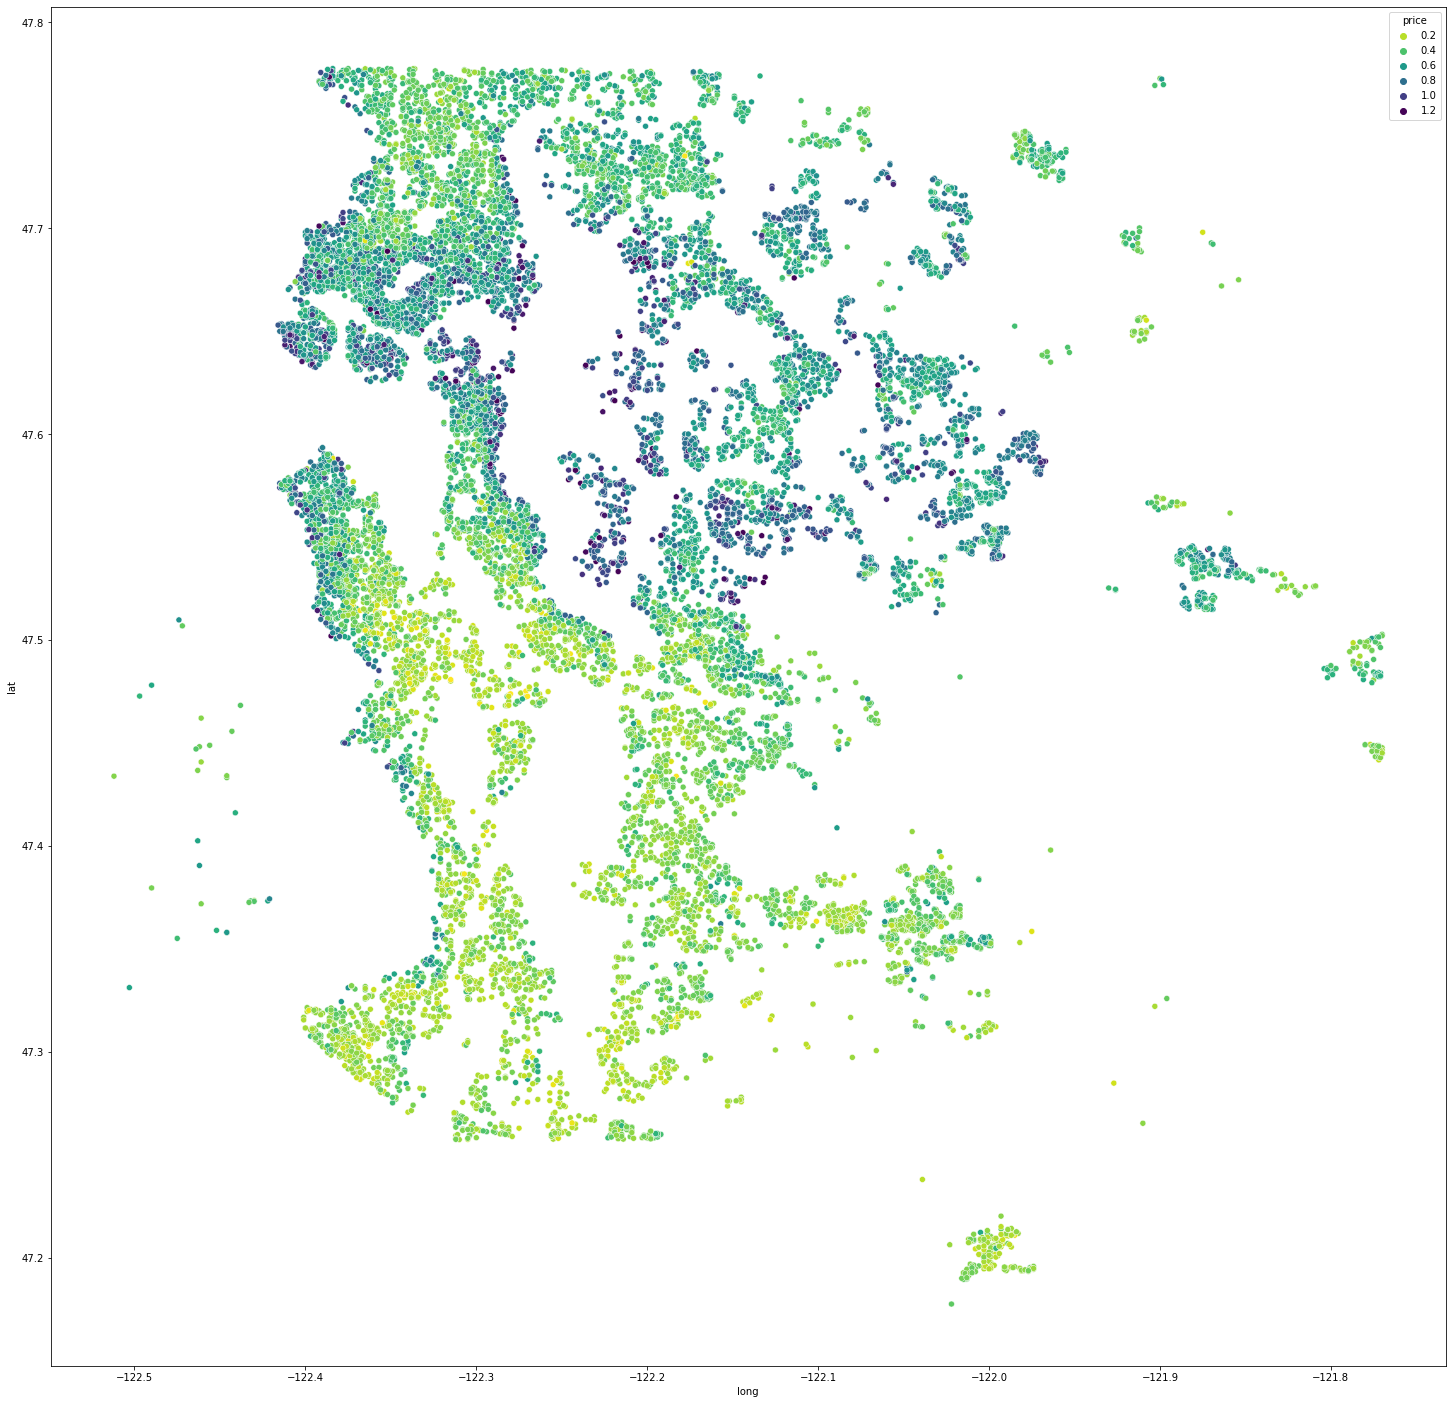

In [229]:
# A fun visual to see how using lat/long and comps makes a k-nearest neighbors problem.
# When we plot the latitude and longitude, we end up with a map of king county home sales!

plt.figure(figsize=(25,25))

sns.scatterplot(data=df_comps, x="long", y="lat", hue="price", palette="viridis_r");

Generate comps

* Generate a sq footage % range
* Generate a lot size % range
* Decide if +/- 1 bedroom is acceptable
* Decide if +/- 1 condition is acceptable


* For KNN:
    * For each entry:
    * establish comp requirements
    * create comp dataframe
    * determine neighborhood inclusion zone using within reasonable lat/long
    * create check dataframe which only includes entries within the inclusion zone
    * make sure there are at least x entries available. If not, increase inclusion zone.
    * calculate euclidian distance against all entries in inclusion zone
    * store euclidian distance to dataframe column for local zone
    * accept top x entries by euclidian distance


## Comps Functions

In [240]:
def inclusion_zone(base_property, housing_set):
    lat = base_property['lat']
    long = base_property['long']
    eligible_zone = housing_set.loc[(housing_set['lat'] >= (lat-latrange)) & 
                                        (housing_set['lat'] <= (lat+latrange))&
                                      (housing_set['long'] >= (long-longrange)) & 
                                       (housing_set['long'] <= (long+longrange))]
    return eligible_zone

def find_comps(base_property, housing_set, bedrooms, condition, grade):
    eligible_zone = inclusion_zone(base_property, housing_set)
    sqft = base_property['sqft_living']
    lot = base_property['sqft_lot']
    
    eligible_homes = eligible_zone.loc[(eligible_zone['sqft_living'] >= (sqft*(1-sqftrange))) & 
                                   (eligible_zone['sqft_living'] <= (sqft*(1+sqftrange))) &
                                  (eligible_zone['sqft_lot'] >= (lot*(1-lotrange))) & 
                                   (eligible_zone['sqft_lot'] <= (lot*(1+lotrange))) &
                                  (eligible_zone['bedrooms'] >= (bedrooms-(1+bedmod))) & 
                                   (eligible_zone['bedrooms'] <= (bedrooms+(1+bedmod))) &
                                  (eligible_zone['condition'] >= (condition-(1+condmod))) & 
                                   (eligible_zone['condition'] <= (condition + (1+condmod))) & 
                                       (eligible_zone['grade'] >= (grade-(1+grademod))) & 
                                       (eligible_zone['grade'] <= (grade + (1+grademod)))]
    return eligible_homes


from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def comp_value(base_property, housing_set):
    bedrooms = base_property['bedrooms']
    condition = base_property['condition']
    grade = base_property['grade']
    start_coordinates = base_property['coordinates']
    eligible_homes = find_comps(base_property, housing_set, bedrooms, condition, grade)
    if eligible_homes.shape[0] >= 11:
        eligible_homes['distance'] = eligible_homes['coordinates'].apply(lambda x: euclidean_distance(start_coordinates, x))
        eligible_homes = eligible_homes.sort_values('distance', ascending=True)
        current_index = base_property.name
        comps = eligible_homes.iloc[:6]
        sq_footage = comps['sqft_living'].sum()
        total_price = comps['price'].sum()
        pr_sqft = total_price/sq_footage
        comp_value = base_property['sqft_living'] * pr_sqft
        comp_value = round(comp_value, 0)      
        return comp_value
    else:
        return np.nan
    

## Comps Model

In [231]:
X = df_comps.drop('price', axis=1)
y = df_comps['price']

compsfinder, getcomps, y_train, actual = train_test_split(X, y, test_size=0.2, random_state=randomstate)

In [232]:
compsfinder['price'] = y_train
getcomps['actual'] = actual

In [233]:
getcomps

lat     long  sqft_living  sqft_lot  bedrooms  condition  grade  \
3652   47.5462 -122.277         1290      4000         3          3      7   
9425   47.3644 -122.040         1930      7862         4          3      7   
1157   47.7529 -122.306         1200     11111         4          3      7   
17936  47.6777 -122.156         3420      6845         4          3      9   
6228   47.7131 -122.283         1880      9360         3          4      7   
...        ...      ...          ...       ...       ...        ...    ...   
15940  47.5076 -122.178         1730     10532         5          4      5   
10782  47.6701 -122.288         1390      5025         2          4      8   
17047  47.3276 -122.163         2311      4396         4          3      9   
1092   47.4579 -122.090         1240     14110         3          4      7   
10911  47.6836 -122.174          800      8125         2          3      6   

               coordinates    actual  
3652   (47.5462, -122.277)  402500.0  
9425    (47.3644, -122.04)  339500.0  
1157   (47.7529, -122.306)  282000.0  
17936  (47.6777, -122.156)  757500.0  
6228   (47.7131, -122.283)  445500.0  
...                    ...       ...  
15940  (47.5076, -122.178)  325000.0  
10782  (47.6701, -122.288)  686500.0  
17047  (47.3276, -122.163)  399440.0  
1092    (47.4579, -122.09)  270000.0  
10911  (47.6836, -122.174)  145000.0  

[3697 rows x 9 columns]

How can we figure out what parameters give us the best comps results? We want to use something similar to GridSearchCV, but we haven't written a custom estimator. To do this, we will use sklearn's ParameterGrid. It puts together parameter combinations for us to use in whatever custom fashion we wish.

In [234]:
from sklearn.model_selection import ParameterGrid

param_grid = {'latrange': [.005, .01], 'longrange': [.005, .01], 'sqftrange': [.025, .05], 'lotrange': [.1, .2], 'bedmod': [.25], 'condmod': [.5, 1], 'grademod': [.5, 1, 1.5], }

combos = list(ParameterGrid(param_grid))

len(combos)

96

We're going to apply our 54 different parameter combinations to our testing dataframe. Afterward we'll check which parameters gave us the best results, and use those parameters for our final "comps model". Unfortunately, we don't have cv for this task. That's bad news for us.

Testing our parameters took a couple of hours, so after running it once, I comment it out and store the results.

In [235]:
'''
comps_scores = {}

for i in range(len(combos)):
    parameters = combos[i]
    getcomps[i] = None
    latrange = .02
    longrange = .02
    sqftrange = .1
    lotrange = .5
    bedmod = 0
    condmod = 0
    grademod = 1
    while getcomps.isna().sum()[i] != 0:
        getcomps.loc[getcomps[i].isna(), i] = getcomps.loc[getcomps[i].isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
        latrange += combos[i]['latrange']
        longrange += combos[i]['longrange']
        sqftrange += combos[i]['sqftrange']
        lotrange += combos[i]['lotrange']
        bedmod += combos[i]['bedmod']
        condmod += combos[i]['condmod']
        grademod += combos[i]['grademod']
    key = str(combos[i])
    value = round(np.sqrt(mean_squared_error(getcomps['actual'], getcomps[i])), 2)
    comps_scores[key] = value
    print(i+1, value, parameters)
'''

"\ncomps_scores = {}\n\nfor i in range(len(combos)):\n    parameters = combos[i]\n    getcomps[i] = None\n    latrange = .02\n    longrange = .02\n    sqftrange = .1\n    lotrange = .5\n    bedmod = 0\n    condmod = 0\n    grademod = 1\n    while getcomps.isna().sum()[i] != 0:\n        getcomps.loc[getcomps[i].isna(), i] = getcomps.loc[getcomps[i].isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)\n        latrange += combos[i]['latrange']\n        longrange += combos[i]['longrange']\n        sqftrange += combos[i]['sqftrange']\n        lotrange += combos[i]['lotrange']\n        bedmod += combos[i]['bedmod']\n        condmod += combos[i]['condmod']\n        grademod += combos[i]['grademod']\n    key = str(combos[i])\n    value = round(np.sqrt(mean_squared_error(getcomps['actual'], getcomps[i])), 2)\n    comps_scores[key] = value\n    print(i+1, value, parameters)\n"

1 120176.49 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
2 118470.94 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
3 120092.22 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
4 119308.61 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
5 125567.83 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
6 125818.76 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
7 125678.26 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
8 126838.63 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
9 124148.03 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
10 123145.39 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
11 123884.52 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
12 123974.23 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
13 130806.52 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
14 130229.15 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
15 130912.94 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
16 131376.29 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
17 109069.36 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
18 109410.56 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
19 109501.47 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
20 109628.37 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
21 113711.81 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
22 112078.32 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
23 114349.97 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
24 112635.79 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
25 112416.4 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
26 111906.24 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
27 113546.95 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
28 111855.1 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
29 115435.05 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
30 114966.29 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
31 115853.64 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
32 115724.15 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
33 103109.21 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
34 105918.24 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
35 103308.97 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
36 106624.58 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
37 106770.74 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
38 108781.33 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
39 107146.03 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
40 109315.67 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
41 104331.4 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
42 107826.18 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
43 105042.17 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
44 108565.07 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
45 108125.17 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
46 110442.01 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
47 108365.6 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
48 111155.63 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
49 120177.97 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
50 118484.18 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
51 120098.53 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
52 119321.76 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
53 125568.8 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
54 125822.89 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
55 125679.46 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
56 126842.73 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
57 124146.01 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
58 123145.33 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
59 123887.17 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
60 123974.17 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
61 130803.34 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
62 130232.94 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
63 130910.0 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
64 131384.24 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
65 109067.73 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
66 109557.09 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
67 109569.0 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
68 109577.98 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
69 113897.47 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
70 112456.21 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
71 114595.74 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
72 113084.43 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
73 112575.32 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
74 112204.46 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
75 113676.87 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
76 112159.97 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
77 115689.08 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
78 115554.46 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
79 116208.53 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
80 116353.97 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
81 103123.19 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
82 105915.06 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
83 103389.54 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
84 106626.86 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
85 106836.31 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
86 108882.75 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
87 107222.31 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
88 109326.32 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
89 104428.36 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
90 107945.19 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
91 105094.56 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
92 108595.39 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
93 108237.1 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
94 110556.68 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
95 108496.59 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
96 111199.52 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}

In [236]:
# picked out the best scoring combination

#key_min = min(comps_scores.keys(), key=(lambda k: comps_scores[k]))
#key_max = max(comps_scores.keys(), key=(lambda k: comps_scores[k]))
#print('Best: '+key_min, '\nWorst: '+key_max)

    Best: {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025} 
    Worst: {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}

In [237]:
compsfinder

lat     long  sqft_living  sqft_lot  bedrooms  condition  grade  \
15415  47.7111 -122.213         1290      9526         3          3      7   
829    47.3298 -122.297         1280      8712         3          4      7   
14449  47.6011 -122.192         1610      8976         4          4      8   
5727   47.5071 -122.194         1660     10757         4          3      7   
5814   47.3137 -122.212         1200      7800         3          4      7   
...        ...      ...          ...       ...       ...        ...    ...   
11284  47.6544 -122.085         3630      9475         3          3     11   
11964  47.4356 -122.290          980      7606         3          3      7   
5390   47.7741 -122.373         1830      7345         4          4      8   
860    47.7571 -122.145         2020      8970         3          4      7   
15795  47.7146 -122.279         3470      7396         4          3      8   

               coordinates     price  
15415  (47.7111, -122.213)  321000.0  
829    (47.3298, -122.297)  216000.0  
14449  (47.6011, -122.192)  650000.0  
5727   (47.5071, -122.194)  385000.0  
5814   (47.3137, -122.212)  195000.0  
...                    ...       ...  
11284  (47.6544, -122.085)  964000.0  
11964   (47.4356, -122.29)  221000.0  
5390   (47.7741, -122.373)  494000.0  
860    (47.7571, -122.145)  475000.0  
15795  (47.7146, -122.279)  810000.0  

[14784 rows x 9 columns]

In [241]:
getcomps['comps_est'] = np.NaN

latrange = .02
longrange = .02
sqftrange = .1
lotrange = .5
bedmod = 0
condmod = 0
grademod = 1

while getcomps.isna().sum()['comps_est'] != 0:
    getcomps.loc[getcomps.comps_est.isna(), 'comps_est'] = getcomps.loc[getcomps.comps_est.isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
    latrange += .005
    longrange += .005
    sqftrange += .025
    lotrange += .1
    bedmod += .25
    condmod += .5
    grademod += 1.5


In [242]:
comps_predictions = getcomps[['actual', 'comps_est']]
comps_predictions

actual  comps_est
3652   402500.0   330370.0
9425   339500.0   308212.0
1157   282000.0   309749.0
17936  757500.0   824957.0
6228   445500.0   485298.0
...         ...        ...
15940  325000.0   301424.0
10782  686500.0   552537.0
17047  399440.0   314068.0
1092   270000.0   274076.0
10911  145000.0   420907.0

[3697 rows x 2 columns]

In [243]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(getcomps['actual'], getcomps['comps_est']), 2)
mae

62170.05

In [244]:
rmse = round(np.sqrt(mean_squared_error(getcomps['actual'], getcomps['comps_est'])), 2)
rmse

92319.13

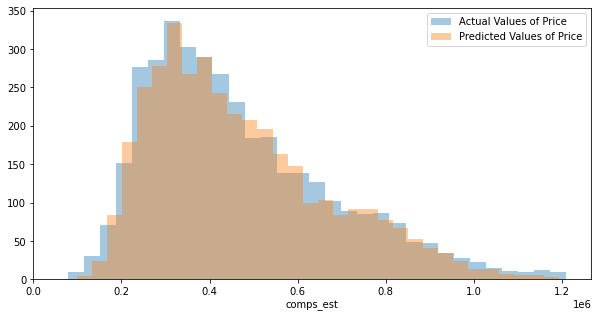

In [245]:
plt.figure(figsize=(10,5))
sns.distplot(getcomps['actual'], hist=True, kde=False)
sns.distplot(getcomps['comps_est'], hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [246]:
models['Models'].append('Realtor Simulator')
models['r2'].append(None)
models['mae'].append(mae)
models['rmse'].append(rmse)

It would seem that our "realtor simulator" performs worse than our regression model, but not by a lot.

# Model Selection

We ran several different types of models, and logged the r^squared and mean absolute error for each model type. Which model performed the best for us?

In [247]:
model_types = pd.DataFrame(models)

In [248]:
model_types = model_types.sort_values('rmse', ascending=True).reset_index()
model_types.drop('index',axis=1, inplace=True)

In [249]:
model_types

Models        r2       mae       rmse
0                    Ridge  0.863757  53887.28   80111.89
1                 Basic LR  0.864659  53892.71   80135.75
2                    RFECV  0.868179  53895.25   80137.27
3                      SVR  0.864766  53928.97   80207.03
4       Forw-Back Selector  0.863956  54272.33   80392.88
5   Permutation Importance  0.863129  54653.41   80581.27
6           LAD Regression  0.862657  54095.85   80646.91
7        Gradient Boosting  0.842904  56220.24   83016.16
8              Elastic Net  0.852058  56615.44   83143.97
9                    Lasso  0.842936  58805.39   85832.98
10           Random Forest  0.824581  60034.19   87928.88
11       Realtor Simulator       NaN  62170.05   92319.13
12                     KNN  0.739418  73295.98  109741.45

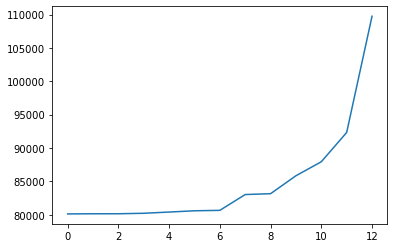

In [250]:
plt.plot(model_types['rmse'])

## TO DO make this nice

# Final Model

Now that we've chosen a favorite regression for this problem (Ridge), we want to be able to actually use the model to predict new data. Our steps are as follows:

* Build a model using our ENTIRE dataset for deployment
* Write our own standardization functions that we can apply to incoming new data
* Prepare a more intuitive GUI for predicting on new data

In [253]:
# our continuous variables before we applied the StandardScaler. 
# This is where we need to write and store our own scaling function, which we will use to scale any new incoming
# data that we want to predict from!

df_continuous_log

sqft_living  sqft_lot    floors  bedrooms  bathrooms  condition  \
0         7.073270  8.639411  0.000000  1.098612   0.000000   1.098612   
1         7.851661  8.887653  0.693147  1.098612   0.810930   1.098612   
2         6.646391  9.210340  0.000000  0.693147   0.000000   1.098612   
3         7.580700  8.517193  0.000000  1.386294   1.098612   1.609438   
4         7.426549  8.997147  0.000000  1.098612   0.693147   1.098612   
...            ...       ...       ...       ...        ...        ...   
18476     7.333023  7.030857  1.098612  1.098612   0.916291   1.098612   
18477     7.745003  8.667852  0.693147  1.386294   0.916291   1.098612   
18478     6.927558  7.207860  0.693147  0.693147  -0.287682   1.098612   
18479     7.377759  7.778211  0.693147  1.098612   0.916291   1.098612   
18480     6.927558  6.981006  0.693147  0.693147  -0.287682   1.098612   

          grade  
0      1.945910  
1      1.945910  
2      1.791759  
3      1.945910  
4      2.079442  
...         ...  
18476  2.079442  
18477  2.079442  
18478  1.945910  
18479  2.079442  
18480  1.945910  

[18481 rows x 7 columns]

## Write standardization function to apply to new data

While forming our model, we used the sklearn StandardScaler. But how do we scale brand new features that we are trying to predict from? In order to do so, we need to write a standardization function for each of our features, that we can then save and apply to our new prediction data.

In [254]:
standardization_coeffs = {}

for item in df_continuous_log:
    standardization_coeffs[item+'_mean'] = df_continuous_log[item].mean()
    standardization_coeffs[item+'_std'] = df_continuous_log[item].std()

print(standardization_coeffs)

{'sqft_living_mean': 7.487264646488237, 'sqft_living_std': 0.3868656778159048, 'sqft_lot_mean': 8.751422942498527, 'sqft_lot_std': 0.6052323520926731, 'floors_mean': 0.32554631293628217, 'floors_std': 0.3528855274141603, 'bedrooms_mean': 1.161988952164995, 'bedrooms_std': 0.28071365873779, 'bathrooms_mean': 0.6416932420690153, 'bathrooms_std': 0.3824226792012103, 'condition_mean': 1.2099855036820262, 'condition_std': 0.18008256313016827, 'grade_mean': 2.003972468584745, 'grade_std': 0.13169146539316434}


### Save Standardization coefficients to file

In [255]:
# save standardization coefficients to file so I can use these later
with open('standardization_coeffs.csv','w', newline="") as f:
    w = csv.writer(f)
    w.writerows(standardization_coeffs.items())

Now any time we bring in new data to predict with, we will use these values to standardize the new data.

new_data - mu / sigma (log transform the new data FIRST)

## Train model on entire data set

In [256]:
def standardize(feature):
    return (feature - feature.mean()) / feature.std()

final_continuous_standardized = df_continuous_log.apply(standardize)

In [257]:
preprocessed_scaled = pd.concat([df_target_log, final_continuous_standardized, df_categoricals_processed], axis=1)

In [281]:
# prepare regression data set

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [265]:
final_model = Ridge(alpha = [0.1])
final_model.fit(X, y)

Ridge(alpha=[0.1])

### Save model to file

In [268]:
from joblib import dump
dump(final_model, 'final_model.joblib') 

['final_model.joblib']

# Making New Predictions

    sqft_living - number
    sqft_lot - number
    floors - number
    bedrooms - number
    bathrooms - number
    condition - pick from range
    grade - pick from range
    comparative_sf - pick from range
    comparative_lot - pick from range
    zipcode - number
    month - number
    age_group - enter year built
    lat_round - enter address for lookup
    waterfront - yes/no
    renovated - yes/no
    basement - yes/no

## Set up empty/default predictive data frame

In [282]:
# make our empty prediction dataframe using the columns in our X predictor data frame, and populate them with 0 as the default

test_frame = pd.DataFrame(0, index=range(1), columns=X.columns)
test_frame

sqft_living  sqft_lot  floors  bedrooms  bathrooms  condition  grade  \
0            0         0       0         0          0          0      0   

   zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  zipcode_98006  \
0              0              0              0              0              0   

   zipcode_98007  zipcode_98008  zipcode_98010  zipcode_98011  zipcode_98014  \
0              0              0              0              0              0   

   zipcode_98019  zipcode_98022  zipcode_98023  zipcode_98024  zipcode_98027  \
0              0              0              0              0              0   

   zipcode_98028  zipcode_98029  zipcode_98030  zipcode_98031  zipcode_98032  \
0              0              0              0              0              0   

   zipcode_98033  zipcode_98034  zipcode_98038  zipcode_98039  zipcode_98040  \
0              0              0              0              0              0   

   zipcode_98042  zipcode_98045  zipcode_98052  zipcode_98053  zipcode_98055  \
0              0              0              0              0              0   

   zipcode_98056  zipcode_98058  zipcode_98059  zipcode_98065  zipcode_98070  \
0              0              0              0              0              0   

   zipcode_98072  zipcode_98074  zipcode_98075  zipcode_98077  zipcode_98092  \
0              0              0              0              0              0   

   zipcode_98102  zipcode_98103  zipcode_98105  zipcode_98106  zipcode_98107  \
0              0              0              0              0              0   

   zipcode_98108  zipcode_98109  zipcode_98112  zipcode_98115  zipcode_98116  \
0              0              0              0              0              0   

   zipcode_98117  zipcode_98118  zipcode_98119  zipcode_98122  zipcode_98125  \
0              0              0              0              0              0   

   zipcode_98126  zipcode_98133  zipcode_98136  zipcode_98144  zipcode_98146  \
0              0              0              0              0              0   

   zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
0              0              0              0              0              0   

   zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  waterfront_1.0  \
0              0              0              0              0               0   

   renovated_1.0  basement_1.0  comparative_sf_3  comparative_lot_3  month_2  \
0              0             0                 0                  0        0   

   month_3  month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
0        0        0        0        0        0        0        0         0   

   month_11  month_12  year_block_(1914.0, 1925.0]  \
0         0         0                            0   

   year_block_(1925.0, 1939.0]  year_block_(1939.0, 1945.0]  \
0                            0                            0   

   year_block_(1945.0, 1950.0]  year_block_(1950.0, 1954.0]  \
0                            0                            0   

   year_block_(1954.0, 1959.0]  year_block_(1959.0, 1963.0]  \
0                            0                            0   

   year_block_(1963.0, 1967.0]  year_block_(1967.0, 1972.0]  \
0                            0                            0   

   year_block_(1972.0, 1977.0]  year_block_(1977.0, 1981.0]  \
0                            0                            0   

   year_block_(1981.0, 1987.0]  year_block_(1987.0, 1991.0]  \
0                            0                            0   

   year_block_(1991.0, 1997.0]  year_block_(1997.0, 2002.0]  \
0                            0                            0   

   year_block_(2002.0, 2005.0]  year_block_(2005.0, 2007.0]  \
0                            0                            0   

   year_block_(2007.0, 2011.0]  year_block_(2011.0, 2015.0]  \
0                            0                            0   

   lat_block_(47.287, 47.3

## Enter Predictors

### Future Work - GUI

This section should be a GUI, where a realtor can enter these various details into a user-friendly interface and have the details converted to proper format for our predictor behind the scenes.

We're not going to create this GUI here, so some of our data will be pre-processed when entered into our predictive matrix.

In [283]:
sqft_living = 1960
sqft_lot = 5000
floors = 2
bedrooms = 2.5
bathrooms = 4
zipcode = 98136
month = 12

In [284]:
# The description here is: Overall property condition
# The choices here are: Poor, Okay, Average, Good, Excellent
# provide examples to indicate that this variable indicates property repair/maintenance level, not quality of materials
# GUI: checkbox, check only one
condition = 3

# The description here is: Quality of property materials
# The choices here are: Low Quality, Below Average Quality, Average/Builder Grade, Above Average Quality, Very High Quality
# Give examples within each category so they can make a best guess. Ex. Low Quality - Linoleum >20 yrs old, Laminate counters
# ex. continued - Very High Quality - crown moulding, solid slab granite. 
# provide examples to allow proper selection of grade
# GUI: checkbox, check only one
grade = 5

# subjective variable - how does this home's square footage relate in size to its neighbors?
# smaller, average or larger
# GUI: checkbox, check only one
comparative_sf = 2

# subjective variable - how does this property's lot size relate in size to its neighbors?
# smaller, average or larger
# GUI: checkbox, check only one
comparative_lot = 2

In [285]:
# provide year built
year_built = 1965

# provide address here for lookup, use lookup service to get latitude. We are not doing that here
# for time expediency reasons. we're just directly entering a latitude
# GUI: enter an address
lat_round = round(47.5208, 3)

In [286]:
# these are binary flags, put 1/0
#GUI: Checkbox, check to include
waterfront = 0
renovated = 1
basement = 0

In [303]:
# Storing all of our variables to process them to populate our data frame

continuous = {'sqft_living':sqft_living, 'sqft_lot':sqft_lot, 'floors':floors, 'bedrooms':bedrooms, 'bathrooms':bathrooms, 'condition':condition, 'grade':grade}
dichotomous = {'waterfront':waterfront, 'renovated':renovated, 'basement':basement}
high_card_cat = {'zipcode': zipcode, 'month':month, 'comparative_sf':comparative_sf, 'comparative_lot':comparative_lot}

## Populate predictive data frame

In [288]:
# Function to standardize new data according to the mean and std deviation that we saved for each column

def standardize_continuous(key, value):
    """Standardize a value according to saved mean and standard deviation saved values"""
    transformed = (np.log(value) - standardization_coeffs[key+'_mean']) / standardization_coeffs[key+'_std']
    return transformed

In [304]:
# create an empty dictionary to store our parameters
test_parameters = {}

# standardize and store our continuous variables
for item in continuous:
    test_parameters[item] = standardize_continuous(item, continuous[item])
    
# This code first checks if the column we want is in our data frame. If the column is there, it changes it to a 1.
for item in high_card_cat:
    if item+'_'+str(high_card_cat[item]) in test_frame.columns:
        test_parameters[item+'_'+str(high_card_cat[item])] = 1
        
# This code first checks if the column we want is in our data frame. If the column is there, it changes it to a 1.
for item in dichotomous:
    if dichotomous[item]:
        test_parameters[item+'_1.0']=1

# for our categoricals, not all are used in our model. For each categorical that we would create with our entered data,
# we check first and see if it's in our model at all. If so we flag it as a 1, otherwise it is ignored.

# function to find lower and upper bin bounds for our age blocks
def age_block_finder(year, bins):
    for i in range(len(bins)):
        if year > bins[i] and year < bins[i+1]:
            lower_year, upper_year = bins[i], bins[i+1]
        else: continue
    return lower_year, upper_year

# function to find lower and upper bin bounds for our latitude blocks
def lat_block_finder(lat, bins):
    for i in range(len(bins)):
        if lat_round > bins[i] and lat_round < bins[i+1]:
            lower_lat, upper_lat = round(bins[i], 3), round(bins[i+1], 3)
        else: continue
    return lower_lat, upper_lat


lower_year, upper_year = age_block_finder(year_built, year_bins) # lower and upper bounds for our age block
lower_lat, upper_lat = lat_block_finder(lat_round, lat_bins) # lower and upper bounds for our latitude block

# Find the correct bin for our year built
if 'year_block_('+str(lower_year)+', '+str(upper_year)+']' in test_frame.columns:
    test_parameters['year_block_('+str(lower_year)+', '+str(upper_year)+']'] = 1

# find the correct bin for our latitude
if 'lat_block_('+str(lower_lat)+', '+str(upper_lat)+']' in test_frame.columns:
    test_parameters['lat_block_('+str(lower_lat)+', '+str(upper_lat)+']'] = 1
    
test_parameters

In [311]:
# enter all of our predictors into our predictor frame
for item in test_parameters:
    value = test_parameters[item]
    test_frame[item] = value

## Run predictive model

In [312]:
# Apply our final model to our predictors

predicted_price = int(np.exp(final_model.predict(test_frame)))

In [313]:
# What is our prediction?

predicted_price

384005

# Explanation of Attempts - Feature Engineering/Selection

A lot of efforts were made to retain granularity while decreasing model complexity, but generally, keeping categoricals one-hot encoded as granularly as possible resulted in the best performance.

These are things I tried that did not improve the model:

* Month ranked on mean sales price, then expressed with polynomial relationship with price (one-hot encoded all 12 was better)
* Month binned into 4 quarters (one-hot encoded all 12 was better)
* Zip code as ordinal, ranked based on median home value per zip code (one-hot encoded all 70 was better)
* Zip code in bins (ex 7, 10 bins)
* Zip code, ranked as ordinal, then expressed with polynomial relationship with price (one-hot encoded all 70 was better)
* sqft_living expressed as polynomial relationship with price (ineffective)
* feature engineered "location" attempting to correlate with zip code based on housing quality using condition and grade (did not correlate). Needed more neighborhood quality metrics.
* ranking property based on its relationship to the sqft_15 categories by ranking it either smaller, medium or higher than neighbors, hypothetically penalizes being the biggest house in the neighborhood. Made this but feature selectors generally eliminated.
* Age of house, rather than bins of year built, as ordinal with relationship to price (high-cardinality one-hot encoded bins was better)
* Latitude relationship with Price as polynomial relationship. Although relationship was clear on scatter, addition of feature was not meaningful.

# TO DO

Other:

* Add statistical evaluations to selected model
* determine ranges and confidence level for predictions


# Conclusions

# Recommendations

# Future Work

King County GIS offers maps for tons of metrics that can help us more granularly determine neighborhood quality and price, including average household income which should be a strong predictor.

However we want a tool that a realtor can use to price, or a homebuyer can use to budget, so we need predictors that can be effectively rated by a realtor or understood by a buyer.

School district is one of these and is understood anecdotally to impact house prices. King County has GIS maps available for both school district and actual school locations.

We can get actual school district assignments by first utilizing King County's plot lookup tool with our lat/longs, and entering this address into GreatSchools.org with web scraper, getting back school name and rating for elementary, middle, high. We can test if overall school district and individual school levels have a unique effect on property price, and determine which metric there is most appropriate to use. This is information that a realtor has or a buyer can provide as desirable, on at least the district level.

We can also study other metrics used by the value predictor on Redfin to make our own predictions. Walkability is a metric to study, and this can be determined using those same GIS maps. King County has them available for all public services and public parks.

In [ ]:
break

# Deprecated/Unused

This section represents code written for the project that was not used, but that I wish to retain for reference purposes

## Month/Price as polynomial feature

In [ ]:
# we're using the mean house value for a month to determine the month's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
monthsorted = pd.DataFrame(df_bins.groupby('month')['price'].mean().sort_values(ascending=True))
monthsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthsorted['rank'] = np.divmod(np.arange(len(monthsorted)),entries)[0]+1

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['monthsorted'] = df_bins['month'].apply(lambda x: make_group(x, monthsorted, 'rank'))

In [ ]:
df_bins

In [ ]:
y = df_target_log
x = df_bins['monthsorted']

In [ ]:
y = np.array(y)
x = np.array(x)
x = x.reshape(-1, 1)

In [ ]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)

pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.plot(x, pred, c='red', label='Linear regression line')
plt.plot(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(x, pred3, c='#a3cfa3', label='Polynomial regression line 3');

I see no reason to express this with a polynomial relationship. We will proceed with our plan to bin the months into four quarters.

## Month binned into 4 quarters

In [ ]:
# group our dataframe by month with average price
monthranks = pd.DataFrame(df_categoricals.groupby('month')['price'].mean())

# set the entries per segment into which to bin our variable
entries = 3

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthranks['quarter'] = np.divmod(np.arange(len(monthranks)),entries)[0]+1

# make a new column on our dataframe. Look up each month entry's segment, and append to the column.
df_categoricals['quarter'] = df_categoricals['month'].apply(lambda x: make_group(x, monthranks, 'quarter'))

## Zip code binning

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),entries)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

## Zip Code/price as polynomial feature

I am very confident that Zip Code's relationship with price is best expressed via a polynomial. Our steps to doing this are as follows:
* rank our individual zip codes by median home price and sort from low to high
* Assign a rank number of 1-70 to the zips
* Apply zip code ranks to data by zip code
* Log transform the zip code ranks
* Test different polynomial degrees on the zip code/price relationship

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
#entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),1)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_group'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

In [ ]:
# we're dropping our price column; we don't need to do that from a programming standpoint,
# but we'll able to use this zipsorted table as our zipcode lookup for our rank numbers,
# so it's helpful if it's tidy.
# to that end we will re-sort the index by zip code so we have a clean lookup table for later
#zipsorted.drop('price', axis=1, inplace=True)
#zipsorted.sort_index(inplace=True, ascending=True)
#zipsorted

In [ ]:
zip_group = np.log(df_bins['zip_group'].astype(int))
zip_group = np.array(zip_group)
zip_group = zip_group.reshape(-1, 1)

target = np.array(df_target_log)

In [ ]:
target = target[zip_group[:,0].argsort()]
zip_group = zip_group[zip_group[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(zip_group, target)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(zip_group)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, target)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(zip_group)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, target)

poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(zip_group)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, target)

pred = linreg.predict(zip_group)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(zip_group, target)
plt.yscale('log')
plt.title("Train data")
plt.plot(zip_group, pred, c='red', label='Linear regression line')
plt.plot(zip_group, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(zip_group, pred3, c='green', label='Polynomial regression line 3')
plt.plot(zip_group, pred10, c='black', label='Polynomial regression line 10')
;


In [ ]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

We have a HUGE increase in R2 by using a polynomial relationship, and our 3rd degree relationship looks to fit our data very well without overfitting.

However in practice - we obtained a better score on our model by one-hot encoding our 70 zip codes, rather than using this polynomial relationship.

#### Zip

In [ ]:
df_zip = df_bins['zip_group']
df_zip
plt.hist(df_zip)

In [ ]:
df_zip = np.array(df_zip)
df_zip = df_zip.reshape(-1,1)

In [ ]:
poly3 = PolynomialFeatures(degree=3)
df_zip3 = poly3.fit_transform(df_zip)

In [ ]:
zip_poly = pd.DataFrame(df_zip3)
zip_poly

In [ ]:
zip_poly.drop(0, axis=1, inplace=True)

In [ ]:
zip_poly.rename(columns={0:'zip_intercept',1:"zip_1", 2:'zip_2', 3:'zip_3'}, inplace=True)

In [ ]:
scaler = StandardScaler()
zip_poly[['zip_1', 'zip_2', 'zip_3']] = scaler.fit_transform(zip_poly[['zip_1', 'zip_2', 'zip_3']])

In [ ]:
zip_poly

## sqft_living /price as polynomial feature

In [ ]:
df_polynomial = df[polynomial]
df_polynomial

Our Sqft-living relationship to price does not look linear. I wonder if it would be better expressed as a polynomial relationship.

In [ ]:

x = df_continuous['sqft_living']
x

y = df_target_log
y

In [ ]:
x = np.array(x)
x = x.reshape(-1, 1)
y = np.array(y)
y = y.reshape(-1, 1)

In [ ]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)


poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(x)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, y)


pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.scatter(x, pred, c='red', label='Linear regression line')
plt.scatter(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.scatter(x, pred3, c='green', label='Polynomial regression line 3')
plt.scatter(x, pred10, c='black', label='Polynomial regression line 10')
;

In [ ]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

We don't have enough of an improvement when moving to a 2nd degree polynomial to change our sqft_living to a polynomial relationship.

#### Sqft_living

In [ ]:
df_sqft = df['sqft_living']
df_sqft
plt.hist(df_sqft)

In [ ]:
#df_sqft = np.log(df_sqft)
#plt.hist(df_sqft)

In [ ]:
df_sqft = np.array(df_sqft)
df_sqft = df_sqft.reshape(-1,1)

In [ ]:
poly2 = PolynomialFeatures(degree=2)
sqft2 = poly2.fit_transform(df_sqft)

In [ ]:
sqft_poly = pd.DataFrame(sqft2)
sqft_poly

In [ ]:
sqft_poly.drop(0, axis=1, inplace=True)

In [ ]:
sqft_poly.rename(columns={0:'sqft_intercept',1:"sqft_1", 2:'sqft_2'}, inplace=True)

In [ ]:
scaler = StandardScaler()
sqft_poly[['sqft_1', 'sqft_2']] = scaler.fit_transform(sqft_poly[['sqft_1', 'sqft_2']])

In [ ]:
sqft_poly

## Latitude/price as polynomial feature

Our Sqft-living relationship to price does not look linear. I wonder if it would be better expressed as a polynomial relationship.

In [ ]:
#x = df_continuous_log['sqft_living']
x = df['lat']
y = df_target_log

In [ ]:
x = np.array(x)
x = x.reshape(-1, 1)
y = np.array(y)
y = y.reshape(-1, 1)

In [ ]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)


poly5 = PolynomialFeatures(degree=5)
x_poly5 = poly10.fit_transform(x)
poly_reg5 = LinearRegression()
poly_reg5.fit(x_poly10, y)


pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred5 = poly_reg5.predict(x_poly10)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.scatter(x, pred, c='red', label='Linear regression line')
plt.scatter(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.scatter(x, pred3, c='green', label='Polynomial regression line 3')
plt.scatter(x, pred5, c='black', label='Polynomial regression line 5')
;

In [ ]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg5.score(x_poly5, y))

We can use our latitude as a predictor as a 4th degree polynomial.

In [ ]:
df_lat = df['lat']
df_lat


In [ ]:
df_lat = np.array(df_lat)
df_lat = df_lat.reshape(-1,1)

In [ ]:
poly = PolynomialFeatures(degree=4)
latitude = poly.fit_transform(df_lat)

In [ ]:
lat_poly = pd.DataFrame(latitude)
lat_poly

In [ ]:
lat_poly.drop(0, axis=1, inplace=True)

In [ ]:
lat_poly.rename(columns={1:"lat_1", 2:'lat_2', 3:'lat_3', 4:'lat_4'}, inplace=True)

In [ ]:
scaler = StandardScaler()
lat_poly[['lat_1', 'lat_2', 'lat_3', 'lat_4']] = scaler.fit_transform(lat_poly[['lat_1', 'lat_2', 'lat_3', 'lat_4']])

In [ ]:
lat_poly

## Polynomial learning stuff

In [ ]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = X_train_val['sqft_living']
X_train_poly = X_train_poly.values.reshape(-1, 1)
y_train_poly = y_train_val

X_test_poly = X_test['sqft_living']
X_test_poly = X_test_poly.values.reshape(-1, 1)
y_test_poly = y_test

In [ ]:


# fit multiple polynomial features
degrees = [1, 2, 3, 6]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
df_bins

In [ ]:
X_now = df_bins['zip_group'].astype(int)
X_now = np.log(X_now)
X_now

In [ ]:
# creating our train/validation sets and our test sets

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_now, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = np.array(X_train_poly)
X_train_poly = X_train_poly.reshape(-1, 1)
X_test_poly = np.array(X_test_poly)
X_test_poly = X_test_poly.reshape(-1, 1)

In [ ]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train_poly)

In [ ]:
x_poly

In [ ]:
stuff = pd.DataFrame(x_poly)
stuff